<a href="https://colab.research.google.com/github/CostaNathan/doctorate/blob/Ocean_outfalls/emissarios_dados.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime
from scipy import stats
import statsmodels.api as sm
import scipy.stats
from scipy.stats import spearmanr
from scipy.stats import shapiro


# Statistical analysis

- Data gathering (import from github's folder) - Own file
- Rearange the data structure as needed 
  - Setting datetime index
  - Data manipulation
  - Clean data structure
    - Handling missing data
    - Handling invalid values
    - Handling duplicate data (if needed)
    - Handling text data
    - Handling outliers 
  
- Plot data for early visualization
  - Plot
  - Scatter
  - Boxplot
- Summary of statistics of the dataframe (.describe())
- Statistical overview of the given data
  - Data's distribution 
    - Histogram, null hipotesys and shapiro wilk
  - Pearson's correlation and $r^{2}$-value
  - Spearman's correlation
  - Regression methods (Parametric):
    - Logistic Regression
    - Linear Discriminant Analysis
    - Perceptron
    - Naive Bayes
    - Simple Neural Networks
    - Linear Regression
    - Polynomial Regression
    - Gausian Regression (A Gaussian processes regression (GPR) model can predict using prior knowledge (kernels) and provide uncertainty measures for those predictions. It is a supervised learning method developed by computer science and statistics communities)
  - Regression methods (non -parametric):
    - Random forest
    - Neural Network Regression (One can use ‘Keras’ that is the appropriate python library for building neural networks in ML)
    - Decision Tree Regression 
    - KNN Model 
    - Support Vector Machines (SVM)
  - Residual-Error analysis (in regression)

### Data Manipulation 

- Coliformes totais 
- E. Coli

In [2]:
header = pd.MultiIndex.from_product([['Santos', 'PG1', 'PG2', 'PG3', 'Guarujá'], # Multiindex 
                                     ['Coliformes_Totais', 'E_Coli']], 
                                    names = ['Emissários', 'Parâmetro'])

emissario_dummy = pd.read_excel('https://github.com/CostaNathan/doctorate/blob/508926339a14af10762064ee43b71f3d9d34976c/data/resumo_emissarios_nathan.xlsx?raw=true') # dummy variable

index = []
datestring = emissario_dummy['Resumo WAQ emissários baixada santista'].astype(str)
for i in range (2,len(datestring)):
  index.append(datetime.strptime(datestring[i], "%Y-%m-%d %H:%M:%S")) # Datetime set up

# datestring
# index

ct_ecoli = pd.DataFrame(emissario_dummy.iloc[2:,1:11].values, index = index, columns= header, dtype=float) # Parameter dataframe
ct_ecoli

Emissários            Santos                           PG1              \
Parâmetro  Coliformes_Totais      E_Coli Coliformes_Totais      E_Coli   
2011-01-01       129970000.0  20050000.0       133480000.0  33030000.0   
2011-02-01       155310000.0  16130000.0        65034020.0  11910375.0   
2011-03-01       155310000.0  12110000.0        77710995.0  10072285.0   
2011-04-01        54750000.0   9770000.0        65110000.0   9715000.0   
2011-05-01        92080000.0  11530000.0        68495000.0  14645500.0   
...                      ...         ...               ...         ...   
2020-08-01        84757500.0  13487500.0               NaN         NaN   
2020-09-01        64005000.0  12020000.0               NaN         NaN   
2020-10-01       151627500.0  17037500.0               NaN         NaN   
2020-11-01        49550000.0   7740000.0               NaN         NaN   
2020-12-01        62580000.0  16042500.0               NaN         NaN   

Emissários               PG2                           PG3              \
Parâmetro  Coliformes_Totais      E_Coli Coliformes_Totais      E_Coli   
2011-01-01       111815000.0  27880000.0         1298000.0    219985.0   
2011-02-01        38827000.0   9855250.0        25713000.0   4990500.0   
2011-03-01        56856500.0   5894500.0        39875000.0   7488500.0   
2011-04-01        77010000.0  11690000.0        17999000.0   2471000.0   
2011-05-01        35585000.0   9391475.0        23333000.0   4066500.0   
...                      ...         ...               ...         ...   
2020-08-01               NaN         NaN        56155000.0   8020000.0   
2020-09-01               NaN         NaN        50437500.0   8922500.0   
2020-10-01               NaN         NaN        50055000.0   8595000.0   
2020-11-01               NaN         NaN        39132500.0   7895000.0   
2020-12-01               NaN         NaN        41907500.0  10325000.0   

Emissários           Guarujá         
Parâmetro  Coliformes_Totais E_Coli  
2011-01-01               NaN    NaN  
2011-02-01               NaN    NaN  
2011-03-01               NaN    NaN  
2011-04-01               NaN    NaN  
2011-05-01               NaN    NaN  
...                      ...    ...  
2020-08-01               NaN    NaN  
2020-09-01               NaN    NaN  
2020-10-01               NaN    NaN  
2020-11-01               NaN    NaN  
2020-12-01               NaN    NaN  

[120 rows x 10 columns]

In [3]:
# ct_ecoli.xs('Guarujá',level = 'Emissários', axis = 1).describe()
ct_ecoli.describe()

Emissários            Santos                             PG1                \
Parâmetro  Coliformes_Totais        E_Coli Coliformes_Totais        E_Coli   
count           1.180000e+02  1.190000e+02      7.200000e+01  7.200000e+01   
mean            8.245070e+07  1.215368e+07      7.142393e+07  1.120157e+07   
std             2.623482e+07  7.610149e+06      2.643584e+07  5.578257e+06   
min             2.250500e+07  2.950000e+06      1.251000e+07  2.500000e+05   
25%             6.389062e+07  7.915000e+06      5.484125e+07  7.532500e+06   
50%             7.704500e+07  1.108500e+07      7.077625e+07  1.018000e+07   
75%             9.629375e+07  1.383250e+07      8.404861e+07  1.440575e+07   
max             1.553100e+08  7.397500e+07      1.516300e+08  3.303000e+07   

Emissários               PG2                             PG3                \
Parâmetro  Coliformes_Totais        E_Coli Coliformes_Totais        E_Coli   
count           7.200000e+01  7.200000e+01      1.160000e+02  1.150000e+02   
mean            4.947129e+07  8.376930e+06      4.202664e+07  7.367796e+06   
std             2.725670e+07  4.783041e+06      2.571408e+07  5.122356e+06   
min             2.145000e+06  2.250000e+05      1.298000e+06  2.199850e+05   
25%             3.096625e+07  5.772500e+06      2.460125e+07  4.172500e+06   
50%             4.361750e+07  7.800000e+06      3.670500e+07  7.344000e+06   
75%             6.010250e+07  9.877875e+06      5.280875e+07  8.951250e+06   
max             1.516250e+08  2.788000e+07      1.477225e+08  3.591250e+07   

Emissários           Guarujá                
Parâmetro  Coliformes_Totais        E_Coli  
count           2.400000e+01  2.400000e+01  
mean            4.117542e+07  5.711042e+06  
std             1.607597e+07  4.250218e+06  
min             1.570500e+07  9.250000e+05  
25%             3.142500e+07  3.132500e+06  
50%             3.697250e+07  4.700000e+06  
75%             4.758875e+07  6.908750e+06  
max             9.234500e+07  2.202000e+07

In [4]:
# Interpolated data (Linear) - Check best fit for interpolation

ct_ecoli_interpolate = ct_ecoli.copy()
ct_ecoli_interpolate_dummy = ct_ecoli_interpolate['Santos']
ct_ecoli_interpolate['Santos'] = ct_ecoli_interpolate_dummy.interpolate() 
ct_ecoli_interpolate_dummy = ct_ecoli_interpolate['PG1']
ct_ecoli_interpolate['PG1'] = ct_ecoli_interpolate_dummy.interpolate()
ct_ecoli_interpolate_dummy = ct_ecoli_interpolate['PG2']
ct_ecoli_interpolate['PG2'] = ct_ecoli_interpolate_dummy.interpolate()
ct_ecoli_interpolate_dummy = ct_ecoli_interpolate['PG3']
ct_ecoli_interpolate['PG3'] = ct_ecoli_interpolate_dummy.interpolate()
ct_ecoli_interpolate_dummy = ct_ecoli_interpolate['Guarujá']
ct_ecoli_interpolate_dummy.iloc[72,0] = ct_ecoli_interpolate_dummy.iloc[80,0]
ct_ecoli_interpolate_dummy.iloc[72,1] = ct_ecoli_interpolate_dummy.iloc[80,1]
ct_ecoli_interpolate['Guarujá'] = ct_ecoli_interpolate_dummy.interpolate()
ct_ecoli_interpolate.iloc[108:]['Guarujá'] = np.nan

ct_ecoli_interpolate

# ct_ecoli_interpolate['Guarujá'] = ct_ecoli.xs('Guarujá',level = 'Emissários', axis = 1)
# ct_ecoli_interpolate.xs('Coliformes_Totais',level = 'Parâmetro', axis = 1).iloc[36:48]['Santos']



/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:723: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value, self.name)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stab

Emissários            Santos                           PG1              \
Parâmetro  Coliformes_Totais      E_Coli Coliformes_Totais      E_Coli   
2011-01-01       129970000.0  20050000.0       133480000.0  33030000.0   
2011-02-01       155310000.0  16130000.0        65034020.0  11910375.0   
2011-03-01       155310000.0  12110000.0        77710995.0  10072285.0   
2011-04-01        54750000.0   9770000.0        65110000.0   9715000.0   
2011-05-01        92080000.0  11530000.0        68495000.0  14645500.0   
...                      ...         ...               ...         ...   
2020-08-01        84757500.0  13487500.0        95060000.0  13350000.0   
2020-09-01        64005000.0  12020000.0        95060000.0  13350000.0   
2020-10-01       151627500.0  17037500.0        95060000.0  13350000.0   
2020-11-01        49550000.0   7740000.0        95060000.0  13350000.0   
2020-12-01        62580000.0  16042500.0        95060000.0  13350000.0   

Emissários               PG2                           PG3              \
Parâmetro  Coliformes_Totais      E_Coli Coliformes_Totais      E_Coli   
2011-01-01       111815000.0  27880000.0         1298000.0    219985.0   
2011-02-01        38827000.0   9855250.0        25713000.0   4990500.0   
2011-03-01        56856500.0   5894500.0        39875000.0   7488500.0   
2011-04-01        77010000.0  11690000.0        17999000.0   2471000.0   
2011-05-01        35585000.0   9391475.0        23333000.0   4066500.0   
...                      ...         ...               ...         ...   
2020-08-01        80747500.0  11360000.0        56155000.0   8020000.0   
2020-09-01        80747500.0  11360000.0        50437500.0   8922500.0   
2020-10-01        80747500.0  11360000.0        50055000.0   8595000.0   
2020-11-01        80747500.0  11360000.0        39132500.0   7895000.0   
2020-12-01        80747500.0  11360000.0        41907500.0  10325000.0   

Emissários           Guarujá         
Parâmetro  Coliformes_Totais E_Coli  
2011-01-01               NaN    NaN  
2011-02-01               NaN    NaN  
2011-03-01               NaN    NaN  
2011-04-01               NaN    NaN  
2011-05-01               NaN    NaN  
...                      ...    ...  
2020-08-01               NaN    NaN  
2020-09-01               NaN    NaN  
2020-10-01               NaN    NaN  
2020-11-01               NaN    NaN  
2020-12-01               NaN    NaN  

[120 rows x 10 columns]

In [5]:
ct_ecoli_interpolate.describe()

Emissários            Santos                             PG1                \
Parâmetro  Coliformes_Totais        E_Coli Coliformes_Totais        E_Coli   
count           1.200000e+02  1.200000e+02      1.200000e+02  1.200000e+02   
mean            8.262508e+07  1.214825e+07      7.724038e+07  1.220826e+07   
std             2.633057e+07  7.578339e+06      2.677080e+07  5.006686e+06   
min             2.250500e+07  2.950000e+06      1.251000e+07  2.500000e+05   
25%             6.373062e+07  7.937500e+06      6.017125e+07  8.841250e+06   
50%             7.704500e+07  1.112750e+07      7.384750e+07  1.233108e+07   
75%             9.659000e+07  1.372125e+07      9.506000e+07  1.502625e+07   
max             1.553100e+08  7.397500e+07      1.516300e+08  3.303000e+07   

Emissários               PG2                             PG3                \
Parâmetro  Coliformes_Totais        E_Coli Coliformes_Totais        E_Coli   
count           1.200000e+02  1.200000e+02      1.200000e+02  1.200000e+02   
mean            5.240817e+07  9.341033e+06      4.159286e+07  7.257304e+06   
std             2.410055e+07  4.075815e+06      2.542823e+07  5.056312e+06   
min             2.145000e+06  2.250000e+05      1.298000e+06  2.199850e+05   
25%             3.497250e+07  6.873750e+06      2.460125e+07  4.114125e+06   
50%             4.935958e+07  9.626000e+06      3.639375e+07  7.086250e+06   
75%             6.368125e+07  1.147875e+07      5.091438e+07  8.926875e+06   
max             1.516250e+08  2.788000e+07      1.477225e+08  3.591250e+07   

Emissários           Guarujá                
Parâmetro  Coliformes_Totais        E_Coli  
count           3.600000e+01  3.600000e+01  
mean            3.913139e+07  5.076806e+06  
std             1.335985e+07  3.758131e+06  
min             1.570500e+07  9.250000e+05  
25%             3.474500e+07  3.090000e+06  
50%             3.564000e+07  5.250000e+06  
75%             4.523000e+07  5.573750e+06  
max             9.234500e+07  2.202000e+07

### Data's distribution

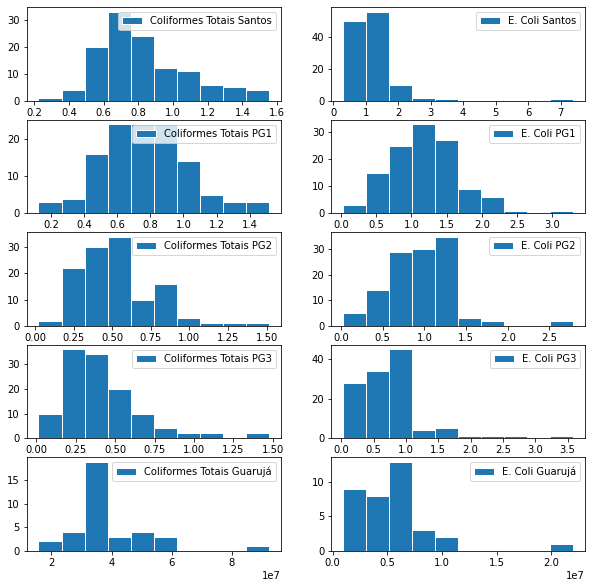

In [6]:
# Histogram

plt.figure(figsize=(10,10))


ax1 = plt.subplot2grid((5,2), (0,0))
ax2 = plt.subplot2grid((5,2), (0,1))
ax3 = plt.subplot2grid((5,2), (1,0))
ax4 = plt.subplot2grid((5,2), (1,1))
ax5 = plt.subplot2grid((5,2), (2,0))
ax6 = plt.subplot2grid((5,2), (2,1))
ax7 = plt.subplot2grid((5,2), (3,0))
ax8 = plt.subplot2grid((5,2), (3,1))
ax9 = plt.subplot2grid((5,2), (4,0))
ax10 = plt.subplot2grid((5,2), (4,1))


ax1.hist(ct_ecoli_interpolate.loc[:, ('Santos', 'Coliformes_Totais')],label = 'Coliformes Totais Santos', edgecolor = 'white')
ax1.legend()

ax2.hist(ct_ecoli_interpolate.loc[:, ('Santos', 'E_Coli')], label = 'E. Coli Santos', edgecolor = 'white')
ax2.legend()

ax3.hist(ct_ecoli_interpolate.loc[:, ('PG1', 'Coliformes_Totais')], label = 'Coliformes Totais PG1', edgecolor = 'white')
ax3.legend()

ax4.hist(ct_ecoli_interpolate.loc[:, ('PG1', 'E_Coli')], label = 'E. Coli PG1', edgecolor = 'white')
ax4.legend()

ax5.hist(ct_ecoli_interpolate.loc[:, ('PG2', 'Coliformes_Totais')],label = 'Coliformes Totais PG2', edgecolor = 'white')
ax5.legend()

ax6.hist(ct_ecoli_interpolate.loc[:, ('PG2', 'E_Coli')], label = 'E. Coli PG2', edgecolor = 'white')
ax6.legend()

ax7.hist(ct_ecoli_interpolate.loc[:, ('PG3', 'Coliformes_Totais')], label = 'Coliformes Totais PG3', edgecolor = 'white')
ax7.legend()

ax8.hist(ct_ecoli_interpolate.loc[:, ('PG3', 'E_Coli')], label = 'E. Coli PG3', edgecolor = 'white')
ax8.legend()

ax9.hist(ct_ecoli_interpolate.loc[:, ('Guarujá', 'Coliformes_Totais')], label = 'Coliformes Totais Guarujá', edgecolor = 'white')
ax9.legend()

ax10.hist(ct_ecoli_interpolate.loc[:, ('Guarujá', 'E_Coli')], label = 'E. Coli Guarujá', edgecolor = 'white')
ax10.legend()

In [7]:
# Shapiro wilk and null hypotesis (H0)

stat, p = shapiro(ct_ecoli_interpolate.loc[:, ('Santos', 'Coliformes_Totais')])
print('Statistics Santos - Coliformes Totais =%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
	print('Santos - Coliformes Totais looks Gaussian (fail to reject H0) \n')
else:
	print('Sample does not look Gaussian (reject H0) \n')
 
stat, p = shapiro(ct_ecoli_interpolate.loc[:, ('Santos', 'E_Coli')])
print('Statistics Santos - E. Coli =%.3f, p=%.3f' % (stat, p))

if p > alpha:
	print('Santos - E. Coli looks Gaussian (fail to reject H0) \n')
else:
	print('Sample does not look Gaussian (reject H0) \n')
 
stat, p = shapiro(ct_ecoli_interpolate.loc[:, ('PG1', 'Coliformes_Totais')])
print('Statistics PG1 - Coliformes Totais =%.3f, p=%.3f' % (stat, p))

if p > alpha:
	print('PG1 - Coliformes Totais looks Gaussian (fail to reject H0) \n')
else:
	print('Sample does not look Gaussian (reject H0) \n')

stat, p = shapiro(ct_ecoli_interpolate.loc[:, ('PG1', 'E_Coli')])
print('Statistics PG1 - E. Coli =%.3f, p=%.3f' % (stat, p))

if p > alpha:
	print('PG1 - E. Coli looks Gaussian (fail to reject H0) \n')
else:
	print('Sample does not look Gaussian (reject H0) \n')
 
stat, p = shapiro(ct_ecoli_interpolate.loc[:, ('PG2', 'Coliformes_Totais')])
print('Statistics PG2 - E. Coli =%.3f, p=%.3f' % (stat, p))

if p > alpha:
	print('PG2 - E. Coli looks Gaussian (fail to reject H0) \n')
else:
	print('Sample does not look Gaussian (reject H0) \n')
 
stat, p = shapiro(ct_ecoli_interpolate.loc[:, ('PG2', 'E_Coli')])
print('Statistics PG2 - E. Coli =%.3f, p=%.3f' % (stat, p))

if p > alpha:
	print('PG2 - E. Coli looks Gaussian (fail to reject H0) \n')
else:
	print('Sample does not look Gaussian (reject H0) \n')
 
stat, p = shapiro(ct_ecoli_interpolate.loc[:, ('PG3', 'Coliformes_Totais')])
print('Statistics PG3 - E. Coli =%.3f, p=%.3f' % (stat, p))

if p > alpha:
	print('PG3 - Coliformes Totais looks Gaussian (fail to reject H0) \n')
else:
	print('Sample does not look Gaussian (reject H0) \n')
 
stat, p = shapiro(ct_ecoli_interpolate.loc[:, ('PG3', 'E_Coli')])
print('Statistics PG3 - E. Coli =%.3f, p=%.3f' % (stat, p))

if p > alpha:
	print('PG3 - E. Coli looks Gaussian (fail to reject H0) \n')
else:
	print('Sample does not look Gaussian (reject H0) \n')
  
stat, p = shapiro(ct_ecoli_interpolate.loc[:, ('Guarujá', 'Coliformes_Totais')])
print('Statistics Guarujá - E. Coli =%.3f, p=%.3f' % (stat, p))

if p > alpha:
	print('Guarujá - Coliformes Totais looks Gaussian (fail to reject H0) \n')
else:
	print('Sample does not look Gaussian (reject H0) \n')
 
stat, p = shapiro(ct_ecoli_interpolate.loc[:, ('Guarujá', 'E_Coli')])
print('Statistics Guarujá - E. Coli =%.3f, p=%.3f' % (stat, p))

if p > alpha:
	print('Guarujá - E. Coli looks Gaussian (fail to reject H0) \n')
else:
	print('Sample does not look Gaussian (reject H0) \n')

Statistics Santos - Coliformes Totais =0.944, p=0.000
Sample does not look Gaussian (reject H0) 

Statistics Santos - E. Coli =0.617, p=0.000
Sample does not look Gaussian (reject H0) 

Statistics PG1 - Coliformes Totais =0.986, p=0.238
PG1 - Coliformes Totais looks Gaussian (fail to reject H0) 

Statistics PG1 - E. Coli =0.975, p=0.026
Sample does not look Gaussian (reject H0) 

Statistics PG2 - E. Coli =0.937, p=0.000
Sample does not look Gaussian (reject H0) 

Statistics PG2 - E. Coli =0.918, p=0.000
Sample does not look Gaussian (reject H0) 

Statistics PG3 - E. Coli =0.889, p=0.000
Sample does not look Gaussian (reject H0) 

Statistics PG3 - E. Coli =0.805, p=0.000
Sample does not look Gaussian (reject H0) 

Statistics Guarujá - E. Coli =nan, p=1.000
Guarujá - Coliformes Totais looks Gaussian (fail to reject H0) 

Statistics Guarujá - E. Coli =nan, p=1.000
Guarujá - E. Coli looks Gaussian (fail to reject H0) 



### Data Normalization

- Machine learning algorithms like linear regression, logistic regression, neural network, etc. that use gradient descent as an optimization technique require data to be scaled.

- Distance algorithms like KNN, K-means, and SVM are most affected by the range of features. This is because behind the scenes they are using distances between data points to determine their similarity.

- Tree-based algorithms, on the other hand, are fairly insensitive to the scale of the features. Think about it, a decision tree is only splitting a node based on a single feature. The decision tree splits a node on a feature that increases the homogeneity of the node. This split on a feature is not influenced by other features.

- Normalization is a scaling technique in which values are shifted and rescaled so that they end up ranging between 0 and 1. It is also known as Min-Max scaling.

- Standardization is another scaling technique where the values are centered around the mean with a unit standard deviation. This means that the mean of the attribute becomes zero and the resultant distribution has a unit standard deviation.

Normalization vs. standardization is an eternal question among machine learning newcomers. Let me elaborate on the answer in this section.

- Normalization is good to use when you know that the distribution of your data does not follow a Gaussian distribution. This can be useful in algorithms that do not assume any distribution of the data like K-Nearest Neighbors and Neural Networks.
- Standardization, on the other hand, can be helpful in cases where the data follows a Gaussian distribution. However, this does not have to be necessarily true. Also, unlike normalization, standardization does not have a bounding range. So, even if you have outliers in your data, they will not be affected by standardization.


In [8]:
# from sklearn import preprocessing
# import numpy as np

# a = np.random.random((1, 4))
# a = a*20
# print("Data = ", a)

# # normalize the data attributes
# normalized = preprocessing.normalize(a)
# print("Normalized Data = ", normalized)

# # data normalization with sklearn
# from sklearn.preprocessing import MinMaxScaler

# # fit scaler on training data
# norm = MinMaxScaler().fit(X_train)

# # transform training data
# X_train_norm = norm.transform(X_train)

# # transform testing dataabs
# X_test_norm = norm.transform(X_test)

In [9]:
# # data standardization with  sklearn
# from sklearn.preprocessing import StandardScaler

# # copy of datasets
# X_train_stand = X_train.copy()
# X_test_stand = X_test.copy()

# # numerical features
# num_cols = ['Item_Weight','Item_Visibility','Item_MRP','Outlet_Establishment_Year']

# # apply standardization on numerical features
# for i in num_cols:
    
#     # fit on training data column
#     scale = StandardScaler().fit(X_train_stand[[i]])
    
#     # transform the training data column
#     X_train_stand[i] = scale.transform(X_train_stand[[i]])
    
#     # transform the testing data column
#     X_test_stand[i] = scale.transform(X_test_stand[[i]])

### Santos 


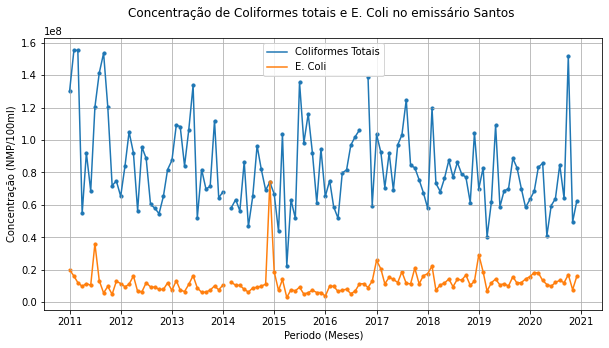

In [10]:
# Plot with no data interpolation

plt.figure(figsize = (10,5))
plt.plot(ct_ecoli.index, ct_ecoli.xs('Coliformes_Totais',level = 'Parâmetro', axis = 1)['Santos'], label = 'Coliformes Totais')
plt.plot(ct_ecoli.index, ct_ecoli.xs('E_Coli',level = 'Parâmetro', axis = 1)['Santos'], label = 'E. Coli')
plt.scatter(ct_ecoli.index, ct_ecoli.xs('Coliformes_Totais',level = 'Parâmetro', axis = 1)['Santos'], s = 10 )
plt.scatter(ct_ecoli.index, ct_ecoli.xs('E_Coli',level = 'Parâmetro', axis = 1)['Santos'],s = 10 )
plt.xlabel('Periodo (Meses)')
plt.ylabel('Concentração (NMP/100ml)')
plt.title('Concentração de Coliformes totais e E. Coli no emissário Santos \n')
plt.legend(loc='best')
plt.grid()
 

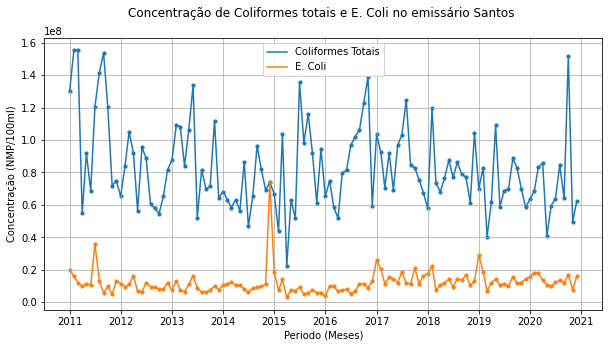

In [11]:
# Plot with data interpolation (linear)

plt.figure(figsize = (10,5))
plt.plot(ct_ecoli_interpolate.index, ct_ecoli_interpolate.xs('Coliformes_Totais',level = 'Parâmetro', axis = 1)['Santos'], label = 'Coliformes Totais')
plt.plot(ct_ecoli_interpolate.index, ct_ecoli_interpolate.xs('E_Coli',level = 'Parâmetro', axis = 1)['Santos'], label = 'E. Coli')
plt.scatter(ct_ecoli_interpolate.index, ct_ecoli_interpolate.xs('Coliformes_Totais',level = 'Parâmetro', axis = 1)['Santos'], s = 10 )
plt.scatter(ct_ecoli_interpolate.index, ct_ecoli_interpolate.xs('E_Coli',level = 'Parâmetro', axis = 1)['Santos'],s = 10 )
plt.xlabel('Periodo (Meses)')
plt.ylabel('Concentração (NMP/100ml)')
plt.title('Concentração de Coliformes totais e E. Coli no emissário Santos \n')
plt.legend(loc='best')
plt.grid()

Text(0.5, 1.0, 'Concentração de Coliformes Totais e E. Coli em Santos (NMP/100ml) \n')

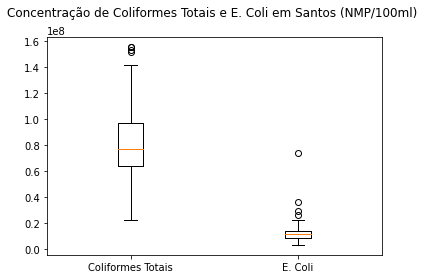

In [12]:
plt.boxplot([ct_ecoli_interpolate.xs('Coliformes_Totais',level = 'Parâmetro', axis = 1)['Santos'].to_numpy(),ct_ecoli_interpolate.xs('E_Coli',level = 'Parâmetro', axis = 1)['Santos'].to_numpy()])
plt.xticks([1, 2], ['Coliformes Totais', 'E. Coli'])
plt.title('Concentração de Coliformes Totais e E. Coli em Santos (NMP/100ml) \n')


In [13]:
# Outliers detection and handling

def outlier_santos():

  Q1 = np.percentile(ct_ecoli_interpolate.xs('Coliformes_Totais',level = 'Parâmetro', axis = 1)['Santos'].to_numpy(), q=25)
  Q3 = np.percentile(ct_ecoli_interpolate.xs('Coliformes_Totais',level = 'Parâmetro', axis = 1)['Santos'].to_numpy(), q=75)
  IQ = (Q3 - Q1)
  upper_fence = Q3 + 1.5*IQ
  lower_fence = Q1 - 1.5*IQ
  
  ct_outliers = ct_ecoli_interpolate.xs('Coliformes_Totais',level = 'Parâmetro', axis = 1)['Santos'][(ct_ecoli_interpolate.xs('Coliformes_Totais',level = 'Parâmetro', axis = 1)['Santos'] <= lower_fence) | (ct_ecoli_interpolate.xs('Coliformes_Totais',level = 'Parâmetro', axis = 1)['Santos'] >= upper_fence)]
  
  Q1 = np.percentile(ct_ecoli_interpolate.xs('E_Coli',level = 'Parâmetro', axis = 1)['Santos'].to_numpy(), q=25)
  Q3 = np.percentile(ct_ecoli_interpolate.xs('E_Coli',level = 'Parâmetro', axis = 1)['Santos'].to_numpy(), q=75)
  IQ = (Q3 - Q1)
  upper_fence = Q3 + 1.5*IQ
  lower_fence = Q1 - 1.5*IQ
  
  ec_outliers = ct_ecoli_interpolate.xs('E_Coli',level = 'Parâmetro', axis = 1)['Santos'][(ct_ecoli_interpolate.xs('E_Coli',level = 'Parâmetro', axis = 1)['Santos'] <= lower_fence) | (ct_ecoli_interpolate.xs('E_Coli',level = 'Parâmetro', axis = 1)['Santos'] >= upper_fence)]

  return print('Os valores a seguir são os outliers dos dados de Coliformes Totais para Santos:\n{}'.format(ct_outliers) + '\n\n' +
               'Os valores a seguir são os outliers dos dados de E. Coli para Santos: \n{}'.format(ec_outliers))

outlier_santos() 




Os valores a seguir são os outliers dos dados de Coliformes Totais para Santos:
2011-02-01    155310000.0
2011-03-01    155310000.0
2011-09-01    153570000.0
2020-10-01    151627500.0
Name: Santos, dtype: float64

Os valores a seguir são os outliers dos dados de E. Coli para Santos: 
2011-07-01    36090000.0
2014-12-01    73975000.0
2017-01-01    25855000.0
2019-01-01    29345000.0
Name: Santos, dtype: float64


Text(0.5, 1.0, 'Concentração de Coliformes Totais e E. Coli em Santos (NMP/100ml) \n')

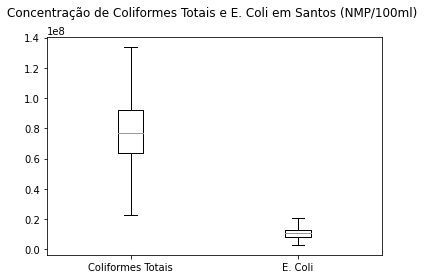

In [14]:
# Dataset with outliers correction (substituting by mean)

ct_mean = ct_ecoli_interpolate.xs('Coliformes_Totais',level = 'Parâmetro', axis = 1)['Santos'].mean()
ec_mean = ct_ecoli_interpolate.xs('E_Coli',level = 'Parâmetro', axis = 1)['Santos'].mean()


ct_ecoli_interpolate.loc[( '2011-02-01','2011-03-01','2011-09-01', '2020-10-01', '2011-08-01','2015-07-01','2016-11-01' ), ('Santos', 'Coliformes_Totais')]  = ct_mean
ct_ecoli_interpolate.loc[( '2011-07-01','2014-12-01','2017-01-01', '2019-01-01','2018-02-01', '2017-10-01' ), ('Santos', 'E_Coli')]  = ec_mean


plt.boxplot([ct_ecoli_interpolate.loc[:, ('Santos', 'Coliformes_Totais')],ct_ecoli_interpolate.xs('E_Coli',level = 'Parâmetro', axis = 1)['Santos'].to_numpy()])
plt.xticks([1, 2], ['Coliformes Totais', 'E. Coli'])
plt.title('Concentração de Coliformes Totais e E. Coli em Santos (NMP/100ml) \n')



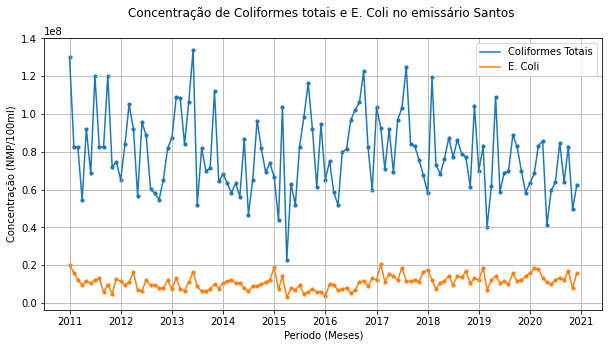

In [15]:
# Plot with data interpolation (linear) - Outliers corrected

plt.figure(figsize = (10,5))
plt.plot(ct_ecoli_interpolate.index, ct_ecoli_interpolate.xs('Coliformes_Totais',level = 'Parâmetro', axis = 1)['Santos'], label = 'Coliformes Totais')
plt.plot(ct_ecoli_interpolate.index, ct_ecoli_interpolate.xs('E_Coli',level = 'Parâmetro', axis = 1)['Santos'], label = 'E. Coli')
plt.scatter(ct_ecoli_interpolate.index, ct_ecoli_interpolate.xs('Coliformes_Totais',level = 'Parâmetro', axis = 1)['Santos'], s = 10 )
plt.scatter(ct_ecoli_interpolate.index, ct_ecoli_interpolate.xs('E_Coli',level = 'Parâmetro', axis = 1)['Santos'],s = 10 )
plt.xlabel('Periodo (Meses)')
plt.ylabel('Concentração (NMP/100ml)')
plt.title('Concentração de Coliformes totais e E. Coli no emissário Santos \n')
plt.legend(loc='best')
plt.grid()

# Coliformes totais

### Linear Regression (Santos)

In [16]:
# Regression analysis (linear) - Unified for all years (Coliformes Totais)

datestring2 = pd.DatetimeIndex(datestring[2:]) # Converting to DatetimeIndex to manipulate accordingly
months = datestring2.month[0:12] # Simulate one year 
year = []

for i in range (len(datestring2)):
  year.append(i) # Represent the amount of months analyzed over N years

def regressao_unif_ct():
  a = np.zeros(1)
  b = np.zeros(1)

  a, b = np.polyfit(year, ct_ecoli_interpolate.xs('Coliformes_Totais',level = 'Parâmetro', axis = 1)['Santos'], 1)
  col_santos_linear_unif = np.poly1d((a,b))

  return col_santos_linear_unif

regressao_unif_ct()

poly1d([  -97961.26033058, 84675262.35078058])

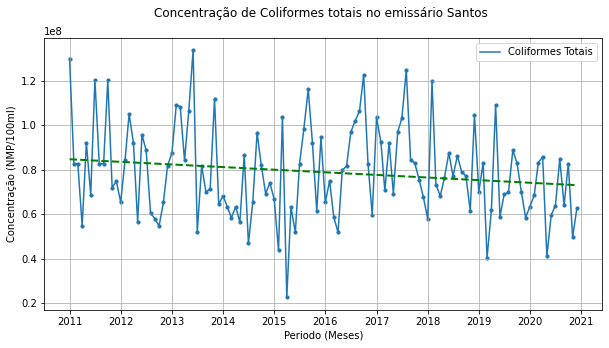

In [17]:
plt.figure(figsize = (10,5))
plt.plot(ct_ecoli_interpolate.index, ct_ecoli_interpolate.xs('Coliformes_Totais',level = 'Parâmetro', axis = 1)['Santos'], label = 'Coliformes Totais')
plt.scatter(ct_ecoli_interpolate.index, ct_ecoli_interpolate.xs('Coliformes_Totais',level = 'Parâmetro', axis = 1)['Santos'], s = 10 )
plt.plot( ct_ecoli_interpolate.index, regressao_unif_ct()(year), 'green', linestyle = '--', linewidth = 2) #, label = 'Regressão linear - 2011 ~ 2020')
plt.xlabel('Periodo (Meses)')
plt.ylabel('Concentração (NMP/100ml)')
plt.title('Concentração de Coliformes totais no emissário Santos \n')
plt.legend(loc='best')
plt.grid()

O coeficiente de correlação de Pearson é: 0.1646142381277976

O coeficiente de correlação de Spearman é: 0.1340971498046056

O coeficiente de determinação é: 0.027097847394395254


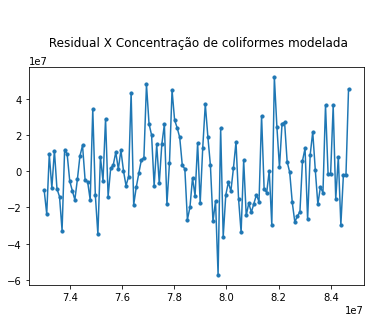

In [18]:
# Residual analysis of regression line - linear - (e = observed values (y) - predicted values (y*))
# R and R² values
# A typical residual plot has the residual values on the Y-axis and the independent variable on the x-axis.

predicted = regressao_unif_ct()(year)
observed = ct_ecoli_interpolate.xs('Coliformes_Totais',level = 'Parâmetro', axis = 1)['Santos'].to_numpy()
e = observed - predicted

plt.plot(predicted, e)
plt.scatter(predicted, e, s= 10) # The distance from the 0 value in Y-axis is how far the predicted was from the observed
plt.title('\n\n Residual X Concentração de coliformes modelada\n')

coef_corr_lin = scipy.stats.pearsonr(observed, predicted)
coef_corr_spr = scipy.stats.spearmanr(observed, predicted)
coef_det_lin = coef_corr_lin[0] **2

print(f'O coeficiente de correlação de Pearson é: {coef_corr_lin[0]}' + '\n\n' + 
      f'O coeficiente de correlação de Spearman é: {coef_corr_spr[0]}'+ '\n\n' +
      f'O coeficiente de determinação é: {coef_det_lin}') # Retorna uma tupla com a correlação, e p-value


In [19]:
# Regression analysis (linear) - Separate for each year (Coliformes totais)



# type(datestring2)

# a_colsantos_2011, b_colsantos_2011 = np.polyfit(months,ct_ecoli.xs('Coliformes_Totais',level = 'Parâmetro', axis = 1).iloc[0:12]['Santos'], 1) # polyfit(x,y,grau da regressÃƒÂ£o - nesse caso linear (1))
# f_linear_a_col_santos = np.poly1d((a_colsantos_2011, b_colsantos_2011))

def regressao_frac_ct ():

    a = np.zeros(10)
    b = np.zeros(10)
  
    
    a[0], b[0] = np.polyfit(months,ct_ecoli_interpolate.xs('Coliformes_Totais',level = 'Parâmetro', axis = 1).iloc[0:12]['Santos'], 1) # polyfit(x,y,grau da regressÃƒÂ£o - nesse caso linear (1))
    col_santos_linear1 = np.poly1d((a[0], b[0]))

    a[1], b[1] = np.polyfit(months,ct_ecoli_interpolate.xs('Coliformes_Totais',level = 'Parâmetro', axis = 1).iloc[12:24]['Santos'], 1) # polyfit(x,y,grau da regressÃƒÂ£o - nesse caso linear (1))
    col_santos_linear2 = np.poly1d((a[1], b[1]))

    a[2], b[2] = np.polyfit(months,ct_ecoli_interpolate.xs('Coliformes_Totais',level = 'Parâmetro', axis = 1).iloc[24:36]['Santos'], 1) # polyfit(x,y,grau da regressÃƒÂ£o - nesse caso linear (1))
    col_santos_linear3 = np.poly1d((a[2], b[2]))
    
    a[3], b[3] = np.polyfit(months,ct_ecoli_interpolate.xs('Coliformes_Totais',level = 'Parâmetro', axis = 1).iloc[36:48]['Santos'], 1) # polyfit(x,y,grau da regressÃƒÂ£o - nesse caso linear (1))
    col_santos_linear4 = np.poly1d((a[3], b[3]))

    a[4], b[4] = np.polyfit(months,ct_ecoli_interpolate.xs('Coliformes_Totais',level = 'Parâmetro', axis = 1).iloc[48:60]['Santos'], 1) # polyfit(x,y,grau da regressÃƒÂ£o - nesse caso linear (1))
    col_santos_linear5 = np.poly1d((a[4], b[4]))

    a[5], b[5] = np.polyfit(months,ct_ecoli_interpolate.xs('Coliformes_Totais',level = 'Parâmetro', axis = 1).iloc[60:72]['Santos'], 1) # polyfit(x,y,grau da regressÃƒÂ£o - nesse caso linear (1))
    col_santos_linear6 = np.poly1d((a[5], b[5]))

    a[6], b[6] = np.polyfit(months,ct_ecoli_interpolate.xs('Coliformes_Totais',level = 'Parâmetro', axis = 1).iloc[72:84]['Santos'], 1) # polyfit(x,y,grau da regressÃƒÂ£o - nesse caso linear (1))
    col_santos_linear7 = np.poly1d((a[6], b[6]))

    a[7], b[7] = np.polyfit(months,ct_ecoli_interpolate.xs('Coliformes_Totais',level = 'Parâmetro', axis = 1).iloc[84:96]['Santos'], 1) # polyfit(x,y,grau da regressÃƒÂ£o - nesse caso linear (1))
    col_santos_linear8 = np.poly1d((a[7], b[7]))

    a[8], b[8] = np.polyfit(months,ct_ecoli_interpolate.xs('Coliformes_Totais',level = 'Parâmetro', axis = 1).iloc[96:108]['Santos'], 1) # polyfit(x,y,grau da regressÃƒÂ£o - nesse caso linear (1))
    col_santos_linear9 = np.poly1d((a[8], b[8]))

    a[9], b[9] = np.polyfit(months,ct_ecoli_interpolate.xs('Coliformes_Totais',level = 'Parâmetro', axis = 1).iloc[108:120]['Santos'], 1) # polyfit(x,y,grau da regressÃƒÂ£o - nesse caso linear (1))
    col_santos_linear10 = (np.poly1d((a[9], b[9])))

    return col_santos_linear1, col_santos_linear2, col_santos_linear3, col_santos_linear4, col_santos_linear5, col_santos_linear6, col_santos_linear7, col_santos_linear8, col_santos_linear9, col_santos_linear10

regressao_frac_ct()    

(poly1d([ -968184.14918415, 94903224.74747474]),
 poly1d([-1770926.57342658, 87136439.39393936]),
 poly1d([-2.49606643e+06,  1.06264848e+08]),
 poly1d([ 1522543.7062937 , 59247840.90909091]),
 poly1d([ 3458689.1025641 , 52227277.77777777]),
 poly1d([ 2824705.41958042, 63472338.38383836]),
 poly1d([-1137360.13986015, 95996174.24242423]),
 poly1d([  303164.33566433, 78713181.81818178]),
 poly1d([  281984.26573426, 69981477.27272728]),
 poly1d([ -548223.48484849, 70965751.26262625]))

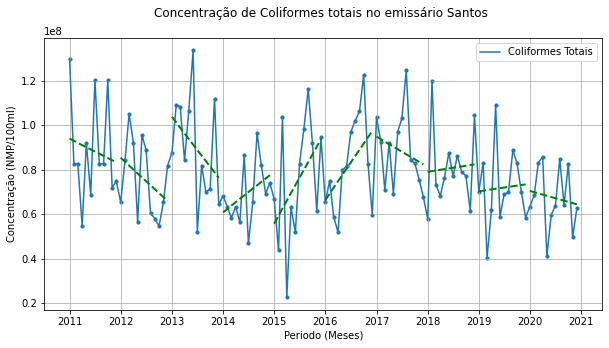

In [20]:
# Plot with linear regression for each year (Coliformes totais) - Seperate regressions

plt.figure(figsize = (10,5))
plt.plot(ct_ecoli_interpolate.index, ct_ecoli_interpolate.xs('Coliformes_Totais',level = 'Parâmetro', axis = 1)['Santos'], label = 'Coliformes Totais')
plt.scatter(ct_ecoli_interpolate.index, ct_ecoli_interpolate.xs('Coliformes_Totais',level = 'Parâmetro', axis = 1)['Santos'], s = 10 )
plt.plot( ct_ecoli_interpolate.iloc[0:12].index, regressao_frac_ct()[0](months), 'green', linestyle = '--', linewidth = 2) #, label = 'Regressão linear - 2011')
plt.plot( ct_ecoli_interpolate.iloc[12:24].index, regressao_frac_ct()[1](months), 'green', linestyle = '--', linewidth = 2)#, label = 'Regressão linear - 2012')
plt.plot( ct_ecoli_interpolate.iloc[24:36].index, regressao_frac_ct()[2](months), 'green', linestyle = '--', linewidth = 2)#, label = 'Regressão linear - 2013')
plt.plot( ct_ecoli_interpolate.iloc[36:48].index, regressao_frac_ct()[3](months), 'green', linestyle = '--', linewidth = 2)#, label = 'Regressão linear - 2014')
plt.plot( ct_ecoli_interpolate.iloc[48:60].index, regressao_frac_ct()[4](months), 'green', linestyle = '--', linewidth = 2)#, label = 'Regressão linear - 2015')
plt.plot( ct_ecoli_interpolate.iloc[60:72].index, regressao_frac_ct()[5](months), 'green', linestyle = '--', linewidth = 2)#, label = 'Regressão linear - 2016')
plt.plot( ct_ecoli_interpolate.iloc[72:84].index, regressao_frac_ct()[6](months), 'green', linestyle = '--', linewidth = 2)#, label = 'Regressão linear - 2017')
plt.plot( ct_ecoli_interpolate.iloc[84:96].index, regressao_frac_ct()[7](months), 'green', linestyle = '--', linewidth = 2)#, label = 'Regressão linear - 2018')
plt.plot( ct_ecoli_interpolate.iloc[96:108].index, regressao_frac_ct()[8](months), 'green', linestyle = '--', linewidth = 2)#, label = 'Regressão linear - 2019')
plt.plot( ct_ecoli_interpolate.iloc[108:120].index, regressao_frac_ct()[9](months), 'green', linestyle = '--', linewidth = 2)#, label = 'Regressão linear - 2020')
plt.xlabel('Periodo (Meses)')
plt.ylabel('Concentração (NMP/100ml)')
plt.title('Concentração de Coliformes totais no emissário Santos \n')
plt.legend(loc='best')
plt.grid()

In [21]:
# Residual analysis of regression line (e = observed values (y) - predicted values (y*))
# R and R² values
# A typical residual plot has the residual values on the Y-axis and the independent variable on the x-axis.

predicted_1 = regressao_frac_ct()[0](months)
observed_1 = ct_ecoli_interpolate.xs('Coliformes_Totais',level = 'Parâmetro', axis = 1).iloc[0:12]['Santos'].to_numpy()
e_1 = observed_1 - predicted_1
predicted_2 = regressao_frac_ct()[1](months)
observed_2 = ct_ecoli_interpolate.xs('Coliformes_Totais',level = 'Parâmetro', axis = 1).iloc[12:24]['Santos'].to_numpy()
e_2 = observed_2 - predicted_2
predicted_3 = regressao_frac_ct()[2](months)
observed_3 = ct_ecoli_interpolate.xs('Coliformes_Totais',level = 'Parâmetro', axis = 1).iloc[24:36]['Santos'].to_numpy()
e_3 = observed_3 - predicted_3
predicted_4 = regressao_frac_ct()[3](months)
observed_4 = ct_ecoli_interpolate.xs('Coliformes_Totais',level = 'Parâmetro', axis = 1).iloc[36:48]['Santos'].to_numpy()
e_4 = observed_4 - predicted_4
predicted_5 = regressao_frac_ct()[4](months)
observed_5 = ct_ecoli_interpolate.xs('Coliformes_Totais',level = 'Parâmetro', axis = 1).iloc[48:60]['Santos'].to_numpy()
e_5 = observed_5 - predicted_5
predicted_6 = regressao_frac_ct()[5](months)
observed_6 = ct_ecoli_interpolate.xs('Coliformes_Totais',level = 'Parâmetro', axis = 1).iloc[60:72]['Santos'].to_numpy()
e_6 = observed_6 - predicted_6
predicted_7 = regressao_frac_ct()[6](months)
observed_7 = ct_ecoli_interpolate.xs('Coliformes_Totais',level = 'Parâmetro', axis = 1).iloc[72:84]['Santos'].to_numpy()
e_7 = observed_7 - predicted_7
predicted_8 = regressao_frac_ct()[7](months)
observed_8 = ct_ecoli_interpolate.xs('Coliformes_Totais',level = 'Parâmetro', axis = 1).iloc[84:96]['Santos'].to_numpy()
e_8 = observed_8 - predicted_8
predicted_9 = regressao_frac_ct()[8](months)
observed_9 = ct_ecoli_interpolate.xs('Coliformes_Totais',level = 'Parâmetro', axis = 1).iloc[96:108]['Santos'].to_numpy()
e_9 = observed_9 - predicted_9
predicted_10 = regressao_frac_ct()[9](months)
observed_10 = ct_ecoli_interpolate.xs('Coliformes_Totais',level = 'Parâmetro', axis = 1).iloc[108:120]['Santos'].to_numpy()
e_10 = observed_10 - predicted_10



coef_corr_1 = scipy.stats.pearsonr(observed_1, predicted_1)
coef_corr_2 = scipy.stats.pearsonr(observed_2, predicted_2)
coef_corr_3 = scipy.stats.pearsonr(observed_3, predicted_3)
coef_corr_4 = scipy.stats.pearsonr(observed_4, predicted_4)
coef_corr_5 = scipy.stats.pearsonr(observed_5, predicted_5)
coef_corr_6 = scipy.stats.pearsonr(observed_6, predicted_6)
coef_corr_7 = scipy.stats.pearsonr(observed_7, predicted_7)
coef_corr_8 = scipy.stats.pearsonr(observed_8, predicted_8)
coef_corr_9 = scipy.stats.pearsonr(observed_9, predicted_9)
coef_corr_10 = scipy.stats.pearsonr(observed_10, predicted_10)

coef_spr_1 = scipy.stats.spearmanr(observed_1, predicted_1)
coef_spr_2 = scipy.stats.spearmanr(observed_2, predicted_2)
coef_spr_3 = scipy.stats.spearmanr(observed_3, predicted_3)
coef_spr_4 = scipy.stats.spearmanr(observed_4, predicted_4)
coef_spr_5 = scipy.stats.spearmanr(observed_5, predicted_5)
coef_spr_6 = scipy.stats.spearmanr(observed_6, predicted_6)
coef_spr_7 = scipy.stats.spearmanr(observed_7, predicted_7)
coef_spr_8 = scipy.stats.spearmanr(observed_8, predicted_8)
coef_spr_9 = scipy.stats.spearmanr(observed_9, predicted_9)
coef_spr_10 = scipy.stats.spearmanr(observed_10, predicted_10)



coef_corr_med = np.mean((coef_corr_1[0], coef_corr_2[0],coef_corr_3[0],coef_corr_4[0],coef_corr_5[0],coef_corr_6[0],coef_corr_7[0],coef_corr_8[0],coef_corr_9[0],coef_corr_10[0]))
coef_det_med = coef_corr_med**2
coef_spr_med = np.mean((coef_spr_1[0], coef_spr_2[0],coef_spr_3[0],coef_spr_4[0],coef_spr_5[0],coef_spr_6[0],coef_spr_7[0],coef_spr_8[0],coef_spr_9[0],coef_spr_10[0]))

# coef_det_lin = coef_corr_lin[0] **2
print(f'O coeficiente de correlação é:{coef_corr_med}' + '\n\n' + 
      f'O coeficiente de correlação de Spearman é: {coef_spr_med}'+ '\n\n' +
      f'O coeficiente de determinação é: {coef_det_med}') # Retorna uma tupla com a correlação, e p-value

O coeficiente de correlação é:0.27077742484776013

O coeficiente de correlação de Spearman é: 0.3211354792796456

O coeficiente de determinação é: 0.07332041380718439


### Quadratic regression (Santos)

In [22]:
# Regression analysis (quadratic) - Unified for all years (Coliformes Totais)

def regressao_quad_unif_ct():

  a_quad, a1_quad, b_quad = np.polyfit(year, ct_ecoli_interpolate.xs('E_Coli',level = 'Parâmetro', axis = 1)['Santos'], 2)
  reg_quad = np.poly1d((a1_quad, a_quad, b_quad))

  return reg_quad

regressao_quad_unif_ct()

poly1d([-8.82436499e+04,  1.00764588e+03,  1.14916669e+07])

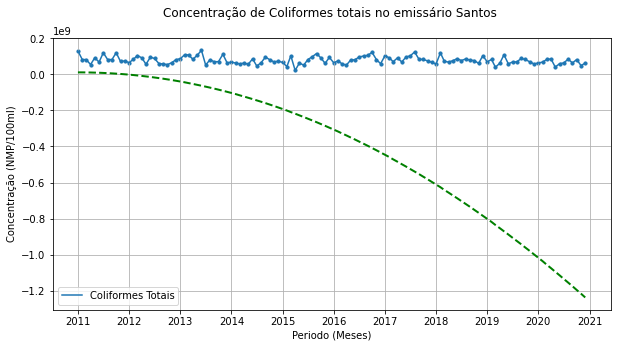

In [23]:
plt.figure(figsize = (10,5))
plt.plot(ct_ecoli_interpolate.index, ct_ecoli_interpolate.xs('Coliformes_Totais',level = 'Parâmetro', axis = 1)['Santos'], label = 'Coliformes Totais')
plt.scatter(ct_ecoli_interpolate.index, ct_ecoli_interpolate.xs('Coliformes_Totais',level = 'Parâmetro', axis = 1)['Santos'], s = 10 )
plt.plot( ct_ecoli_interpolate.index, regressao_quad_unif_ct()(year), 'green', linestyle = '--', linewidth = 2) #, label = 'Regressão linear - 2011 ~ 2020')
plt.xlabel('Periodo (Meses)')
plt.ylabel('Concentração (NMP/100ml)')
plt.title('Concentração de Coliformes totais no emissário Santos \n')
plt.legend(loc='best')
plt.grid()

O coeficiente de correlação é:0.16849438643453715

O coeficiente de correlação de Spearman é: 0.1340971498046056

O coeficiente de determinação é: 0.028390358259951138


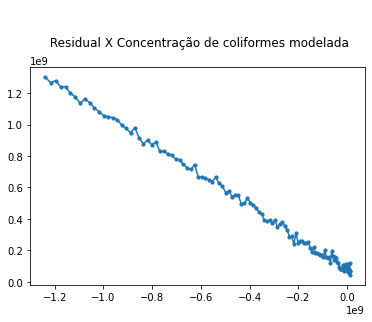

In [24]:
# Residual analysis of regression line - quadratic - (e = observed values (y) - predicted values (y*))
# R and R² values
# A typical residual plot has the residual values on the Y-axis and the independent variable on the x-axis.

predicted = regressao_quad_unif_ct()(year)
observed = ct_ecoli_interpolate.xs('Coliformes_Totais',level = 'Parâmetro', axis = 1)['Santos'].to_numpy()
e = observed - predicted

plt.plot(predicted, e)
plt.scatter(predicted, e, s= 10) # The distance from the 0 value in Y-axis is how far the predicted was from the observed
plt.title('\n\n Residual X Concentração de coliformes modelada\n')

coef_corr_lin = scipy.stats.pearsonr(observed, predicted)
coef_corr_spr = scipy.stats.spearmanr(observed, predicted)
coef_det_lin = coef_corr_lin[0] **2

print(f'O coeficiente de correlação é:{coef_corr_lin[0]}' + '\n\n' +
      f'O coeficiente de correlação de Spearman é: {coef_corr_spr[0]}'+ '\n\n' + 
      f'O coeficiente de determinação é: {coef_det_lin}') # Retorna uma tupla com a correlação, e p-value



In [25]:
# Regression analysis (quadratic) - Separate for each year (Coliformes totais)

def regressao_quad_frac_ct ():
    a1 = np.zeros(10)
    a = np.zeros(10)
    b = np.zeros(10)
  
    
    a1[0], a[0], b[0] = np.polyfit(months,ct_ecoli_interpolate.xs('Coliformes_Totais',level = 'Parâmetro', axis = 1).iloc[0:12]['Santos'], 2) # polyfit(x,y,grau da regressÃƒÂ£o - nesse caso linear (1))
    col_santos_linear1 = np.poly1d((a1[0], a[0], b[0]))

    a1[1], a[1], b[1] = np.polyfit(months,ct_ecoli_interpolate.xs('Coliformes_Totais',level = 'Parâmetro', axis = 1).iloc[12:24]['Santos'], 2) # polyfit(x,y,grau da regressÃƒÂ£o - nesse caso linear (1))
    col_santos_linear2 = np.poly1d((a1[1], a[1], b[1]))

    a1[2], a[2], b[2] = np.polyfit(months,ct_ecoli_interpolate.xs('Coliformes_Totais',level = 'Parâmetro', axis = 1).iloc[24:36]['Santos'], 2) # polyfit(x,y,grau da regressÃƒÂ£o - nesse caso linear (1))
    col_santos_linear3 = np.poly1d((a1[2], a[2], b[2]))
    
    a1[3], a[3], b[3] = np.polyfit(months,ct_ecoli_interpolate.xs('Coliformes_Totais',level = 'Parâmetro', axis = 1).iloc[36:48]['Santos'], 2) # polyfit(x,y,grau da regressÃƒÂ£o - nesse caso linear (1))
    col_santos_linear4 = np.poly1d((a1[3], a[3], b[3]))

    a1[4], a[4], b[4] = np.polyfit(months,ct_ecoli_interpolate.xs('Coliformes_Totais',level = 'Parâmetro', axis = 1).iloc[48:60]['Santos'], 2) # polyfit(x,y,grau da regressÃƒÂ£o - nesse caso linear (1))
    col_santos_linear5 = np.poly1d((a1[4], a[4], b[4]))

    a1[5], a[5], b[5] = np.polyfit(months,ct_ecoli_interpolate.xs('Coliformes_Totais',level = 'Parâmetro', axis = 1).iloc[60:72]['Santos'], 2) # polyfit(x,y,grau da regressÃƒÂ£o - nesse caso linear (1))
    col_santos_linear6 = np.poly1d((a1[5], a[5], b[5]))

    a1[6], a[6], b[6] = np.polyfit(months,ct_ecoli_interpolate.xs('Coliformes_Totais',level = 'Parâmetro', axis = 1).iloc[72:84]['Santos'], 2) # polyfit(x,y,grau da regressÃƒÂ£o - nesse caso linear (1))
    col_santos_linear7 = np.poly1d((a1[6], a[6], b[6]))

    a1[7], a[7], b[7] = np.polyfit(months,ct_ecoli_interpolate.xs('Coliformes_Totais',level = 'Parâmetro', axis = 1).iloc[84:96]['Santos'], 2) # polyfit(x,y,grau da regressÃƒÂ£o - nesse caso linear (1))
    col_santos_linear8 = np.poly1d((a1[7], a[7], b[7]))

    a1[8], a[8], b[8] = np.polyfit(months,ct_ecoli_interpolate.xs('Coliformes_Totais',level = 'Parâmetro', axis = 1).iloc[96:108]['Santos'], 2) # polyfit(x,y,grau da regressÃƒÂ£o - nesse caso linear (1))
    col_santos_linear9 = np.poly1d((a1[8], a[8], b[8]))

    a1[9], a[9], b[9] = np.polyfit(months,ct_ecoli_interpolate.xs('Coliformes_Totais',level = 'Parâmetro', axis = 1).iloc[108:120]['Santos'], 2) # polyfit(x,y,grau da regressÃƒÂ£o - nesse caso linear (1))
    col_santos_linear10 = np.poly1d((a1[9], a[9], b[9]))

    return col_santos_linear1, col_santos_linear2, col_santos_linear3, col_santos_linear4, col_santos_linear5, col_santos_linear6, col_santos_linear7, col_santos_linear8, col_santos_linear9, col_santos_linear10

regressao_quad_frac_ct()    

(poly1d([ 3.27437146e+05, -5.22486705e+06,  1.04835485e+08]),
 poly1d([ -100668.08191808,  -462241.50849154, 84082840.90909095]),
 poly1d([-1.26172577e+05, -8.55822927e+05,  1.02437614e+08]),
 poly1d([   88701.92307692,   369418.70629371, 61938465.9090909 ]),
 poly1d([-1.24794997e+04,  3.62092260e+06,  5.18487330e+07]),
 poly1d([ -802093.63553114, 13251922.68148521, 39142164.77272715]),
 poly1d([ -466690.80919081,  4929620.3796204 , 81839886.36363624]),
 poly1d([  157518.73126873, -1744579.17082919, 83491250.00000003]),
 poly1d([ -302717.90709291,  4217317.05794205, 60799034.09090909]),
 poly1d([ -116962.39177489,   972287.60822511, 67417892.04545453]))

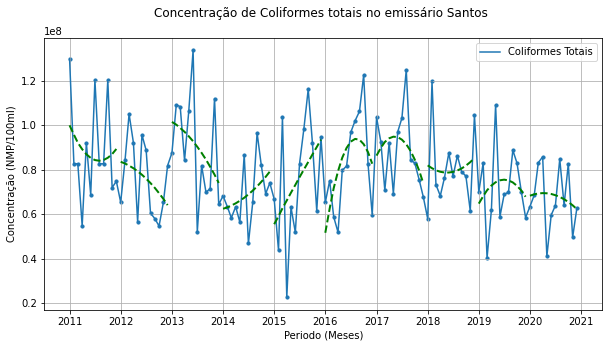

In [26]:
# Plot with linear regression for each year (Coliformes totais) - Seperate regressions

plt.figure(figsize = (10,5))
plt.plot(ct_ecoli_interpolate.index, ct_ecoli_interpolate.xs('Coliformes_Totais',level = 'Parâmetro', axis = 1)['Santos'], label = 'Coliformes Totais')
plt.scatter(ct_ecoli_interpolate.index, ct_ecoli_interpolate.xs('Coliformes_Totais',level = 'Parâmetro', axis = 1)['Santos'], s = 10 )
plt.plot( ct_ecoli_interpolate.iloc[0:12].index, regressao_quad_frac_ct()[0](months), 'green', linestyle = '--', linewidth = 2) #, label = 'Regressão linear - 2011')
plt.plot( ct_ecoli_interpolate.iloc[12:24].index, regressao_quad_frac_ct()[1](months), 'green', linestyle = '--', linewidth = 2)#, label = 'Regressão linear - 2012')
plt.plot( ct_ecoli_interpolate.iloc[24:36].index, regressao_quad_frac_ct()[2](months), 'green', linestyle = '--', linewidth = 2)#, label = 'Regressão linear - 2013')
plt.plot( ct_ecoli_interpolate.iloc[36:48].index, regressao_quad_frac_ct()[3](months), 'green', linestyle = '--', linewidth = 2)#, label = 'Regressão linear - 2014')
plt.plot( ct_ecoli_interpolate.iloc[48:60].index, regressao_quad_frac_ct()[4](months), 'green', linestyle = '--', linewidth = 2)#, label = 'Regressão linear - 2015')
plt.plot( ct_ecoli_interpolate.iloc[60:72].index, regressao_quad_frac_ct()[5](months), 'green', linestyle = '--', linewidth = 2)#, label = 'Regressão linear - 2016')
plt.plot( ct_ecoli_interpolate.iloc[72:84].index, regressao_quad_frac_ct()[6](months), 'green', linestyle = '--', linewidth = 2)#, label = 'Regressão linear - 2017')
plt.plot( ct_ecoli_interpolate.iloc[84:96].index, regressao_quad_frac_ct()[7](months), 'green', linestyle = '--', linewidth = 2)#, label = 'Regressão linear - 2018')
plt.plot( ct_ecoli_interpolate.iloc[96:108].index, regressao_quad_frac_ct()[8](months), 'green', linestyle = '--', linewidth = 2)#, label = 'Regressão linear - 2019')
plt.plot( ct_ecoli_interpolate.iloc[108:120].index, regressao_quad_frac_ct()[9](months), 'green', linestyle = '--', linewidth = 2)#, label = 'Regressão linear - 2020')
plt.xlabel('Periodo (Meses)')
plt.ylabel('Concentração (NMP/100ml)')
plt.title('Concentração de Coliformes totais no emissário Santos \n')
plt.legend(loc='best')
plt.grid()

In [27]:
# Residual analysis of regression line (e = observed values (y) - predicted values (y*))
# R and R² values
# A typical residual plot has the residual values on the Y-axis and the independent variable on the x-axis.

predicted_1 = regressao_quad_frac_ct()[0](months)
observed_1 = ct_ecoli_interpolate.xs('Coliformes_Totais',level = 'Parâmetro', axis = 1).iloc[0:12]['Santos'].to_numpy()
e_1 = observed_1 - predicted_1
predicted_2 = regressao_quad_frac_ct()[1](months)
observed_2 = ct_ecoli_interpolate.xs('Coliformes_Totais',level = 'Parâmetro', axis = 1).iloc[12:24]['Santos'].to_numpy()
e_2 = observed_2 - predicted_2
predicted_3 = regressao_quad_frac_ct()[2](months)
observed_3 = ct_ecoli_interpolate.xs('Coliformes_Totais',level = 'Parâmetro', axis = 1).iloc[24:36]['Santos'].to_numpy()
e_3 = observed_3 - predicted_3
predicted_4 = regressao_quad_frac_ct()[3](months)
observed_4 = ct_ecoli_interpolate.xs('Coliformes_Totais',level = 'Parâmetro', axis = 1).iloc[36:48]['Santos'].to_numpy()
e_4 = observed_4 - predicted_4
predicted_5 = regressao_quad_frac_ct()[4](months)
observed_5 = ct_ecoli_interpolate.xs('Coliformes_Totais',level = 'Parâmetro', axis = 1).iloc[48:60]['Santos'].to_numpy()
e_5 = observed_5 - predicted_5
predicted_6 = regressao_quad_frac_ct()[5](months)
observed_6 = ct_ecoli_interpolate.xs('Coliformes_Totais',level = 'Parâmetro', axis = 1).iloc[60:72]['Santos'].to_numpy()
e_6 = observed_6 - predicted_6
predicted_7 = regressao_quad_frac_ct()[6](months)
observed_7 = ct_ecoli_interpolate.xs('Coliformes_Totais',level = 'Parâmetro', axis = 1).iloc[72:84]['Santos'].to_numpy()
e_7 = observed_7 - predicted_7
predicted_8 = regressao_quad_frac_ct()[7](months)
observed_8 = ct_ecoli_interpolate.xs('Coliformes_Totais',level = 'Parâmetro', axis = 1).iloc[84:96]['Santos'].to_numpy()
e_8 = observed_8 - predicted_8
predicted_9 = regressao_quad_frac_ct()[8](months)
observed_9 = ct_ecoli_interpolate.xs('Coliformes_Totais',level = 'Parâmetro', axis = 1).iloc[96:108]['Santos'].to_numpy()
e_9 = observed_9 - predicted_9
predicted_10 = regressao_quad_frac_ct()[9](months)
observed_10 = ct_ecoli_interpolate.xs('Coliformes_Totais',level = 'Parâmetro', axis = 1).iloc[108:120]['Santos'].to_numpy()
e_10 = observed_10 - predicted_10



coef_corr_1 = scipy.stats.pearsonr(observed_1, predicted_1)
coef_corr_2 = scipy.stats.pearsonr(observed_2, predicted_2)
coef_corr_3 = scipy.stats.pearsonr(observed_3, predicted_3)
coef_corr_4 = scipy.stats.pearsonr(observed_4, predicted_4)
coef_corr_5 = scipy.stats.pearsonr(observed_5, predicted_5)
coef_corr_6 = scipy.stats.pearsonr(observed_6, predicted_6)
coef_corr_7 = scipy.stats.pearsonr(observed_7, predicted_7)
coef_corr_8 = scipy.stats.pearsonr(observed_8, predicted_8)
coef_corr_9 = scipy.stats.pearsonr(observed_9, predicted_9)
coef_corr_10 = scipy.stats.pearsonr(observed_10, predicted_10)

coef_spr_1 = scipy.stats.spearmanr(observed_1, predicted_1)
coef_spr_2 = scipy.stats.spearmanr(observed_2, predicted_2)
coef_spr_3 = scipy.stats.spearmanr(observed_3, predicted_3)
coef_spr_4 = scipy.stats.spearmanr(observed_4, predicted_4)
coef_spr_5 = scipy.stats.spearmanr(observed_5, predicted_5)
coef_spr_6 = scipy.stats.spearmanr(observed_6, predicted_6)
coef_spr_7 = scipy.stats.spearmanr(observed_7, predicted_7)
coef_spr_8 = scipy.stats.spearmanr(observed_8, predicted_8)
coef_spr_9 = scipy.stats.spearmanr(observed_9, predicted_9)
coef_spr_10 = scipy.stats.spearmanr(observed_10, predicted_10)

coef_corr_med = np.mean((coef_corr_1[0], coef_corr_2[0],coef_corr_3[0],coef_corr_4[0],coef_corr_5[0],coef_corr_6[0],coef_corr_7[0],coef_corr_8[0],coef_corr_9[0],coef_corr_10[0]))
coef_det_med = coef_corr_med**2
coef_spr_med = np.mean((coef_spr_1[0], coef_spr_2[0],coef_spr_3[0],coef_spr_4[0],coef_spr_5[0],coef_spr_6[0],coef_spr_7[0],coef_spr_8[0],coef_spr_9[0],coef_spr_10[0]))

# coef_det_lin = coef_corr_lin[0] **2
print(f'O coeficiente de correlação é:{coef_corr_med}' + '\n\n' + 
      f'O coeficiente de correlação de Spearman é: {coef_spr_med}'+ '\n\n' +
      f'O coeficiente de determinação é: {coef_det_med}') # Retorna uma tupla com a correlação, e p-value

O coeficiente de correlação é:0.3310392271167134

O coeficiente de correlação de Spearman é: 0.28468525345053053

O coeficiente de determinação é: 0.10958696989003096


### Cubic regression (Santos)

In [28]:
# Regression analysis (cubic) - Unified for all years (Coliformes Totais)

def regressao_cubic_unif_ct():

  a_cub, a1_cub, a2_cub, b_cub = np.polyfit(year, ct_ecoli_interpolate.xs('Coliformes_Totais',level = 'Parâmetro', axis = 1)['Santos'], 3)
  reg_cub = np.poly1d((a_cub, a1_cub, a2_cub, b_cub))

  return reg_cub

regressao_cubic_unif_ct()

poly1d([-1.48970976e+02,  2.58906036e+04, -1.27503443e+06,  9.52726795e+07])

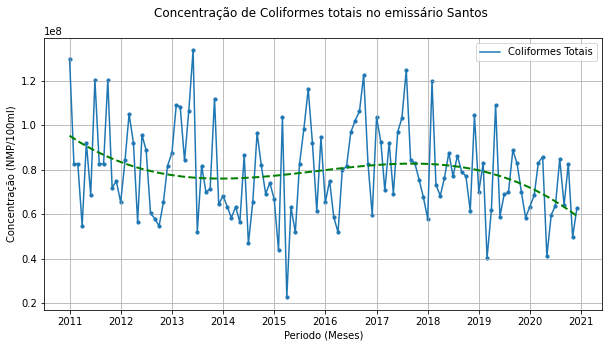

In [29]:
plt.figure(figsize = (10,5))
plt.plot(ct_ecoli_interpolate.index, ct_ecoli_interpolate.xs('Coliformes_Totais',level = 'Parâmetro', axis = 1)['Santos'], label = 'Coliformes Totais')
plt.scatter(ct_ecoli_interpolate.index, ct_ecoli_interpolate.xs('Coliformes_Totais',level = 'Parâmetro', axis = 1)['Santos'], s = 10 )
plt.plot( ct_ecoli_interpolate.index, regressao_cubic_unif_ct()(year), 'green', linestyle = '--', linewidth = 2) #, label = 'Regressão linear - 2011 ~ 2020')
plt.xlabel('Periodo (Meses)')
plt.ylabel('Concentração (NMP/100ml)')
plt.title('Concentração de Coliformes totais no emissário Santos \n')
plt.legend(loc='best')
plt.grid()

O coeficiente de correlação é:0.2899452836894066

O coeficiente de correlação de Spearman é: 0.28979598488282166

O coeficiente de determinação é: 0.08406826753373046


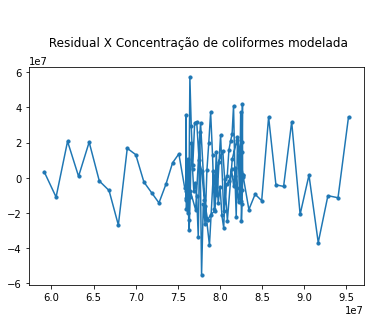

In [30]:
# Residual analysis of regression line - quadratic - (e = observed values (y) - predicted values (y*))
# R and R² values
# A typical residual plot has the residual values on the Y-axis and the independent variable on the x-axis.

predicted = regressao_cubic_unif_ct()(year)
observed = ct_ecoli_interpolate.xs('Coliformes_Totais',level = 'Parâmetro', axis = 1)['Santos'].to_numpy()
e = observed - predicted

plt.plot(predicted, e)
plt.scatter(predicted, e, s= 10) # The distance from the 0 value in Y-axis is how far the predicted was from the observed
plt.title('\n\n Residual X Concentração de coliformes modelada\n')

coef_corr_lin = scipy.stats.pearsonr(observed, predicted)
coef_det_lin = coef_corr_lin[0] **2
coef_corr_spr = scipy.stats.spearmanr(observed, predicted)

print(f'O coeficiente de correlação é:{coef_corr_lin[0]}' + '\n\n' + 
      f'O coeficiente de correlação de Spearman é: {coef_corr_spr[0]}'+ '\n\n' + 
      f'O coeficiente de determinação é: {coef_det_lin}') # Retorna uma tupla com a correlação, e p-value

In [31]:
# Regression analysis (cubic) - Separate for each year (Coliformes totais)

def regressao_cub_frac_ct ():
    a2 = np.zeros(10)
    a1 = np.zeros(10)
    a = np.zeros(10)
    b = np.zeros(10)
  
    
    a2[0],a1[0], a[0], b[0] = np.polyfit(months,ct_ecoli_interpolate.xs('Coliformes_Totais',level = 'Parâmetro', axis = 1).iloc[0:12]['Santos'], 3) # polyfit(x,y,grau da regressÃƒÂ£o - nesse caso linear (1))
    col_santos_linear1 = np.poly1d((a2[0],a1[0], a[0], b[0]))

    a2[1],a1[1], a[1], b[1] = np.polyfit(months,ct_ecoli_interpolate.xs('Coliformes_Totais',level = 'Parâmetro', axis = 1).iloc[12:24]['Santos'], 3) # polyfit(x,y,grau da regressÃƒÂ£o - nesse caso linear (1))
    col_santos_linear2 = np.poly1d((a2[1],a1[1], a[1], b[1]))

    a2[2],a1[2], a[2], b[2] = np.polyfit(months,ct_ecoli_interpolate.xs('Coliformes_Totais',level = 'Parâmetro', axis = 1).iloc[24:36]['Santos'], 3) # polyfit(x,y,grau da regressÃƒÂ£o - nesse caso linear (1))
    col_santos_linear3 = np.poly1d((a2[2],a1[2], a[2], b[2]))
    
    a2[3],a1[3], a[3], b[3] = np.polyfit(months,ct_ecoli_interpolate.xs('Coliformes_Totais',level = 'Parâmetro', axis = 1).iloc[36:48]['Santos'], 3) # polyfit(x,y,grau da regressÃƒÂ£o - nesse caso linear (1))
    col_santos_linear4 = np.poly1d((a2[3],a1[3], a[3], b[3]))

    a2[4],a1[4], a[4], b[4] = np.polyfit(months,ct_ecoli_interpolate.xs('Coliformes_Totais',level = 'Parâmetro', axis = 1).iloc[48:60]['Santos'], 3) # polyfit(x,y,grau da regressÃƒÂ£o - nesse caso linear (1))
    col_santos_linear5 = np.poly1d((a2[4],a1[4], a[4], b[4]))

    a2[5],a1[5], a[5], b[5] = np.polyfit(months,ct_ecoli_interpolate.xs('Coliformes_Totais',level = 'Parâmetro', axis = 1).iloc[60:72]['Santos'], 3) # polyfit(x,y,grau da regressÃƒÂ£o - nesse caso linear (1))
    col_santos_linear6 = np.poly1d((a2[5],a1[5], a[5], b[5]))

    a2[6],a1[6], a[6], b[6] = np.polyfit(months,ct_ecoli_interpolate.xs('Coliformes_Totais',level = 'Parâmetro', axis = 1).iloc[72:84]['Santos'], 3) # polyfit(x,y,grau da regressÃƒÂ£o - nesse caso linear (1))
    col_santos_linear7 = np.poly1d((a2[6],a1[6], a[6], b[6]))

    a2[7],a1[7], a[7], b[7] = np.polyfit(months,ct_ecoli_interpolate.xs('Coliformes_Totais',level = 'Parâmetro', axis = 1).iloc[84:96]['Santos'], 3) # polyfit(x,y,grau da regressÃƒÂ£o - nesse caso linear (1))
    col_santos_linear8 = np.poly1d((a2[7],a1[7], a[7], b[7]))

    a2[8],a1[8], a[8], b[8] = np.polyfit(months,ct_ecoli_interpolate.xs('Coliformes_Totais',level = 'Parâmetro', axis = 1).iloc[96:108]['Santos'], 3) # polyfit(x,y,grau da regressÃƒÂ£o - nesse caso linear (1))
    col_santos_linear9 = np.poly1d((a2[8],a1[8], a[8], b[8]))

    a2[9],a1[9], a[9], b[9] = np.polyfit(months,ct_ecoli_interpolate.xs('Coliformes_Totais',level = 'Parâmetro', axis = 1).iloc[108:120]['Santos'], 3) # polyfit(x,y,grau da regressÃƒÂ£o - nesse caso linear (1))
    col_santos_linear10 = np.poly1d((a2[9],a1[9], a[9], b[9]))

    return col_santos_linear1, col_santos_linear2, col_santos_linear3, col_santos_linear4, col_santos_linear5, col_santos_linear6, col_santos_linear7, col_santos_linear8, col_santos_linear9, col_santos_linear10

regressao_cub_frac_ct()   

(poly1d([-4.47995554e+05,  9.06335045e+06, -5.24883980e+07,  1.65986878e+08]),
 poly1d([  322084.3045843 , -6381312.02131201, 33517652.62515252,
        40118333.33333371]),
 poly1d([  180547.13804714, -3646841.76934176, 18191900.13690006,
        77792929.29292963]),
 poly1d([  -135305.94405594,   2727167.83216781, -13905358.39160826,
         80407727.27272698]),
 poly1d([  -275261.01830268,   5355110.35723533, -25419114.83269801,
         89421861.95286155]),
 poly1d([  -445464.29033929,   7884460.02608499, -33744559.94930974,
         99948040.40403979]),
 poly1d([-2.97581585e+05,  5.33615010e+06, -2.64652368e+07,  1.22459773e+08]),
 poly1d([  161106.57860658, -2984059.55155958, 15252164.87216498,
        61500202.02020211]),
 poly1d([  -159130.73038073,   2800331.33533131, -12570974.99722486,
         82520378.78787853]),
 poly1d([-3.55943085e+04,  5.77126623e+05, -2.78291194e+06,  7.22765152e+07]))

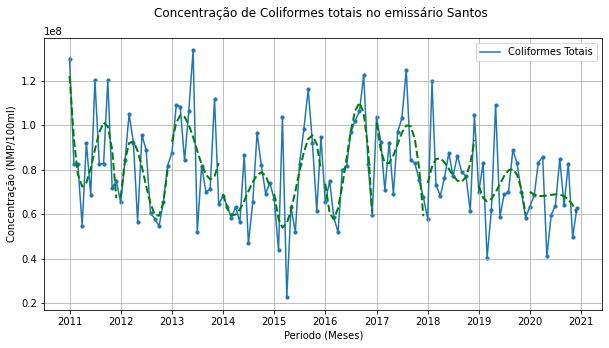

In [32]:
# Plot with linear regression for each year (Coliformes totais) - Seperate regressions

plt.figure(figsize = (10,5))
plt.plot(ct_ecoli_interpolate.index, ct_ecoli_interpolate.xs('Coliformes_Totais',level = 'Parâmetro', axis = 1)['Santos'], label = 'Coliformes Totais')
plt.scatter(ct_ecoli_interpolate.index, ct_ecoli_interpolate.xs('Coliformes_Totais',level = 'Parâmetro', axis = 1)['Santos'], s = 10 )
plt.plot( ct_ecoli_interpolate.iloc[0:12].index, regressao_cub_frac_ct()[0](months), 'green', linestyle = '--', linewidth = 2) #, label = 'Regressão linear - 2011')
plt.plot( ct_ecoli_interpolate.iloc[12:24].index, regressao_cub_frac_ct()[1](months), 'green', linestyle = '--', linewidth = 2)#, label = 'Regressão linear - 2012')
plt.plot( ct_ecoli_interpolate.iloc[24:36].index, regressao_cub_frac_ct()[2](months), 'green', linestyle = '--', linewidth = 2)#, label = 'Regressão linear - 2013')
plt.plot( ct_ecoli_interpolate.iloc[36:48].index, regressao_cub_frac_ct()[3](months), 'green', linestyle = '--', linewidth = 2)#, label = 'Regressão linear - 2014')
plt.plot( ct_ecoli_interpolate.iloc[48:60].index, regressao_cub_frac_ct()[4](months), 'green', linestyle = '--', linewidth = 2)#, label = 'Regressão linear - 2015')
plt.plot( ct_ecoli_interpolate.iloc[60:72].index, regressao_cub_frac_ct()[5](months), 'green', linestyle = '--', linewidth = 2)#, label = 'Regressão linear - 2016')
plt.plot( ct_ecoli_interpolate.iloc[72:84].index, regressao_cub_frac_ct()[6](months), 'green', linestyle = '--', linewidth = 2)#, label = 'Regressão linear - 2017')
plt.plot( ct_ecoli_interpolate.iloc[84:96].index, regressao_cub_frac_ct()[7](months), 'green', linestyle = '--', linewidth = 2)#, label = 'Regressão linear - 2018')
plt.plot( ct_ecoli_interpolate.iloc[96:108].index, regressao_cub_frac_ct()[8](months), 'green', linestyle = '--', linewidth = 2)#, label = 'Regressão linear - 2019')
plt.plot( ct_ecoli_interpolate.iloc[108:120].index, regressao_cub_frac_ct()[9](months), 'green', linestyle = '--', linewidth = 2)#, label = 'Regressão linear - 2020')
plt.xlabel('Periodo (Meses)')
plt.ylabel('Concentração (NMP/100ml)')
plt.title('Concentração de Coliformes totais no emissário Santos \n')
plt.legend(loc='best')
plt.grid()

In [33]:
# Residual analysis of regression line (e = observed values (y) - predicted values (y*))
# R and R² values
# A typical residual plot has the residual values on the Y-axis and the independent variable on the x-axis.

predicted_1 = regressao_cub_frac_ct()[0](months)
observed_1 = ct_ecoli_interpolate.xs('Coliformes_Totais',level = 'Parâmetro', axis = 1).iloc[0:12]['Santos'].to_numpy()
e_1 = observed_1 - predicted_1
predicted_2 = regressao_cub_frac_ct()[1](months)
observed_2 = ct_ecoli_interpolate.xs('Coliformes_Totais',level = 'Parâmetro', axis = 1).iloc[12:24]['Santos'].to_numpy()
e_2 = observed_2 - predicted_2
predicted_3 = regressao_cub_frac_ct()[2](months)
observed_3 = ct_ecoli_interpolate.xs('Coliformes_Totais',level = 'Parâmetro', axis = 1).iloc[24:36]['Santos'].to_numpy()
e_3 = observed_3 - predicted_3
predicted_4 = regressao_cub_frac_ct()[3](months)
observed_4 = ct_ecoli_interpolate.xs('Coliformes_Totais',level = 'Parâmetro', axis = 1).iloc[36:48]['Santos'].to_numpy()
e_4 = observed_4 - predicted_4
predicted_5 = regressao_cub_frac_ct()[4](months)
observed_5 = ct_ecoli_interpolate.xs('Coliformes_Totais',level = 'Parâmetro', axis = 1).iloc[48:60]['Santos'].to_numpy()
e_5 = observed_5 - predicted_5
predicted_6 = regressao_cub_frac_ct()[5](months)
observed_6 = ct_ecoli_interpolate.xs('Coliformes_Totais',level = 'Parâmetro', axis = 1).iloc[60:72]['Santos'].to_numpy()
e_6 = observed_6 - predicted_6
predicted_7 = regressao_cub_frac_ct()[6](months)
observed_7 = ct_ecoli_interpolate.xs('Coliformes_Totais',level = 'Parâmetro', axis = 1).iloc[72:84]['Santos'].to_numpy()
e_7 = observed_7 - predicted_7
predicted_8 = regressao_cub_frac_ct()[7](months)
observed_8 = ct_ecoli_interpolate.xs('Coliformes_Totais',level = 'Parâmetro', axis = 1).iloc[84:96]['Santos'].to_numpy()
e_8 = observed_8 - predicted_8
predicted_9 = regressao_cub_frac_ct()[8](months)
observed_9 = ct_ecoli_interpolate.xs('Coliformes_Totais',level = 'Parâmetro', axis = 1).iloc[96:108]['Santos'].to_numpy()
e_9 = observed_9 - predicted_9
predicted_10 = regressao_cub_frac_ct()[9](months)
observed_10 = ct_ecoli_interpolate.xs('Coliformes_Totais',level = 'Parâmetro', axis = 1).iloc[108:120]['Santos'].to_numpy()
e_10 = observed_10 - predicted_10



coef_corr_1 = scipy.stats.pearsonr(observed_1, predicted_1)
coef_corr_2 = scipy.stats.pearsonr(observed_2, predicted_2)
coef_corr_3 = scipy.stats.pearsonr(observed_3, predicted_3)
coef_corr_4 = scipy.stats.pearsonr(observed_4, predicted_4)
coef_corr_5 = scipy.stats.pearsonr(observed_5, predicted_5)
coef_corr_6 = scipy.stats.pearsonr(observed_6, predicted_6)
coef_corr_7 = scipy.stats.pearsonr(observed_7, predicted_7)
coef_corr_8 = scipy.stats.pearsonr(observed_8, predicted_8)
coef_corr_9 = scipy.stats.pearsonr(observed_9, predicted_9)
coef_corr_10 = scipy.stats.pearsonr(observed_10, predicted_10)

coef_spr_1 = scipy.stats.spearmanr(observed_1, predicted_1)
coef_spr_2 = scipy.stats.spearmanr(observed_2, predicted_2)
coef_spr_3 = scipy.stats.spearmanr(observed_3, predicted_3)
coef_spr_4 = scipy.stats.spearmanr(observed_4, predicted_4)
coef_spr_5 = scipy.stats.spearmanr(observed_5, predicted_5)
coef_spr_6 = scipy.stats.spearmanr(observed_6, predicted_6)
coef_spr_7 = scipy.stats.spearmanr(observed_7, predicted_7)
coef_spr_8 = scipy.stats.spearmanr(observed_8, predicted_8)
coef_spr_9 = scipy.stats.spearmanr(observed_9, predicted_9)
coef_spr_10 = scipy.stats.spearmanr(observed_10, predicted_10)


coef_corr_med = np.mean((coef_corr_1[0], coef_corr_2[0],coef_corr_3[0],coef_corr_4[0],coef_corr_5[0],coef_corr_6[0],coef_corr_7[0],coef_corr_8[0],coef_corr_9[0],coef_corr_10[0]))
coef_det_med = coef_corr_med**2
coef_spr_med = np.mean((coef_spr_1[0], coef_spr_2[0],coef_spr_3[0],coef_spr_4[0],coef_spr_5[0],coef_spr_6[0],coef_spr_7[0],coef_spr_8[0],coef_spr_9[0],coef_spr_10[0]))

# coef_det_lin = coef_corr_lin[0] **2
print(f'O coeficiente de correlação é:{coef_corr_med}' + '\n\n' +
      f'O coeficiente de correlação de Spearman é: {coef_spr_med}'+ '\n\n' +
      f'O coeficiente de determinação é: {coef_det_med}') # Retorna uma tupla com a correlação, e p-value

O coeficiente de correlação é:0.5346023868721738

O coeficiente de correlação de Spearman é: 0.4935962096350128

O coeficiente de determinação é: 0.28579971204942534


### Quartic regression (Santos)

In [34]:
# Regression analysis (quartic) - Unified for all years (Coliformes Totais)

def regressao_quart_unif_ct():

  a_quart, a1_quart, a2_quart, a3_quart, b_quart = np.polyfit(year, ct_ecoli_interpolate.xs('Coliformes_Totais',level = 'Parâmetro', axis = 1)['Santos'], 4)
  reg_quart = np.poly1d((a_quart, a1_quart, a2_quart, a3_quart, b_quart))

  return reg_quart

regressao_quart_unif_ct()

poly1d([ 1.73423784e-01, -1.90245836e+02,  2.90394097e+04, -1.35749571e+06,
        9.57448332e+07])

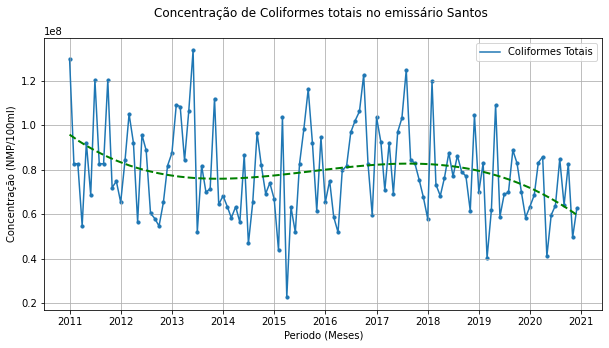

In [35]:
plt.figure(figsize = (10,5))
plt.plot(ct_ecoli_interpolate.index, ct_ecoli_interpolate.xs('Coliformes_Totais',level = 'Parâmetro', axis = 1)['Santos'], label = 'Coliformes Totais')
plt.scatter(ct_ecoli_interpolate.index, ct_ecoli_interpolate.xs('Coliformes_Totais',level = 'Parâmetro', axis = 1)['Santos'], s = 10 )
plt.plot( ct_ecoli_interpolate.index, regressao_quart_unif_ct()(year), 'green', linestyle = '--', linewidth = 2) #, label = 'Regressão linear - 2011 ~ 2020')
plt.xlabel('Periodo (Meses)')
plt.ylabel('Concentração (NMP/100ml)')
plt.title('Concentração de Coliformes totais no emissário Santos \n')
plt.legend(loc='best')
plt.grid()

O coeficiente de correlação é:0.29006401453671776

O coeficiente de correlação de Spearman é: 0.2873301976570558

O coeficiente de determinação é: 0.08413713252915721


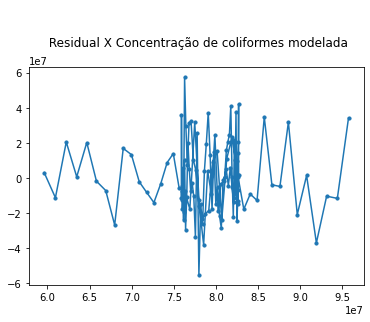

In [36]:
# Residual analysis of regression line - quadratic - (e = observed values (y) - predicted values (y*))
# R and R² values
# A typical residual plot has the residual values on the Y-axis and the independent variable on the x-axis.

predicted = regressao_quart_unif_ct()(year)
observed = ct_ecoli_interpolate.xs('Coliformes_Totais',level = 'Parâmetro', axis = 1)['Santos'].to_numpy()
e = observed - predicted

plt.plot(predicted, e)
plt.scatter(predicted, e, s= 10) # The distance from the 0 value in Y-axis is how far the predicted was from the observed
plt.title('\n\n Residual X Concentração de coliformes modelada\n')

coef_corr_lin = scipy.stats.pearsonr(observed, predicted)
coef_det_lin = coef_corr_lin[0] **2
coef_corr_spr = scipy.stats.spearmanr(observed, predicted)

print(f'O coeficiente de correlação é:{coef_corr_lin[0]}' + '\n\n' + 
      f'O coeficiente de correlação de Spearman é: {coef_corr_spr[0]}'+ '\n\n' + 
      f'O coeficiente de determinação é: {coef_det_lin}') # Retorna uma tupla com a correlação, e p-value

In [37]:
# Regression analysis (quartic) - Separate for each year (Coliformes totais)

def regressao_quart_frac_ct ():
    
    a3 = np.zeros(10)
    a2 = np.zeros(10)
    a1 = np.zeros(10)
    a = np.zeros(10)
    b = np.zeros(10)
  
    
    a3[0], a2[0],a1[0], a[0], b[0] = np.polyfit(months,ct_ecoli_interpolate.xs('Coliformes_Totais',level = 'Parâmetro', axis = 1).iloc[0:12]['Santos'], 4) # polyfit(x,y,grau da regressÃƒÂ£o - nesse caso linear (1))
    col_santos_linear1 = np.poly1d((a3[0], a2[0],a1[0], a[0], b[0]))

    a3[1],a2[1],a1[1], a[1], b[1] = np.polyfit(months,ct_ecoli_interpolate.xs('Coliformes_Totais',level = 'Parâmetro', axis = 1).iloc[12:24]['Santos'], 4) # polyfit(x,y,grau da regressÃƒÂ£o - nesse caso linear (1))
    col_santos_linear2 = np.poly1d((a3[1],a2[1],a1[1], a[1], b[1]))

    a3[2],a2[2],a1[2], a[2], b[2] = np.polyfit(months,ct_ecoli_interpolate.xs('Coliformes_Totais',level = 'Parâmetro', axis = 1).iloc[24:36]['Santos'], 4) # polyfit(x,y,grau da regressÃƒÂ£o - nesse caso linear (1))
    col_santos_linear3 = np.poly1d((a3[2],a2[2],a1[2], a[2], b[2]))
    
    a3[3],a2[3],a1[3], a[3], b[3] = np.polyfit(months,ct_ecoli_interpolate.xs('Coliformes_Totais',level = 'Parâmetro', axis = 1).iloc[36:48]['Santos'], 4) # polyfit(x,y,grau da regressÃƒÂ£o - nesse caso linear (1))
    col_santos_linear4 = np.poly1d((a3[3],a2[3],a1[3], a[3], b[3]))

    a3[4],a2[4],a1[4], a[4], b[4] = np.polyfit(months,ct_ecoli_interpolate.xs('Coliformes_Totais',level = 'Parâmetro', axis = 1).iloc[48:60]['Santos'], 4) # polyfit(x,y,grau da regressÃƒÂ£o - nesse caso linear (1))
    col_santos_linear5 = np.poly1d((a3[4],a2[4],a1[4], a[4], b[4]))

    a3[5],a2[5],a1[5], a[5], b[5] = np.polyfit(months,ct_ecoli_interpolate.xs('Coliformes_Totais',level = 'Parâmetro', axis = 1).iloc[60:72]['Santos'], 4) # polyfit(x,y,grau da regressÃƒÂ£o - nesse caso linear (1))
    col_santos_linear6 = np.poly1d((a3[5],a2[5],a1[5], a[5], b[5]))

    a3[6],a2[6],a1[6], a[6], b[6] = np.polyfit(months,ct_ecoli_interpolate.xs('Coliformes_Totais',level = 'Parâmetro', axis = 1).iloc[72:84]['Santos'], 4) # polyfit(x,y,grau da regressÃƒÂ£o - nesse caso linear (1))
    col_santos_linear7 = np.poly1d((a3[6],a2[6],a1[6], a[6], b[6]))

    a3[7],a2[7],a1[7], a[7], b[7] = np.polyfit(months,ct_ecoli_interpolate.xs('Coliformes_Totais',level = 'Parâmetro', axis = 1).iloc[84:96]['Santos'], 4) # polyfit(x,y,grau da regressÃƒÂ£o - nesse caso linear (1))
    col_santos_linear8 = np.poly1d((a3[7],a2[7],a1[7], a[7], b[7]))

    a3[8],a2[8],a1[8], a[8], b[8] = np.polyfit(months,ct_ecoli_interpolate.xs('Coliformes_Totais',level = 'Parâmetro', axis = 1).iloc[96:108]['Santos'], 4) # polyfit(x,y,grau da regressÃƒÂ£o - nesse caso linear (1))
    col_santos_linear9 = np.poly1d((a3[8],a2[8],a1[8], a[8], b[8]))

    a3[9],a2[9],a1[9], a[9], b[9] = np.polyfit(months,ct_ecoli_interpolate.xs('Coliformes_Totais',level = 'Parâmetro', axis = 1).iloc[108:120]['Santos'], 4) # polyfit(x,y,grau da regressÃƒÂ£o - nesse caso linear (1))
    col_santos_linear10 = np.poly1d((a3[9],a2[9],a1[9], a[9], b[9]))

    return col_santos_linear1, col_santos_linear2, col_santos_linear3, col_santos_linear4, col_santos_linear5, col_santos_linear6, col_santos_linear7, col_santos_linear8, col_santos_linear9, col_santos_linear10

regressao_quart_frac_ct()   

(poly1d([ 5.42675523e+04, -1.85895191e+06,  2.11960246e+07, -9.09873501e+07,
         1.99849831e+08]),
 poly1d([ 6.03620338e+03,  1.65143017e+05, -5.03178941e+06,  2.92353975e+07,
         4.38849242e+07]),
 poly1d([-5.23779866e+04,  1.54237479e+06, -1.53570631e+07,  5.53503403e+07,
         4.51090657e+07]),
 poly1d([-1.43188192e+04,  2.36983355e+05, -4.74111032e+05, -3.74717894e+06,
         7.14727841e+07]),
 poly1d([-2.61464404e+03, -2.07280273e+05,  4.77055065e+06, -2.35642116e+07,
         8.77903241e+07]),
 poly1d([-3.62928777e+04,  4.98150530e+05, -2.29590487e+05, -7.99735557e+06,
         7.73012847e+07]),
 poly1d([ 6.13406906e+04, -1.89243954e+06,  1.90501759e+07, -6.99820753e+07,
         1.60736364e+08]),
 poly1d([ 5.44935533e+03,  1.94233400e+04, -1.76573940e+06,  1.13862365e+07,
         6.49005997e+07]),
 poly1d([-6.94219843e+03,  2.13664287e+04,  1.24825412e+06, -7.64598108e+06,
         7.81884470e+07]),
 poly1d([   -54079.53634907,   1370473.63660643, -11513512.57466

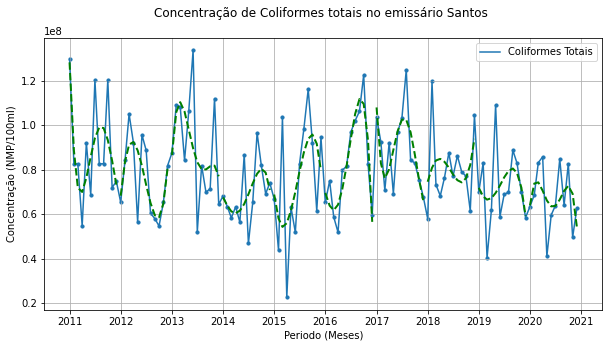

In [38]:
# Plot with linear regression for each year (Coliformes totais) - Seperate regressions

plt.figure(figsize = (10,5))
plt.plot(ct_ecoli_interpolate.index, ct_ecoli_interpolate.xs('Coliformes_Totais',level = 'Parâmetro', axis = 1)['Santos'], label = 'Coliformes Totais')
plt.scatter(ct_ecoli_interpolate.index, ct_ecoli_interpolate.xs('Coliformes_Totais',level = 'Parâmetro', axis = 1)['Santos'], s = 10 )
plt.plot( ct_ecoli_interpolate.iloc[0:12].index, regressao_quart_frac_ct()[0](months), 'green', linestyle = '--', linewidth = 2) #, label = 'Regressão linear - 2011')
plt.plot( ct_ecoli_interpolate.iloc[12:24].index, regressao_quart_frac_ct()[1](months), 'green', linestyle = '--', linewidth = 2)#, label = 'Regressão linear - 2012')
plt.plot( ct_ecoli_interpolate.iloc[24:36].index, regressao_quart_frac_ct()[2](months), 'green', linestyle = '--', linewidth = 2)#, label = 'Regressão linear - 2013')
plt.plot( ct_ecoli_interpolate.iloc[36:48].index, regressao_quart_frac_ct()[3](months), 'green', linestyle = '--', linewidth = 2)#, label = 'Regressão linear - 2014')
plt.plot( ct_ecoli_interpolate.iloc[48:60].index, regressao_quart_frac_ct()[4](months), 'green', linestyle = '--', linewidth = 2)#, label = 'Regressão linear - 2015')
plt.plot( ct_ecoli_interpolate.iloc[60:72].index, regressao_quart_frac_ct()[5](months), 'green', linestyle = '--', linewidth = 2)#, label = 'Regressão linear - 2016')
plt.plot( ct_ecoli_interpolate.iloc[72:84].index, regressao_quart_frac_ct()[6](months), 'green', linestyle = '--', linewidth = 2)#, label = 'Regressão linear - 2017')
plt.plot( ct_ecoli_interpolate.iloc[84:96].index, regressao_quart_frac_ct()[7](months), 'green', linestyle = '--', linewidth = 2)#, label = 'Regressão linear - 2018')
plt.plot( ct_ecoli_interpolate.iloc[96:108].index, regressao_quart_frac_ct()[8](months), 'green', linestyle = '--', linewidth = 2)#, label = 'Regressão linear - 2019')
plt.plot( ct_ecoli_interpolate.iloc[108:120].index, regressao_quart_frac_ct()[9](months), 'green', linestyle = '--', linewidth = 2)#, label = 'Regressão linear - 2020')
plt.xlabel('Periodo (Meses)')
plt.ylabel('Concentração (NMP/100ml)')
plt.title('Concentração de Coliformes totais no emissário Santos \n')
plt.legend(loc='best')
plt.grid()

In [39]:
# Residual analysis of regression line (e = observed values (y) - predicted values (y*))
# R and R² values
# A typical residual plot has the residual values on the Y-axis and the independent variable on the x-axis.

predicted_1 = regressao_quart_frac_ct()[0](months)
observed_1 = ct_ecoli_interpolate.xs('Coliformes_Totais',level = 'Parâmetro', axis = 1).iloc[0:12]['Santos'].to_numpy()
e_1 = observed_1 - predicted_1
predicted_2 = regressao_quart_frac_ct()[1](months)
observed_2 = ct_ecoli_interpolate.xs('Coliformes_Totais',level = 'Parâmetro', axis = 1).iloc[12:24]['Santos'].to_numpy()
e_2 = observed_2 - predicted_2
predicted_3 = regressao_quart_frac_ct()[2](months)
observed_3 = ct_ecoli_interpolate.xs('Coliformes_Totais',level = 'Parâmetro', axis = 1).iloc[24:36]['Santos'].to_numpy()
e_3 = observed_3 - predicted_3
predicted_4 = regressao_quart_frac_ct()[3](months)
observed_4 = ct_ecoli_interpolate.xs('Coliformes_Totais',level = 'Parâmetro', axis = 1).iloc[36:48]['Santos'].to_numpy()
e_4 = observed_4 - predicted_4
predicted_5 = regressao_quart_frac_ct()[4](months)
observed_5 = ct_ecoli_interpolate.xs('Coliformes_Totais',level = 'Parâmetro', axis = 1).iloc[48:60]['Santos'].to_numpy()
e_5 = observed_5 - predicted_5
predicted_6 = regressao_quart_frac_ct()[5](months)
observed_6 = ct_ecoli_interpolate.xs('Coliformes_Totais',level = 'Parâmetro', axis = 1).iloc[60:72]['Santos'].to_numpy()
e_6 = observed_6 - predicted_6
predicted_7 = regressao_quart_frac_ct()[6](months)
observed_7 = ct_ecoli_interpolate.xs('Coliformes_Totais',level = 'Parâmetro', axis = 1).iloc[72:84]['Santos'].to_numpy()
e_7 = observed_7 - predicted_7
predicted_8 = regressao_quart_frac_ct()[7](months)
observed_8 = ct_ecoli_interpolate.xs('Coliformes_Totais',level = 'Parâmetro', axis = 1).iloc[84:96]['Santos'].to_numpy()
e_8 = observed_8 - predicted_8
predicted_9 = regressao_quart_frac_ct()[8](months)
observed_9 = ct_ecoli_interpolate.xs('Coliformes_Totais',level = 'Parâmetro', axis = 1).iloc[96:108]['Santos'].to_numpy()
e_9 = observed_9 - predicted_9
predicted_10 = regressao_quart_frac_ct()[9](months)
observed_10 = ct_ecoli_interpolate.xs('Coliformes_Totais',level = 'Parâmetro', axis = 1).iloc[108:120]['Santos'].to_numpy()
e_10 = observed_10 - predicted_10



coef_corr_1 = scipy.stats.pearsonr(observed_1, predicted_1)
coef_corr_2 = scipy.stats.pearsonr(observed_2, predicted_2)
coef_corr_3 = scipy.stats.pearsonr(observed_3, predicted_3)
coef_corr_4 = scipy.stats.pearsonr(observed_4, predicted_4)
coef_corr_5 = scipy.stats.pearsonr(observed_5, predicted_5)
coef_corr_6 = scipy.stats.pearsonr(observed_6, predicted_6)
coef_corr_7 = scipy.stats.pearsonr(observed_7, predicted_7)
coef_corr_8 = scipy.stats.pearsonr(observed_8, predicted_8)
coef_corr_9 = scipy.stats.pearsonr(observed_9, predicted_9)
coef_corr_10 = scipy.stats.pearsonr(observed_10, predicted_10)

coef_spr_1 = scipy.stats.spearmanr(observed_1, predicted_1)
coef_spr_2 = scipy.stats.spearmanr(observed_2, predicted_2)
coef_spr_3 = scipy.stats.spearmanr(observed_3, predicted_3)
coef_spr_4 = scipy.stats.spearmanr(observed_4, predicted_4)
coef_spr_5 = scipy.stats.spearmanr(observed_5, predicted_5)
coef_spr_6 = scipy.stats.spearmanr(observed_6, predicted_6)
coef_spr_7 = scipy.stats.spearmanr(observed_7, predicted_7)
coef_spr_8 = scipy.stats.spearmanr(observed_8, predicted_8)
coef_spr_9 = scipy.stats.spearmanr(observed_9, predicted_9)
coef_spr_10 = scipy.stats.spearmanr(observed_10, predicted_10)


coef_corr_med = np.mean((coef_corr_1[0], coef_corr_2[0],coef_corr_3[0],coef_corr_4[0],coef_corr_5[0],coef_corr_6[0],coef_corr_7[0],coef_corr_8[0],coef_corr_9[0],coef_corr_10[0]))
coef_det_med = coef_corr_med**2
coef_spr_med = np.mean((coef_spr_1[0], coef_spr_2[0],coef_spr_3[0],coef_spr_4[0],coef_spr_5[0],coef_spr_6[0],coef_spr_7[0],coef_spr_8[0],coef_spr_9[0],coef_spr_10[0]))

# coef_det_lin = coef_corr_lin[0] **2
print(f'O coeficiente de correlação é:{coef_corr_med}' + '\n\n' + 
      f'O coeficiente de correlação de Spearman é: {coef_spr_med}'+ '\n\n' +
      f'O coeficiente de determinação é: {coef_det_med}') # Retorna uma tupla com a correlação, e p-value

O coeficiente de correlação é:0.5737132848178118

O coeficiente de correlação de Spearman é: 0.5625031876286151

O coeficiente de determinação é: 0.32914693317644367


### Considering other variables such as:
  - Temperature air
  - Temperature water 
  - Depth average velocity (Module; x,y directions) 
  - Wind velocity
  - Discharge rate
  - Radiation


#### Wind

In [40]:
# Import extra data (Temperature, Wind and Discharge) result = float(my_str.replace(',', ''))

wind_df = pd.read_excel('https://github.com/CostaNathan/doctorate/blob/da85a2e914d7ab8c5e18b6a5398051ae832323bd/data/vento_modificado%20(1).xlsx?raw=true')
wind_df = wind_df.iloc[:, 3:8]
wind_df = wind_df.set_axis(['Day','Hour','Minutes','Seconds','Wind speed'], axis = 1,inplace=False)

timestamp = pd.date_range(start='1/1/2019', end='1/1/2020', freq = 'H')
wind_df['Date Time'] = timestamp
wind_df = wind_df.set_index('Date Time')
wind_df

,Day,Hour,Minutes,Seconds,Wind speed
Date Time,,,,,
2019-01-01 00:00:00,0,0,0,0,2.0
2019-01-01 01:00:00,0,1,0,0,1.1
2019-01-01 02:00:00,0,2,0,0,0.7
2019-01-01 03:00:00,0,3,0,0,0.5
2019-01-01 04:00:00,0,4,0,0,0.7
...,...,...,...,...,...
2019-12-31 20:00:00,364,20,0,0,2.6
2019-12-31 21:00:00,364,21,0,0,2.6
2019-12-31 22:00:00,364,22,0,0,2.6


#### Air Temperature/ RH/ Radiation

In [41]:
header_temp = ['Time minutes', 'Relative humidity %', 'Air temperature (ºC)', 'Net radiation (J/m2/s)']
temperature_df = pd.read_csv('https://github.com/CostaNathan/doctorate/blob/da85a2e914d7ab8c5e18b6a5398051ae832323bd/data/temperatura_base_2019.csv?raw=true', header = None, sep = ' ')

temperature_df = temperature_df.drop([1, 3, 5], axis = 1)
temperature_df = temperature_df.set_axis(header_temp, axis = 1, inplace=False)

timestamp = pd.date_range(start='2019/01/01', end='2020/01/01', freq = '6H')
temperature_df['Date Time'] = timestamp
temperature_df = temperature_df.set_index('Date Time')

temperature_df

,Time minutes,Relative humidity %,Air temperature (ºC),Net radiation (J/m2/s)
Date Time,,,,
2019-01-01 00:00:00,0,82.94729,24.65000,-40.89990
2019-01-01 06:00:00,360,80.94626,25.12000,130.00000
2019-01-01 12:00:00,720,88.24274,25.06998,883.40010
2019-01-01 18:00:00,1080,89.11889,25.18000,185.40010
2019-01-02 00:00:00,1440,90.48352,24.86002,-63.19995
...,...,...,...,...
2019-12-31 00:00:00,524160,87.59782,23.79001,-34.50000
2019-12-31 06:00:00,524520,83.55170,24.42002,148.70000
2019-12-31 12:00:00,524880,88.22952,24.15000,889.60010


#### Discharge

In [42]:
multi_header = pd.MultiIndex.from_product([['EPC VILA ZILDA','EPC SANTOS','EPC CAIÇARA - PG3', 'EMISSÁRIO FORTE - PG1', 'EMISSÁRIO TUPI - PG2' ],
                                     ['Vazão (L/s)','Vazao maxima','Vazao minima']],
                                    names=['Emissários','Discharge'])

discharge = pd.read_excel('https://github.com/CostaNathan/doctorate/blob/ec4bb1aade50e3e703db3ef3f4c5406474f637fa/data/vazoes_corrigidas.xlsx?raw=true',skiprows = 2,header = None)
discharge = discharge.iloc[:,1:].to_numpy()
discharge_df = pd.DataFrame(discharge,columns = multi_header)

date_time = pd.date_range(start='2011/01/01', end='2020/12/01', freq = 'MS')
discharge_df['Date Time'] = date_time
discharge_df = discharge_df.set_index('Date Time')
discharge_df = discharge_df.replace(to_replace = {'-':np.nan})

discharge_df


Emissários EPC VILA ZILDA                             EPC SANTOS               \
Discharge     Vazão (L/s) Vazao maxima Vazao minima  Vazão (L/s) Vazao maxima   
Date Time                                                                       
2011-01-01         512.46          NaN          NaN  2795.870000          NaN   
2011-02-01         388.86          NaN          NaN  2524.960000          NaN   
2011-03-01         493.31          NaN          NaN  2882.520000          NaN   
2011-04-01         566.63          NaN          NaN  2674.236389          NaN   
2011-05-01         452.33          NaN          NaN  2412.454898          NaN   
...                   ...          ...          ...          ...          ...   
2020-08-01         260.89        628.1         82.6  1946.160000       3990.0   
2020-09-01         163.79        670.0         44.0  1876.540000       3630.0   
2020-10-01         302.52        564.0         79.0  1952.060000       4500.0   
2020-11-01         230.03        620.0         36.0  2133.340000       4250.0   
2020-12-01         423.68        831.0         81.0  2096.270000       4050.0   

Emissários              EPC CAIÇARA - PG3                            \
Discharge  Vazao minima       Vazão (L/s) Vazao maxima Vazao minima   
Date Time                                                             
2011-01-01          NaN         33.098865          NaN          NaN   
2011-02-01          NaN         21.457920          NaN          NaN   
2011-03-01          NaN         30.992384          NaN          NaN   
2011-04-01          NaN         31.345293          NaN          NaN   
2011-05-01          NaN         21.931004          NaN          NaN   
...                 ...               ...          ...          ...   
2020-08-01        500.0        116.359767       1040.0         16.0   
2020-09-01        460.0        117.430000       1025.0         73.0   
2020-10-01        580.0        118.940000        907.0         69.0   
2020-11-01        690.0        222.610000       1198.0         61.0   
2020-12-01        600.0        263.920000        539.0         27.0   

Emissários EMISSÁRIO FORTE - PG1                            \
Discharge            Vazão (L/s) Vazao maxima Vazao minima   
Date Time                                                    
2011-01-01            687.990000          NaN          NaN   
2011-02-01            380.000000          NaN          NaN   
2011-03-01            447.810000          NaN          NaN   
2011-04-01            414.110000          NaN          NaN   
2011-05-01            321.000000          NaN          NaN   
...                          ...          ...          ...   
2020-08-01            301.232079       790.97       200.69   
2020-09-01            316.000000       850.00       177.08   
2020-10-01            356.070000       850.00       271.53   
2020-11-01            116.480000       684.72       543.06   
2020-12-01            438.330000       920.83        47.22   

Emissários EMISSÁRIO TUPI - PG2                            
Discharge           Vazão (L/s) Vazao maxima Vazao minima  
Date Time                                                  
2011-01-01           664.770000          NaN          NaN  
2011-02-01           545.000000          NaN          NaN  
2011-03-01           448.680000          NaN          NaN  
2011-04-01           615.770000          NaN          NaN  
2011-05-01           590.000000          NaN          NaN  
...                         ...          ...          ...  
2020-08-01           402.912186       873.61       283.33  
2020-09-01           407.690000       897.22       342.36  
2020-10-01           407.100000       920.00       271.53  
2020-11-01           243.980000       885.42       566.67  
2020-12-01           438.710000       897.22       802.78  

[120 rows x 15 columns]

In [43]:
discharge_df.describe()

Emissários EPC VILA ZILDA                             EPC SANTOS               \
Discharge     Vazão (L/s) Vazao maxima Vazao minima  Vazão (L/s) Vazao maxima   
count          117.000000    84.000000    84.000000   120.000000    84.000000   
mean           376.347045   697.489286    70.280952  2178.941858  4216.428571   
std            230.277114   371.972163    86.247551   261.553326   779.911399   
min             46.030000   191.000000     3.000000  1258.150000  2370.000000   
25%            111.930000   295.250000    12.000000  2000.537500  3710.000000   
50%            433.640000   783.000000    28.500000  2163.610000  4145.000000   
75%            585.280000   997.750000    82.950000  2346.367500  4727.500000   
max            744.570000  1813.000000   309.000000  2882.520000  8100.000000   

Emissários              EPC CAIÇARA - PG3                            \
Discharge  Vazao minima       Vazão (L/s) Vazao maxima Vazao minima   
count         84.000000        113.000000    76.000000    76.000000   
mean         598.745952        142.738703   955.171053    47.093158   
std          214.007654         89.923343   245.114797    43.401193   
min            1.200000         21.457920   247.000000     0.210000   
25%          500.000000         89.882264   889.000000    19.025000   
50%          600.000000        129.560000   999.500000    44.000000   
75%          700.000000        179.344385  1082.250000    60.250000   
max         1010.000000        503.150000  1423.000000   333.000000   

Emissários EMISSÁRIO FORTE - PG1                            \
Discharge            Vazão (L/s) Vazao maxima Vazao minima   
count                 120.000000    72.000000    72.000000   
mean                  485.810390   880.229157   267.334066   
std                   142.496064   166.444653   132.888205   
min                   116.480000   413.194250     1.534722   
25%                   388.543792   785.067500   209.547425   
50%                   447.640000   905.485000   259.722100   
75%                   566.127500   956.250000   334.567500   
max                   929.090000  1534.721500   566.430000   

Emissários EMISSÁRIO TUPI - PG2                            
Discharge           Vazão (L/s) Vazao maxima Vazao minima  
count                120.000000    72.000000    72.000000  
mean                 468.719196   770.013749   252.928550  
std                  125.643324   139.768594   155.336383  
min                  192.490000   401.388700     6.020000  
25%                  383.272121   671.975000   153.826316  
50%                  451.205000   767.360000   251.520000  
75%                  525.715000   869.803235   324.652500  
max                  890.570000  1097.920000   802.780000

#### Depth average velocity (Magnitude)

In [44]:
DAV_module_santos = pd.read_csv('https://github.com/CostaNathan/doctorate/blob/9ee2a9b3a25ff0a6213b3c901fa5dbdba9bed29f/data/DAV_Santos_magcsv.csv?raw=true', sep = ',',encoding='latin1', header = 0)
DAV_module_santos = DAV_module_santos.rename(columns={'date and time': 'Date/Time', 'magnitude of depth averaged velocity (m/s)':'Magnitude of depth averaged velocity Santos (m/s)'})
DAV_module_santos['Date/Time'] = pd.to_datetime(DAV_module_santos['Date/Time'])
DAV_module_santos = DAV_module_santos.set_index(DAV_module_santos['Date/Time'])
DAV_module_santos = DAV_module_santos.drop('Date/Time', axis = 1)
DAV_module_santos

,Magnitude of depth averaged velocity Santos (m/s)
Date/Time,
2019-01-01 00:00:00,0.000000
2019-01-01 01:00:00,0.160551
2019-01-01 02:00:00,0.117095
2019-01-01 03:00:00,0.112192
2019-01-01 04:00:00,0.048662
...,...
2019-12-31 19:00:00,0.190827
2019-12-31 20:00:00,0.206557
2019-12-31 21:00:00,0.217065


In [45]:
DAV_module_guaruja = pd.read_csv('https://github.com/CostaNathan/doctorate/blob/9ee2a9b3a25ff0a6213b3c901fa5dbdba9bed29f/data/DAV_Guaruja_magcsv.csv?raw=true', sep = ',',encoding='latin1', header = 0)
DAV_module_guaruja = DAV_module_guaruja.rename(columns={'date and time': 'Date/Time', 'magnitude of depth averaged velocity (m/s)':'Magnitude of depth averaged velocity Guaruja (m/s)'})
DAV_module_guaruja['Date/Time'] = pd.to_datetime(DAV_module_guaruja['Date/Time'])
DAV_module_guaruja = DAV_module_guaruja.set_index(DAV_module_guaruja['Date/Time'])
DAV_module_guaruja = DAV_module_guaruja.drop('Date/Time', axis = 1)
DAV_module_guaruja

,Magnitude of depth averaged velocity Guaruja (m/s)
Date/Time,
2019-01-01 00:00:00,0.000000
2019-01-01 01:00:00,0.011839
2019-01-01 02:00:00,0.048022
2019-01-01 03:00:00,0.113007
2019-01-01 04:00:00,0.050121
...,...
2019-12-31 19:00:00,0.190827
2019-12-31 20:00:00,0.206557
2019-12-31 21:00:00,0.217065


In [46]:
DAV_module_pg1 = pd.read_csv('https://github.com/CostaNathan/doctorate/blob/9ee2a9b3a25ff0a6213b3c901fa5dbdba9bed29f/data/DAV_PG1_magcsv.csv?raw=true', sep = ',',encoding='latin1', header = 0)
DAV_module_pg1 = DAV_module_pg1.rename(columns={'date and time': 'Date/Time', 'magnitude of depth averaged velocity (m/s)':'Magnitude of depth averaged velocity PG1 (m/s)'})
DAV_module_pg1['Date/Time'] = pd.to_datetime(DAV_module_pg1['Date/Time'])
DAV_module_pg1 = DAV_module_pg1.set_index(DAV_module_pg1['Date/Time'])
DAV_module_pg1 = DAV_module_pg1.drop('Date/Time', axis = 1)
DAV_module_pg1

,Magnitude of depth averaged velocity PG1 (m/s)
Date/Time,
2019-01-01 00:00:00,0.000000
2019-01-01 01:00:00,0.151229
2019-01-01 02:00:00,0.094604
2019-01-01 03:00:00,0.093574
2019-01-01 04:00:00,0.041306
...,...
2019-12-31 19:00:00,0.185986
2019-12-31 20:00:00,0.202380
2019-12-31 21:00:00,0.213974


In [47]:
DAV_module_pg2 = pd.read_csv('https://github.com/CostaNathan/doctorate/blob/9ee2a9b3a25ff0a6213b3c901fa5dbdba9bed29f/data/DAV_PG2_magcsv.csv?raw=true', sep = ',',encoding='latin1', header = 0)
DAV_module_pg2 = DAV_module_pg2.rename(columns={'date and time': 'Date/Time', 'magnitude of depth averaged velocity (m/s)':'Magnitude of depth averaged velocity PG2 (m/s)'})
DAV_module_pg2['Date/Time'] = pd.to_datetime(DAV_module_pg2['Date/Time'])
DAV_module_pg2 = DAV_module_pg2.set_index(DAV_module_pg2['Date/Time'])
DAV_module_pg2 = DAV_module_pg2.drop('Date/Time', axis = 1)
DAV_module_pg2

,Magnitude of depth averaged velocity PG2 (m/s)
Date/Time,
2019-01-01 00:00:00,0.000000
2019-01-01 01:00:00,0.094588
2019-01-01 02:00:00,0.105635
2019-01-01 03:00:00,0.081247
2019-01-01 04:00:00,0.056951
...,...
2019-12-31 19:00:00,0.180369
2019-12-31 20:00:00,0.197169
2019-12-31 21:00:00,0.209139


In [48]:
DAV_module_pg3 = pd.read_csv('https://github.com/CostaNathan/doctorate/blob/8ed84d448dce142a16773efd12d3f8f375e9124a/data/DAV_PG3_magcsv.csv?raw=true', sep = ',',encoding='latin1', header = 0)
DAV_module_pg3 = DAV_module_pg3.rename(columns={'date and time': 'Date/Time', 'magnitude of depth averaged velocity (m/s)':'Magnitude of depth averaged velocity PG3 (m/s)'})
DAV_module_pg3['Date/Time'] = pd.to_datetime(DAV_module_pg3['Date/Time'])
DAV_module_pg3 = DAV_module_pg3.set_index(DAV_module_pg3['Date/Time'])
DAV_module_pg3 = DAV_module_pg3.drop('Date/Time', axis = 1)
DAV_module_pg3

,Magnitude of depth averaged velocity PG3 (m/s)
Date/Time,
2019-01-01 00:00:00,0.000000
2019-01-01 01:00:00,0.024151
2019-01-01 02:00:00,0.098688
2019-01-01 03:00:00,0.077503
2019-01-01 04:00:00,0.075098
...,...
2019-12-31 19:00:00,0.117469
2019-12-31 20:00:00,0.143213
2019-12-31 21:00:00,0.162255


In [49]:
DAV_magnitude_all = DAV_module_santos
DAV_magnitude_all = DAV_magnitude_all.join([DAV_module_guaruja,DAV_module_pg1,DAV_module_pg2,DAV_module_pg3 ])
DAV_magnitude_all

,Magnitude of depth averaged velocity Santos (m/s),Magnitude of depth averaged velocity Guaruja (m/s),Magnitude of depth averaged velocity PG1 (m/s),Magnitude of depth averaged velocity PG2 (m/s),Magnitude of depth averaged velocity PG3 (m/s)
Date/Time,,,,,
2019-01-01 00:00:00,0.000000,0.000000,0.000000,0.000000,0.000000
2019-01-01 01:00:00,0.160551,0.011839,0.151229,0.094588,0.024151
2019-01-01 02:00:00,0.117095,0.048022,0.094604,0.105635,0.098688
2019-01-01 03:00:00,0.112192,0.113007,0.093574,0.081247,0.077503
2019-01-01 04:00:00,0.048662,0.050121,0.041306,0.056951,0.075098
...,...,...,...,...,...
2019-12-31 19:00:00,0.190827,0.190827,0.185986,0.180369,0.117469
2019-12-31 20:00:00,0.206557,0.206557,0.202380,0.197169,0.143213
2019-12-31 21:00:00,0.217065,0.217065,0.213974,0.209139,0.162255


In [50]:
DAV_magnitude_all.describe()

,Magnitude of depth averaged velocity Santos (m/s),Magnitude of depth averaged velocity Guaruja (m/s),Magnitude of depth averaged velocity PG1 (m/s),Magnitude of depth averaged velocity PG2 (m/s),Magnitude of depth averaged velocity PG3 (m/s)
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,0.099519,0.072816,0.077067,0.077879,0.058706
std,0.052295,0.057157,0.059359,0.054784,0.038994
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.054465,0.026754,0.026277,0.032243,0.030325
50%,0.097695,0.054370,0.051862,0.054426,0.048084
75%,0.139342,0.110957,0.129261,0.124602,0.078120
max,0.260210,0.274510,0.258915,0.255267,0.215369


#### Depth average velocity (X,Y components)

In [51]:
DAV_x_santos = pd.read_csv('https://github.com/CostaNathan/doctorate/blob/8ed84d448dce142a16773efd12d3f8f375e9124a/data/DAV_xcomp_Santos.csv?raw=true', sep = ',', encoding='latin1', header = 0)
DAV_x_santos = DAV_x_santos.rename(columns={'date and time': 'Date/Time', 'x component of depth averaged velocity (m/s)':'x component of depth averaged velocity Santos (m/s)'})
DAV_x_santos['Date/Time'] = pd.to_datetime(DAV_x_santos['Date/Time'])
DAV_x_santos = DAV_x_santos.set_index(DAV_x_santos['Date/Time'])
DAV_x_santos = DAV_x_santos.drop('Date/Time', axis = 1)

DAV_y_santos = pd.read_csv('https://github.com/CostaNathan/doctorate/blob/8ed84d448dce142a16773efd12d3f8f375e9124a/data/DAV_ycomp_Santos.csv?raw=true', sep = ',', encoding='latin1', header = 0)
DAV_y_santos = DAV_y_santos.rename(columns={'date and time': 'Date/Time', 'y component of depth averaged velocity (m/s)':'y component of depth averaged velocity Santos (m/s)'})
DAV_y_santos['Date/Time'] = pd.to_datetime(DAV_y_santos['Date/Time'])
DAV_y_santos = DAV_y_santos.set_index(DAV_y_santos['Date/Time'])
DAV_y_santos = DAV_y_santos.drop('Date/Time', axis = 1)


DAV_xy_santos = pd.concat([DAV_x_santos,DAV_y_santos], axis = 1 )
DAV_xy_santos

,x component of depth averaged velocity Santos (m/s),y component of depth averaged velocity Santos (m/s)
Date/Time,,
2019-01-01 00:00:00,0.000000,0.000000
2019-01-01 01:00:00,0.016889,0.159660
2019-01-01 02:00:00,0.013429,0.116323
2019-01-01 03:00:00,0.002937,-0.112154
2019-01-01 04:00:00,0.018572,0.044978
...,...,...
2019-12-31 19:00:00,-0.189027,-0.026143
2019-12-31 20:00:00,-0.204610,-0.028298
2019-12-31 21:00:00,-0.215018,-0.029738


In [52]:
DAV_x_guaruja = pd.read_csv('https://github.com/CostaNathan/doctorate/blob/3b5c4e5267b8ce423e5aaba871517fd833101eaa/data/DAV_xcomp_Guaruja.csv?raw=true', sep = ',', encoding='latin1', header = 0)
DAV_x_guaruja = DAV_x_guaruja.rename(columns={'date and time': 'Date/Time', 'x component of depth averaged velocity (m/s)':'x component of depth averaged velocity Guaruja (m/s)'})
DAV_x_guaruja['Date/Time'] = pd.to_datetime(DAV_x_guaruja['Date/Time'])
DAV_x_guaruja = DAV_x_guaruja.set_index(DAV_x_guaruja['Date/Time'])
DAV_x_guaruja = DAV_x_guaruja.drop('Date/Time', axis = 1)

DAV_y_guaruja = pd.read_csv('https://github.com/CostaNathan/doctorate/blob/3b5c4e5267b8ce423e5aaba871517fd833101eaa/data/DAV_ycomp_Guaruja.csv?raw=true', sep = ',', encoding='latin1', header = 0)
DAV_y_guaruja = DAV_y_guaruja.rename(columns={'date and time': 'Date/Time', 'y component of depth averaged velocity (m/s)':'y component of depth averaged velocity Guaruja (m/s)'})
DAV_y_guaruja['Date/Time'] = pd.to_datetime(DAV_y_guaruja['Date/Time'])
DAV_y_guaruja = DAV_y_guaruja.set_index(DAV_y_guaruja['Date/Time'])
DAV_y_guaruja = DAV_y_guaruja.drop('Date/Time', axis = 1)


DAV_xy_guaruja = pd.concat([DAV_x_guaruja,DAV_y_guaruja], axis = 1 )
DAV_xy_guaruja

,x component of depth averaged velocity Guaruja (m/s),y component of depth averaged velocity Guaruja (m/s)
Date/Time,,
2019-01-01 00:00:00,0.000000,0.000000
2019-01-01 01:00:00,0.002244,-0.011624
2019-01-01 02:00:00,-0.015496,0.045453
2019-01-01 03:00:00,0.106444,0.037950
2019-01-01 04:00:00,-0.035181,0.035699
...,...,...
2019-12-31 19:00:00,-0.174915,-0.076286
2019-12-31 20:00:00,-0.189334,-0.082575
2019-12-31 21:00:00,-0.198965,-0.086775


In [53]:
DAV_x_pg1 = pd.read_csv('https://github.com/CostaNathan/doctorate/blob/3b5c4e5267b8ce423e5aaba871517fd833101eaa/data/DAV_xcomp_PG1.csv?raw=true', sep = ',', encoding='latin1', header = 0)
DAV_x_pg1 = DAV_x_pg1.rename(columns={'date and time': 'Date/Time', 'x component of depth averaged velocity (m/s)':'x component of depth averaged velocity PG1 (m/s)'})
DAV_x_pg1['Date/Time'] = pd.to_datetime(DAV_x_pg1['Date/Time'])
DAV_x_pg1 = DAV_x_pg1.set_index(DAV_x_pg1['Date/Time'])
DAV_x_pg1 = DAV_x_pg1.drop('Date/Time', axis = 1)

DAV_y_pg1 = pd.read_csv('https://github.com/CostaNathan/doctorate/blob/3b5c4e5267b8ce423e5aaba871517fd833101eaa/data/DAV_ycomp_PG1.csv?raw=true', sep = ',', encoding='latin1', header = 0)
DAV_y_pg1 = DAV_y_pg1.rename(columns={'date and time': 'Date/Time', 'y component of depth averaged velocity (m/s)':'y component of depth averaged velocity PG1 (m/s)'})
DAV_y_pg1['Date/Time'] = pd.to_datetime(DAV_y_pg1['Date/Time'])
DAV_y_pg1 = DAV_y_pg1.set_index(DAV_y_pg1['Date/Time'])
DAV_y_pg1 = DAV_y_pg1.drop('Date/Time', axis = 1)


DAV_xy_pg1 = pd.concat([DAV_x_pg1,DAV_y_pg1], axis = 1 )
DAV_xy_pg1

,x component of depth averaged velocity PG1 (m/s),y component of depth averaged velocity PG1 (m/s)
Date/Time,,
2019-01-01 00:00:00,0.000000,0.000000
2019-01-01 01:00:00,0.138797,-0.060046
2019-01-01 02:00:00,0.000098,0.094604
2019-01-01 03:00:00,0.061721,-0.070332
2019-01-01 04:00:00,-0.003995,0.041113
...,...,...
2019-12-31 19:00:00,-0.182855,-0.033982
2019-12-31 20:00:00,-0.198974,-0.036977
2019-12-31 21:00:00,-0.210372,-0.039096


In [54]:
DAV_x_pg2 = pd.read_csv('https://github.com/CostaNathan/doctorate/blob/3b5c4e5267b8ce423e5aaba871517fd833101eaa/data/DAV_xcomp_PG2.csv?raw=true', sep = ',', encoding='latin1', header = 0)
DAV_x_pg2 = DAV_x_pg2.rename(columns={'date and time': 'Date/Time', 'x component of depth averaged velocity (m/s)':'x component of depth averaged velocity PG2 (m/s)'})
DAV_x_pg2['Date/Time'] = pd.to_datetime(DAV_x_pg2['Date/Time'])
DAV_x_pg2 = DAV_x_pg2.set_index(DAV_x_pg2['Date/Time'])
DAV_x_pg2 = DAV_x_pg2.drop('Date/Time', axis = 1)

DAV_y_pg2 = pd.read_csv('https://github.com/CostaNathan/doctorate/blob/3b5c4e5267b8ce423e5aaba871517fd833101eaa/data/DAV_ycomp_PG2.csv?raw=true', sep = ',', encoding='latin1', header = 0)
DAV_y_pg2 = DAV_y_pg2.rename(columns={'date and time': 'Date/Time', 'y component of depth averaged velocity (m/s)':'y component of depth averaged velocity PG2 (m/s)'})
DAV_y_pg2['Date/Time'] = pd.to_datetime(DAV_y_pg2['Date/Time'])
DAV_y_pg2 = DAV_y_pg2.set_index(DAV_y_pg2['Date/Time'])
DAV_y_pg2 = DAV_y_pg2.drop('Date/Time', axis = 1)


DAV_xy_pg2 = pd.concat([DAV_x_pg2,DAV_y_pg2], axis = 1 )
DAV_xy_pg2

,x component of depth averaged velocity PG2 (m/s),y component of depth averaged velocity PG2 (m/s)
Date/Time,,
2019-01-01 00:00:00,0.000000,0.000000
2019-01-01 01:00:00,0.081181,-0.048545
2019-01-01 02:00:00,0.008966,0.105254
2019-01-01 03:00:00,0.051573,-0.062780
2019-01-01 04:00:00,0.003263,0.056858
...,...,...
2019-12-31 19:00:00,-0.173586,-0.048997
2019-12-31 20:00:00,-0.189755,-0.053561
2019-12-31 21:00:00,-0.201274,-0.056813


In [55]:
DAV_x_pg3 = pd.read_csv('https://github.com/CostaNathan/doctorate/blob/3b5c4e5267b8ce423e5aaba871517fd833101eaa/data/DAV_xcomp_PG3.csv?raw=true', sep = ',', encoding='latin1', header = 0)
DAV_x_pg3 = DAV_x_pg3.rename(columns={'date and time': 'Date/Time', 'x component of depth averaged velocity (m/s)':'x component of depth averaged velocity PG3 (m/s)'})
DAV_x_pg3['Date/Time'] = pd.to_datetime(DAV_x_pg3['Date/Time'])
DAV_x_pg3 = DAV_x_pg3.set_index(DAV_x_pg3['Date/Time'])
DAV_x_pg3 = DAV_x_pg3.drop('Date/Time', axis = 1)

DAV_y_pg3 = pd.read_csv('https://github.com/CostaNathan/doctorate/blob/3b5c4e5267b8ce423e5aaba871517fd833101eaa/data/DAV_ycomp_PG3.csv?raw=true', sep = ',', encoding='latin1', header = 0)
DAV_y_pg3 = DAV_y_pg3.rename(columns={'date and time': 'Date/Time', 'y component of depth averaged velocity (m/s)':'y component of depth averaged velocity PG3 (m/s)'})
DAV_y_pg3['Date/Time'] = pd.to_datetime(DAV_y_pg3['Date/Time'])
DAV_y_pg3 = DAV_y_pg3.set_index(DAV_y_pg3['Date/Time'])
DAV_y_pg3 = DAV_y_pg3.drop('Date/Time', axis = 1)


DAV_xy_pg3 = pd.concat([DAV_x_pg3,DAV_y_pg3], axis = 1 )
DAV_xy_pg3

,x component of depth averaged velocity PG3 (m/s),y component of depth averaged velocity PG3 (m/s)
Date/Time,,
2019-01-01 00:00:00,0.000000,0.000000
2019-01-01 01:00:00,0.003187,-0.023940
2019-01-01 02:00:00,0.025119,0.095438
2019-01-01 03:00:00,0.003108,-0.077441
2019-01-01 04:00:00,0.044045,0.060826
...,...,...
2019-12-31 19:00:00,-0.104411,-0.053828
2019-12-31 20:00:00,-0.127292,-0.065625
2019-12-31 21:00:00,-0.144218,-0.074350


In [56]:
DAV_xy_all = pd.concat([DAV_xy_santos, DAV_xy_guaruja, DAV_xy_pg1, DAV_xy_pg2, DAV_xy_pg3], axis = 1)
DAV_xy_all

,x component of depth averaged velocity Santos (m/s),y component of depth averaged velocity Santos (m/s),x component of depth averaged velocity Guaruja (m/s),y component of depth averaged velocity Guaruja (m/s),x component of depth averaged velocity PG1 (m/s),y component of depth averaged velocity PG1 (m/s),x component of depth averaged velocity PG2 (m/s),y component of depth averaged velocity PG2 (m/s),x component of depth averaged velocity PG3 (m/s),y component of depth averaged velocity PG3 (m/s)
Date/Time,,,,,,,,,,
2019-01-01 00:00:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2019-01-01 01:00:00,0.016889,0.159660,0.002244,-0.011624,0.138797,-0.060046,0.081181,-0.048545,0.003187,-0.023940
2019-01-01 02:00:00,0.013429,0.116323,-0.015496,0.045453,0.000098,0.094604,0.008966,0.105254,0.025119,0.095438
2019-01-01 03:00:00,0.002937,-0.112154,0.106444,0.037950,0.061721,-0.070332,0.051573,-0.062780,0.003108,-0.077441
2019-01-01 04:00:00,0.018572,0.044978,-0.035181,0.035699,-0.003995,0.041113,0.003263,0.056858,0.044045,0.060826
...,...,...,...,...,...,...,...,...,...,...
2019-12-31 19:00:00,-0.189027,-0.026143,-0.174915,-0.076286,-0.182855,-0.033982,-0.173586,-0.048997,-0.104411,-0.053828
2019-12-31 20:00:00,-0.204610,-0.028298,-0.189334,-0.082575,-0.198974,-0.036977,-0.189755,-0.053561,-0.127292,-0.065625
2019-12-31 21:00:00,-0.215018,-0.029738,-0.198965,-0.086775,-0.210372,-0.039096,-0.201274,-0.056813,-0.144218,-0.074350


In [57]:
DAV_xy_all.describe()

,x component of depth averaged velocity Santos (m/s),y component of depth averaged velocity Santos (m/s),x component of depth averaged velocity Guaruja (m/s),y component of depth averaged velocity Guaruja (m/s),x component of depth averaged velocity PG1 (m/s),y component of depth averaged velocity PG1 (m/s),x component of depth averaged velocity PG2 (m/s),y component of depth averaged velocity PG2 (m/s),x component of depth averaged velocity PG3 (m/s),y component of depth averaged velocity PG3 (m/s)
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,-0.075203,-0.010558,-0.041175,-0.020088,-0.066787,-0.004678,-0.070651,-0.021294,-0.047350,-0.025045
std,0.061156,0.055967,0.073766,0.032079,0.066834,0.022668,0.057529,0.017660,0.040682,0.021040
min,-0.257757,-0.170554,-0.238513,-0.184158,-0.254557,-0.070332,-0.245668,-0.069343,-0.191427,-0.098689
25%,-0.129251,-0.025898,-0.099866,-0.045227,-0.127055,-0.023911,-0.119916,-0.034543,-0.069460,-0.037502
50%,-0.045423,-0.016882,-0.028668,-0.011211,-0.045726,-0.009782,-0.051905,-0.022464,-0.042465,-0.022631
75%,-0.025918,0.002046,0.014163,0.000223,-0.010329,0.013560,-0.025684,-0.008834,-0.022512,-0.011604
max,0.028896,0.159660,0.232971,0.166806,0.138797,0.094604,0.081181,0.105254,0.098471,0.095438


#### Water temperature

In [58]:
temp_santos = pd.read_csv('https://github.com/CostaNathan/doctorate/blob/9ee2a9b3a25ff0a6213b3c901fa5dbdba9bed29f/data/Water_temp_santoscsv.csv?raw=true', sep = ',',encoding='latin1', header = 0)
temp_santos = temp_santos.rename(columns={'date and time': 'Date/Time', 'temperature (°C) - Santos - layer 1':'Water temperature Santos (ºC)'})
temp_santos['Date/Time'] = pd.to_datetime(temp_santos['Date/Time'])
temp_santos = temp_santos.set_index(temp_santos['Date/Time'])
temp_santos = temp_santos.drop('Date/Time', axis = 1)

In [59]:
temp_guaruja = pd.read_csv('https://github.com/CostaNathan/doctorate/blob/9ee2a9b3a25ff0a6213b3c901fa5dbdba9bed29f/data/Water_temp_guaruja.csv?raw=true', sep = ',',encoding='latin1', header = 0)
temp_guaruja = temp_guaruja.rename(columns={'date and time': 'Date/Time', 'temperature (°C) - Guaruja - layer 1':'Water temperature Guaruja (ºC)'})
temp_guaruja['Date/Time'] = pd.to_datetime(temp_guaruja['Date/Time'])
temp_guaruja = temp_guaruja.set_index(temp_guaruja['Date/Time'])
temp_guaruja = temp_guaruja.drop('Date/Time', axis = 1)
temp_guaruja

,Water temperature Guaruja (ºC)
Date/Time,
2019-01-01 00:00:00,26.3300
2019-01-01 01:00:00,26.3229
2019-01-01 02:00:00,26.3184
2019-01-01 03:00:00,26.3164
2019-01-01 04:00:00,26.3158
...,...
2019-12-31 19:00:00,24.4100
2019-12-31 20:00:00,24.3500
2019-12-31 21:00:00,24.2900


In [60]:
temp_pg1 = pd.read_csv('https://github.com/CostaNathan/doctorate/blob/9ee2a9b3a25ff0a6213b3c901fa5dbdba9bed29f/data/Water_temp_PG1.csv?raw=true', sep = ',',encoding='latin1', header = 0)
temp_pg1 = temp_pg1.rename(columns={'date and time': 'Date/Time', 'temperature (°C) - PG1 - layer 1':'Water temperature PG1 (ºC)'})
temp_pg1['Date/Time'] = pd.to_datetime(temp_pg1['Date/Time'])
temp_pg1 = temp_pg1.set_index(temp_pg1['Date/Time'])
temp_pg1 = temp_pg1.drop('Date/Time', axis = 1)
temp_pg1

,Water temperature PG1 (ºC)
Date/Time,
2019-01-01 00:00:00,26.3300
2019-01-01 01:00:00,26.3219
2019-01-01 02:00:00,26.3169
2019-01-01 03:00:00,26.3144
2019-01-01 04:00:00,26.3136
...,...
2019-12-31 19:00:00,24.4100
2019-12-31 20:00:00,24.3500
2019-12-31 21:00:00,24.2900


In [61]:
temp_pg2 = pd.read_csv('https://github.com/CostaNathan/doctorate/blob/9ee2a9b3a25ff0a6213b3c901fa5dbdba9bed29f/data/Water_temp_PG2.csv?raw=true', sep = ',',encoding='latin1', header = 0)
temp_pg2 = temp_pg2.rename(columns={'date and time': 'Date/Time', 'temperature (°C) - PG2 - layer 1':'Water temperature PG2 (ºC)'})
temp_pg2['Date/Time'] = pd.to_datetime(temp_pg2['Date/Time'])
temp_pg2 = temp_pg2.set_index(temp_pg2['Date/Time'])
temp_pg2 = temp_pg2.drop('Date/Time', axis = 1)
temp_pg2

,Water temperature PG2 (ºC)
Date/Time,
2019-01-01 00:00:00,26.3300
2019-01-01 01:00:00,26.3174
2019-01-01 02:00:00,26.3093
2019-01-01 03:00:00,26.3026
2019-01-01 04:00:00,26.2996
...,...
2019-12-31 19:00:00,24.4100
2019-12-31 20:00:00,24.3500
2019-12-31 21:00:00,24.2900


In [62]:
temp_pg3 = pd.read_csv('https://github.com/CostaNathan/doctorate/blob/9ee2a9b3a25ff0a6213b3c901fa5dbdba9bed29f/data/Water_temp_PG3.csv?raw=true', sep = ',',encoding='latin1', header = 0)
temp_pg3 = temp_pg3.rename(columns={'date and time': 'Date/Time', 'temperature (°C) - PG3 - layer 1':'Water temperature PG3 (ºC)'})
temp_pg3['Date/Time'] = pd.to_datetime(temp_pg3['Date/Time'])
temp_pg3 = temp_pg3.set_index(temp_pg3['Date/Time'])
temp_pg3 = temp_pg3.drop('Date/Time', axis = 1)
temp_pg3

,Water temperature PG3 (ºC)
Date/Time,
2019-01-01 00:00:00,26.3300
2019-01-01 01:00:00,26.3209
2019-01-01 02:00:00,26.3153
2019-01-01 03:00:00,26.3125
2019-01-01 04:00:00,26.3118
...,...
2019-12-31 19:00:00,24.4100
2019-12-31 20:00:00,24.3500
2019-12-31 21:00:00,24.2900


In [63]:
water_temp_all = temp_santos
water_temp_all = water_temp_all.join([temp_guaruja, temp_pg1, temp_pg2,temp_pg3])
water_temp_all

,Water temperature Santos (ºC),Water temperature Guaruja (ºC),Water temperature PG1 (ºC),Water temperature PG2 (ºC),Water temperature PG3 (ºC)
Date/Time,,,,,
2019-01-01 00:00:00,26.3300,26.3300,26.3300,26.3300,26.3300
2019-01-01 01:00:00,26.3160,26.3229,26.3219,26.3174,26.3209
2019-01-01 02:00:00,26.3103,26.3184,26.3169,26.3093,26.3153
2019-01-01 03:00:00,26.3069,26.3164,26.3144,26.3026,26.3125
2019-01-01 04:00:00,26.2913,26.3158,26.3136,26.2996,26.3118
...,...,...,...,...,...
2019-12-31 19:00:00,24.4100,24.4100,24.4100,24.4100,24.4100
2019-12-31 20:00:00,24.3500,24.3500,24.3500,24.3500,24.3500
2019-12-31 21:00:00,24.2900,24.2900,24.2900,24.2900,24.2900


In [64]:
water_temp_all.describe()

,Water temperature Santos (ºC),Water temperature Guaruja (ºC),Water temperature PG1 (ºC),Water temperature PG2 (ºC),Water temperature PG3 (ºC)
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,25.394497,25.522796,25.369877,25.338818,25.435460
std,3.247467,3.142110,3.126286,3.076407,3.232622
min,20.420000,20.338700,20.420000,20.420000,20.420000
25%,22.386775,22.609625,22.340000,22.333300,22.276700
50%,24.530000,24.735350,24.710200,24.741950,24.735900
75%,28.198425,28.383400,28.195900,28.128925,28.309950
max,32.842500,32.122300,31.497300,31.405500,32.158900


### Correlation test

- Check correlation between concentration and wind/discharge/temperature data (Spearman test)

- Check correlation between extras variables

- Check if multiple linear regression is any better then the other regression models above
  

O coeficiente de correlação de Spearman é: 0.04395604395604395


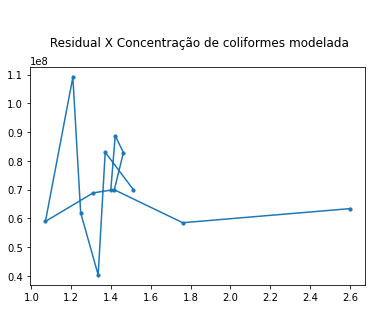

In [65]:
# Wind - Concentration


wind_day = wind_df.resample('MS').mean()

plt.plot( wind_day['Wind speed'], ct_ecoli_interpolate.xs('Coliformes_Totais',level = 'Parâmetro', axis = 1)['Santos'].iloc[96:109])
plt.scatter( wind_day['Wind speed'],ct_ecoli_interpolate.xs('Coliformes_Totais',level = 'Parâmetro', axis = 1)['Santos'].iloc[96:109], s= 10) # The distance from the 0 value in Y-axis is how far the predicted was from the observed
plt.title('\n\n Residual X Concentração de coliformes modelada\n')

coef_corr_lin = scipy.stats.pearsonr(wind_day['Wind speed'],ct_ecoli_interpolate.xs('Coliformes_Totais',level = 'Parâmetro', axis = 1)['Santos'].iloc[96:109])
coef_corr_spr = scipy.stats.spearmanr(wind_day['Wind speed'],ct_ecoli_interpolate.xs('Coliformes_Totais',level = 'Parâmetro', axis = 1)['Santos'].iloc[96:109])
coef_det_lin = coef_corr_lin[0] **2

print(f'O coeficiente de correlação de Spearman é: {coef_corr_spr[0]}')


Statistics dados velocidade do vento =0.716, p=0.001
Sample does not look Gaussian (reject H0) 



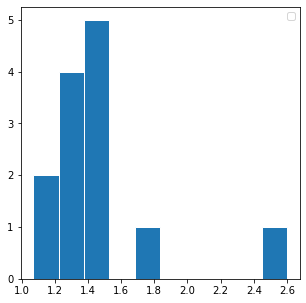

In [66]:
plt.figure(figsize=(5,5))
plt.hist(wind_day['Wind speed'], edgecolor = 'white')
plt.legend()

stat, p = shapiro(wind_day['Wind speed'])
print('Statistics dados velocidade do vento =%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
	print('Dados velocidade do vento looks Gaussian (fail to reject H0) \n')
else:
	print('Sample does not look Gaussian (reject H0) \n')

O coeficiente de correlação de Spearman é: -0.04395604395604395


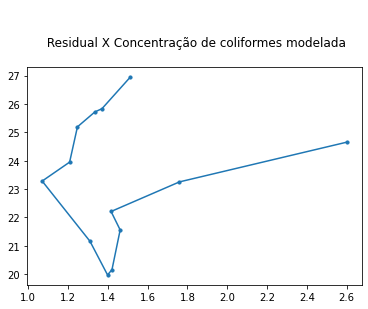

In [67]:
# Wind - Temperature

temperature_day = temperature_df.resample('MS').mean()

plt.plot( wind_day['Wind speed'],temperature_day['Air temperature (ºC)'])
plt.scatter(  wind_day['Wind speed'],temperature_day['Air temperature (ºC)'], s= 10) # The distance from the 0 value in Y-axis is how far the predicted was from the observed
plt.title('\n\n Residual X Concentração de coliformes modelada\n')

coef_corr_lin = scipy.stats.pearsonr(wind_day['Wind speed'],temperature_day['Air temperature (ºC)'])
coef_corr_spr = scipy.stats.spearmanr(wind_day['Wind speed'],temperature_day['Air temperature (ºC)'])
coef_det_lin = coef_corr_lin[0] **2

print(f'O coeficiente de correlação de Spearman é: {coef_corr_spr[0]}')


Statistics Dados temperatura do ar =0.958, p=0.725
Dados temperatura do ar looks Gaussian (fail to reject H0) 



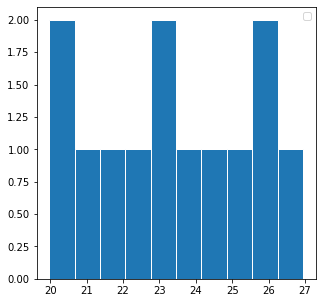

In [68]:
plt.figure(figsize=(5,5))
plt.hist(temperature_day['Air temperature (ºC)'], edgecolor = 'white')
plt.legend()

stat, p = shapiro(temperature_day['Air temperature (ºC)'])
print('Statistics Dados temperatura do ar =%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
	print('Dados temperatura do ar looks Gaussian (fail to reject H0) \n')
else:
	print('Sample does not look Gaussian (reject H0) \n')

O coeficiente de correlação de Spearman é: -0.010989010989010988


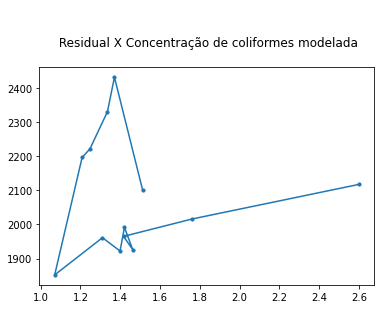

In [69]:
# Wind - Discharge

discharge_day = discharge_df.resample('MS').mean()

plt.plot( wind_day['Wind speed'],discharge_day.iloc[96:109]['EPC SANTOS', 'Vazão (L/s)'])
plt.scatter(wind_day['Wind speed'],discharge_day.iloc[96:109]['EPC SANTOS', 'Vazão (L/s)'], s= 10) # The distance from the 0 value in Y-axis is how far the predicted was from the observed
plt.title('\n\n Residual X Concentração de coliformes modelada\n')

coef_corr_lin = scipy.stats.pearsonr( wind_day['Wind speed'],discharge_day.iloc[96:109]['EPC SANTOS', 'Vazão (L/s)'])
coef_corr_spr = scipy.stats.spearmanr( wind_day['Wind speed'],discharge_day.iloc[96:109]['EPC SANTOS', 'Vazão (L/s)'])
coef_det_lin = coef_corr_lin[0] **2

print(f'O coeficiente de correlação de Spearman é: {coef_corr_spr[0]}')


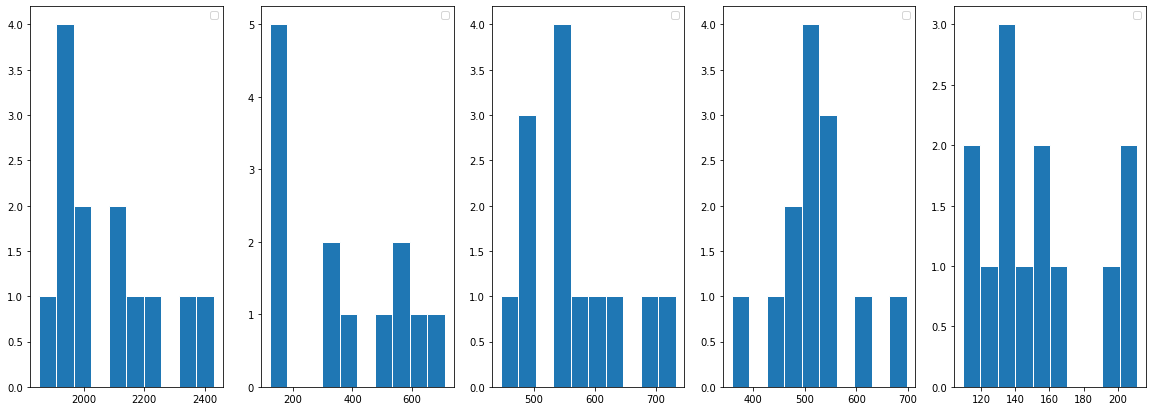

In [70]:
# Histogram of discharges during 2019

plt.figure(figsize=(20,7))


ax1 = plt.subplot2grid((1,5), (0,0))
ax2 = plt.subplot2grid((1,5), (0,1))
ax3 = plt.subplot2grid((1,5), (0,2))
ax4 = plt.subplot2grid((1,5), (0,3))
ax5 = plt.subplot2grid((1,5), (0,4))


ax1.hist(discharge_day.iloc[96:109]['EPC SANTOS', 'Vazão (L/s)'], edgecolor = 'white')
ax1.legend()

ax2.hist(discharge_day.iloc[96:109]['EPC VILA ZILDA', 'Vazão (L/s)'], edgecolor = 'white')
ax2.legend()

ax3.hist(discharge_day.iloc[96:109]['EMISSÁRIO FORTE - PG1', 'Vazão (L/s)'], edgecolor = 'white')
ax3.legend()

ax4.hist(discharge_day.iloc[96:109]['EMISSÁRIO TUPI - PG2', 'Vazão (L/s)'], edgecolor = 'white')
ax4.legend()

ax5.hist(discharge_day.iloc[96:109]['EPC CAIÇARA - PG3', 'Vazão (L/s)'], edgecolor = 'white')
ax5.legend()


In [71]:
# Shapiro wilk and null hypotesis (H0)

stat, p = shapiro(discharge_day.iloc[96:109]['EPC SANTOS', 'Vazão (L/s)'])
print('Statistics Santos - Vazão =%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
	print('Santos - Vazão looks Gaussian (fail to reject H0) \n')
else:
	print('Sample does not look Gaussian (reject H0) \n')
 
stat, p = shapiro(discharge_day.iloc[96:109]['EPC VILA ZILDA', 'Vazão (L/s)'])
print('Statistics Vila Zilda - Vazão =%.3f, p=%.3f' % (stat, p))

if p > alpha:
	print('Vila Zilda - Vazão looks Gaussian (fail to reject H0) \n')
else:
	print('Sample does not look Gaussian (reject H0) \n')
 
stat, p = shapiro(discharge_day.iloc[96:109]['EMISSÁRIO FORTE - PG1', 'Vazão (L/s)'])
print('Statistics PG1 - Vazão =%.3f, p=%.3f' % (stat, p))

if p > alpha:
	print('PG1 - Vazão looks Gaussian (fail to reject H0) \n')
else:
	print('Sample does not look Gaussian (reject H0) \n')

stat, p = shapiro(discharge_day.iloc[96:109]['EMISSÁRIO TUPI - PG2', 'Vazão (L/s)'])
print('Statistics PG2 - Vazão =%.3f, p=%.3f' % (stat, p))

if p > alpha:
	print('PG2 - Vazão looks Gaussian (fail to reject H0) \n')
else:
	print('Sample does not look Gaussian (reject H0) \n')
 
stat, p = shapiro(discharge_day.iloc[96:109]['EPC CAIÇARA - PG3', 'Vazão (L/s)'])
print('Statistics PG3 - Vazão =%.3f, p=%.3f' % (stat, p))

if p > alpha:
	print('PG3 - Vazão looks Gaussian (fail to reject H0) \n')
else:
	print('Sample does not look Gaussian (reject H0) \n')

Statistics Santos - Vazão =0.932, p=0.358
Santos - Vazão looks Gaussian (fail to reject H0) 

Statistics Vila Zilda - Vazão =0.887, p=0.088
Vila Zilda - Vazão looks Gaussian (fail to reject H0) 

Statistics PG1 - Vazão =0.944, p=0.514
PG1 - Vazão looks Gaussian (fail to reject H0) 

Statistics PG2 - Vazão =0.957, p=0.710
PG2 - Vazão looks Gaussian (fail to reject H0) 

Statistics PG3 - Vazão =0.929, p=0.331
PG3 - Vazão looks Gaussian (fail to reject H0) 



O coeficiente de correlação de Spearman é: -0.14285714285714285


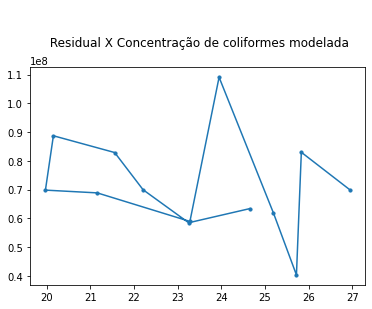

In [72]:
# Temperature - Concentration

temperature_day = temperature_df.resample('MS').mean()

plt.plot( temperature_day['Air temperature (ºC)'], ct_ecoli_interpolate.xs('Coliformes_Totais',level = 'Parâmetro', axis = 1)['Santos'].iloc[96:109])
plt.scatter(temperature_day['Air temperature (ºC)'],ct_ecoli_interpolate.xs('Coliformes_Totais',level = 'Parâmetro', axis = 1)['Santos'].iloc[96:109], s= 10) # The distance from the 0 value in Y-axis is how far the predicted was from the observed
plt.title('\n\n Residual X Concentração de coliformes modelada\n')

coef_corr_lin = scipy.stats.pearsonr(temperature_day['Air temperature (ºC)'], ct_ecoli_interpolate.xs('Coliformes_Totais',level = 'Parâmetro', axis = 1)['Santos'].iloc[96:109])
coef_corr_spr = scipy.stats.spearmanr(temperature_day['Air temperature (ºC)'], ct_ecoli_interpolate.xs('Coliformes_Totais',level = 'Parâmetro', axis = 1)['Santos'].iloc[96:109])
coef_det_lin = coef_corr_lin[0] **2

print(f'O coeficiente de correlação de Spearman é: {coef_corr_spr[0]}')


O coeficiente de correlação de Spearman é: 0.7582417582417583


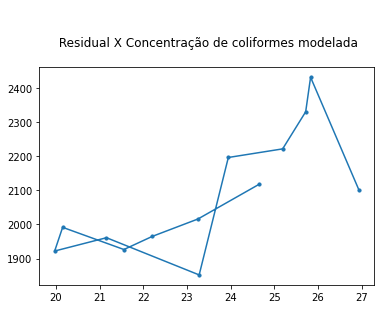

In [73]:
# Temperature - Discharge

plt.plot( temperature_day['Air temperature (ºC)'],discharge_day.iloc[96:109]['EPC SANTOS', 'Vazão (L/s)'])
plt.scatter(temperature_day['Air temperature (ºC)'],discharge_day.iloc[96:109]['EPC SANTOS', 'Vazão (L/s)'], s= 10) # The distance from the 0 value in Y-axis is how far the predicted was from the observed
plt.title('\n\n Residual X Concentração de coliformes modelada\n')

coef_corr_lin = scipy.stats.pearsonr(temperature_day['Air temperature (ºC)'], discharge_day.iloc[96:109]['EPC SANTOS', 'Vazão (L/s)'])
coef_corr_spr = scipy.stats.spearmanr(temperature_day['Air temperature (ºC)'], discharge_day.iloc[96:109]['EPC SANTOS', 'Vazão (L/s)'])
coef_det_lin = coef_corr_lin[0] **2

print(f'O coeficiente de correlação de Spearman é: {coef_corr_spr[0]}')


O coeficiente de correlação de Spearman entre as a temperatura do ar e a vazão de lançamento apresentaram forte correlação, contudo isso pode ser uma 'falso', pois a vazão de lançamento e a temperatura no ar nao deveriam interagir


O coeficiente de correlação de Spearman é: 0.03296703296703297


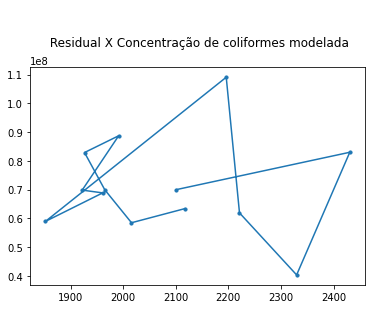

In [74]:
# Discharge - Concentration

plt.plot( discharge_day.iloc[96:109]['EPC SANTOS', 'Vazão (L/s)'], ct_ecoli_interpolate.xs('Coliformes_Totais',level = 'Parâmetro', axis = 1)['Santos'].iloc[96:109])
plt.scatter(discharge_day.iloc[96:109]['EPC SANTOS', 'Vazão (L/s)'],ct_ecoli_interpolate.xs('Coliformes_Totais',level = 'Parâmetro', axis = 1)['Santos'].iloc[96:109], s= 10) # The distance from the 0 value in Y-axis is how far the predicted was from the observed
plt.title('\n\n Residual X Concentração de coliformes modelada\n')

coef_corr_lin = scipy.stats.pearsonr(discharge_day.iloc[96:109]['EPC SANTOS', 'Vazão (L/s)'], ct_ecoli_interpolate.xs('Coliformes_Totais',level = 'Parâmetro', axis = 1)['Santos'].iloc[96:109])
coef_corr_spr = scipy.stats.spearmanr(discharge_day.iloc[96:109]['EPC SANTOS', 'Vazão (L/s)'], ct_ecoli_interpolate.xs('Coliformes_Totais',level = 'Parâmetro', axis = 1)['Santos'].iloc[96:109])
coef_det_lin = coef_corr_lin[0] **2

print(f'O coeficiente de correlação de Spearman é: {coef_corr_spr[0]}')


O coeficiente de correlação de Spearman é: 0.12637362637362637


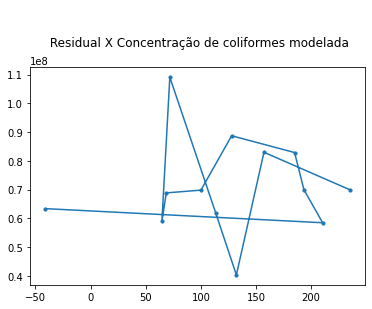

In [88]:
# Net radiation x Concentration

radiation_day = temperature_df['Net radiation (J/m2/s)'].resample('MS').mean()

plt.plot(radiation_day, ct_ecoli_interpolate.xs('Coliformes_Totais',level = 'Parâmetro', axis = 1)['Santos'].iloc[96:109])
plt.scatter(radiation_day,ct_ecoli_interpolate.xs('Coliformes_Totais',level = 'Parâmetro', axis = 1)['Santos'].iloc[96:109], s= 10) # The distance from the 0 value in Y-axis is how far the predicted was from the observed
plt.title('\n\n Residual X Concentração de coliformes modelada\n')

coef_corr_lin = scipy.stats.pearsonr(radiation_day, ct_ecoli_interpolate.xs('Coliformes_Totais',level = 'Parâmetro', axis = 1)['Santos'].iloc[96:109])
coef_corr_spr = scipy.stats.spearmanr(radiation_day, ct_ecoli_interpolate.xs('Coliformes_Totais',level = 'Parâmetro', axis = 1)['Santos'].iloc[96:109])
coef_det_lin = coef_corr_lin[0] **2

print(f'O coeficiente de correlação de Spearman é: {coef_corr_spr[0]}')

Test to check if normalizing values would change correlation

Normalized Data =  [[ 0.4536868   0.30352069  0.25523321  0.21902056  0.13876763  0.12490183
   0.13253905  0.19323699  0.24692094  0.35708082  0.37346518  0.40617615
  -0.07895222]]
Normalized Data =  [[0.26573093 0.31526224 0.1530769  0.23510036 0.41447681 0.22381691
  0.26155188 0.26520855 0.3370883  0.31491082 0.26570244 0.2220693
  0.24073258]]
O coeficiente de correlação de Spearman é: 0.12637362637362637


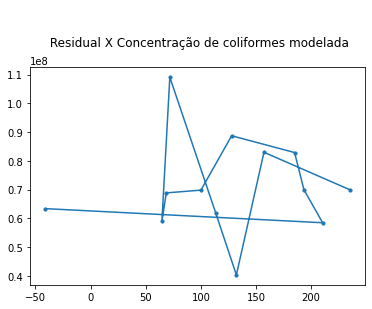

In [127]:
from sklearn import preprocessing

radiation_array = np.zeros([1,13])
for i in range (13):
  radiation_array[0, i] = radiation_day.to_numpy()[i]

ct_array = np.zeros([1,13])
for i in range(13):
  ct_array[0,i] = ct_ecoli_interpolate.xs('Coliformes_Totais',level = 'Parâmetro', axis = 1)['Santos'].iloc[96:109].to_numpy()[i]

# normalize the data attributes
normalized = preprocessing.normalize(radiation_array)
print("Normalized Data = ", normalized)

# normalize the data attributes
normalized = preprocessing.normalize(ct_array)
print("Normalized Data = ", normalized)


plt.plot(radiation_array[0], ct_array[0])
plt.scatter(radiation_array[0],ct_array[0], s= 10) # The distance from the 0 value in Y-axis is how far the predicted was from the observed
plt.title('\n\n Residual X Concentração de coliformes modelada\n')

coef_corr_lin = scipy.stats.pearsonr(radiation_array[0], ct_array[0])
coef_corr_spr = scipy.stats.spearmanr(radiation_array[0], ct_array[0])
coef_det_lin = coef_corr_lin[0] **2

print(f'O coeficiente de correlação de Spearman é: {coef_corr_spr[0]}')

O coeficiente de correlação de Spearman é: 0.04195804195804196


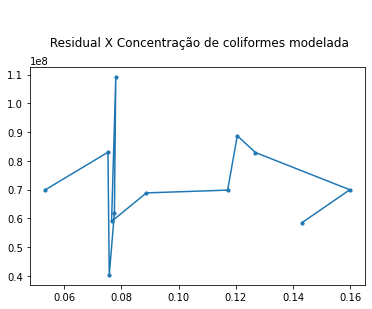

In [129]:
# Depth avarage velocity (mag) x Concentration

DAV_day_santos = DAV_magnitude_all['Magnitude of depth averaged velocity Santos (m/s)'].resample('MS').mean()

plt.plot(DAV_day_santos, ct_ecoli_interpolate.xs('Coliformes_Totais',level = 'Parâmetro', axis = 1)['Santos'].iloc[96:108])
plt.scatter(DAV_day_santos,ct_ecoli_interpolate.xs('Coliformes_Totais',level = 'Parâmetro', axis = 1)['Santos'].iloc[96:108], s= 10) # The distance from the 0 value in Y-axis is how far the predicted was from the observed
plt.title('\n\n Residual X Concentração de coliformes modelada\n')

coef_corr_lin = scipy.stats.pearsonr(DAV_day_santos, ct_ecoli_interpolate.xs('Coliformes_Totais',level = 'Parâmetro', axis = 1)['Santos'].iloc[96:108])
coef_corr_spr = scipy.stats.spearmanr(DAV_day_santos, ct_ecoli_interpolate.xs('Coliformes_Totais',level = 'Parâmetro', axis = 1)['Santos'].iloc[96:108])
coef_det_lin = coef_corr_lin[0] **2

print(f'O coeficiente de correlação de Spearman é: {coef_corr_spr[0]}')

O coeficiente de correlação de Spearman é: -0.11188811188811189


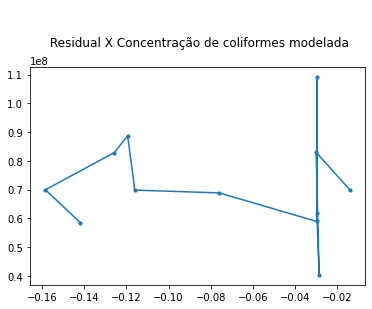

In [130]:
# Depth avarage velocity (components) x Concentration

DAV_day_santos_x = DAV_xy_all['x component of depth averaged velocity Santos (m/s)'].resample('MS').mean()
DAV_day_santos_y = DAV_xy_all['y component of depth averaged velocity Santos (m/s)'].resample('MS').mean()

plt.plot(DAV_day_santos_x, ct_ecoli_interpolate.xs('Coliformes_Totais',level = 'Parâmetro', axis = 1)['Santos'].iloc[96:108])
plt.scatter(DAV_day_santos_x,ct_ecoli_interpolate.xs('Coliformes_Totais',level = 'Parâmetro', axis = 1)['Santos'].iloc[96:108], s= 10) # The distance from the 0 value in Y-axis is how far the predicted was from the observed
plt.title('\n\n Residual X Concentração de coliformes modelada\n')

coef_corr_lin = scipy.stats.pearsonr(DAV_day_santos_x, ct_ecoli_interpolate.xs('Coliformes_Totais',level = 'Parâmetro', axis = 1)['Santos'].iloc[96:108])
coef_corr_spr = scipy.stats.spearmanr(DAV_day_santos_x, ct_ecoli_interpolate.xs('Coliformes_Totais',level = 'Parâmetro', axis = 1)['Santos'].iloc[96:108])
coef_det_lin = coef_corr_lin[0] **2

print(f'O coeficiente de correlação de Spearman é: {coef_corr_spr[0]}')

O coeficiente de correlação de Spearman é: -0.013986013986013986


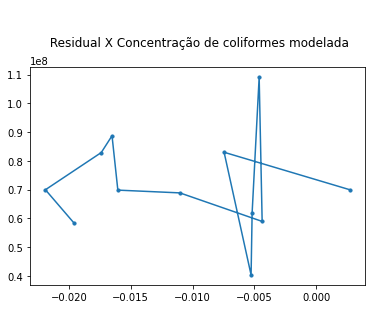

In [131]:
plt.plot(DAV_day_santos_y, ct_ecoli_interpolate.xs('Coliformes_Totais',level = 'Parâmetro', axis = 1)['Santos'].iloc[96:108])
plt.scatter(DAV_day_santos_y,ct_ecoli_interpolate.xs('Coliformes_Totais',level = 'Parâmetro', axis = 1)['Santos'].iloc[96:108], s= 10) # The distance from the 0 value in Y-axis is how far the predicted was from the observed
plt.title('\n\n Residual X Concentração de coliformes modelada\n')

coef_corr_lin = scipy.stats.pearsonr(DAV_day_santos_y, ct_ecoli_interpolate.xs('Coliformes_Totais',level = 'Parâmetro', axis = 1)['Santos'].iloc[96:108])
coef_corr_spr = scipy.stats.spearmanr(DAV_day_santos_y, ct_ecoli_interpolate.xs('Coliformes_Totais',level = 'Parâmetro', axis = 1)['Santos'].iloc[96:108])
coef_det_lin = coef_corr_lin[0] **2

print(f'O coeficiente de correlação de Spearman é: {coef_corr_spr[0]}')

O coeficiente de correlação de Spearman é: -0.055944055944055944


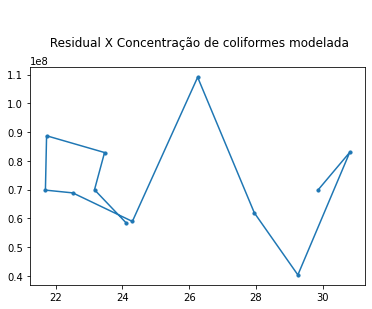

In [133]:
# Water temperature x Concentration

water_temp_day = water_temp_all['Water temperature Santos (ºC)'].resample('MS').mean()

plt.plot(water_temp_day, ct_ecoli_interpolate.xs('Coliformes_Totais',level = 'Parâmetro', axis = 1)['Santos'].iloc[96:108])
plt.scatter(water_temp_day,ct_ecoli_interpolate.xs('Coliformes_Totais',level = 'Parâmetro', axis = 1)['Santos'].iloc[96:108], s= 10) # The distance from the 0 value in Y-axis is how far the predicted was from the observed
plt.title('\n\n Residual X Concentração de coliformes modelada\n')

coef_corr_lin = scipy.stats.pearsonr(water_temp_day, ct_ecoli_interpolate.xs('Coliformes_Totais',level = 'Parâmetro', axis = 1)['Santos'].iloc[96:108])
coef_corr_spr = scipy.stats.spearmanr(water_temp_day, ct_ecoli_interpolate.xs('Coliformes_Totais',level = 'Parâmetro', axis = 1)['Santos'].iloc[96:108])
coef_det_lin = coef_corr_lin[0] **2

print(f'O coeficiente de correlação de Spearman é: {coef_corr_spr[0]}')

### Correlation matrix - Pearson, Spearman and Kendall

In [141]:
CM_ct_santos = pd.concat([wind_day['Wind speed'], temperature_day['Air temperature (ºC)'], radiation_day, DAV_day_santos, DAV_day_santos_x, DAV_day_santos_y, water_temp_day,ct_ecoli_interpolate.xs('Coliformes_Totais',level = 'Parâmetro', axis = 1)['Santos'].iloc[96:109]], axis = 1)
pearsoncorr = CM_ct_santos.corr(method='pearson')
pearsoncorr
# CM_ct_santos

,Wind speed,Air temperature (ºC),Net radiation (J/m2/s),Magnitude of depth averaged velocity Santos (m/s),x component of depth averaged velocity Santos (m/s),y component of depth averaged velocity Santos (m/s),Water temperature Santos (ºC),Santos
Wind speed,1.000000,0.128459,-0.341292,0.514572,-0.567812,-0.480061,-0.084958,-0.169096
Air temperature (ºC),0.128459,1.000000,0.114983,-0.665370,0.746457,0.747872,0.962036,-0.254443
Net radiation (J/m2/s),-0.341292,0.114983,1.000000,0.309492,-0.312004,-0.198560,0.260559,-0.006723
Magnitude of depth averaged velocity Santos (m/s),0.514572,-0.665370,0.309492,1.000000,-0.977485,-0.972591,-0.701460,0.037346
x component of depth averaged velocity Santos (m/s),-0.567812,0.746457,-0.312004,-0.977485,1.000000,0.971753,0.767749,-0.057741
y component of depth averaged velocity Santos (m/s),-0.480061,0.747872,-0.198560,-0.972591,0.971753,1.000000,0.734966,-0.061333
Water temperature Santos (ºC),-0.084958,0.962036,0.260559,-0.701460,0.767749,0.734966,1.000000,-0.149810
Santos,-0.169096,-0.254443,-0.006723,0.037346,-0.057741,-0.061333,-0.149810,1.000000


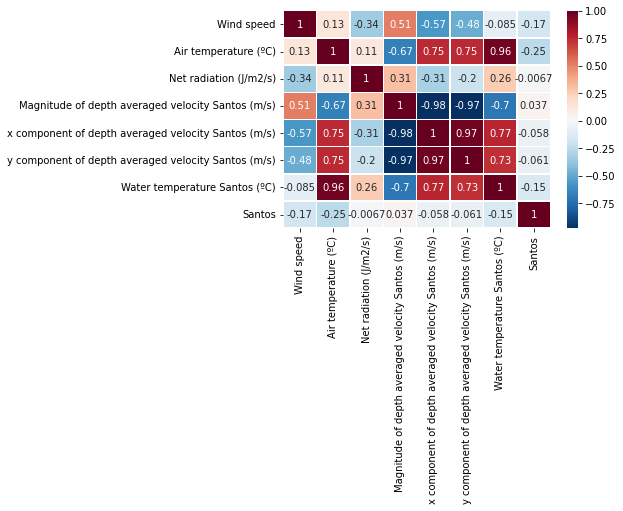

In [142]:
import seaborn as sb

sb.heatmap(pearsoncorr, 
            xticklabels=pearsoncorr.columns,
            yticklabels=pearsoncorr.columns,
            cmap='RdBu_r',
            annot=True,
            linewidth=0.5)

In [139]:
spearmancorr = CM_ct_santos.corr(method='spearman')
spearmancorr
# CM_ct_santos

,Wind speed,Air temperature (ºC),Net radiation (J/m2/s),Magnitude of depth averaged velocity Santos (m/s),x component of depth averaged velocity Santos (m/s),y component of depth averaged velocity Santos (m/s),Water temperature Santos (ºC),Santos
Wind speed,1.000000,-0.043956,0.456044,0.384615,-0.454545,-0.545455,-0.160839,0.043956
Air temperature (ºC),-0.043956,1.000000,0.208791,-0.762238,0.713287,0.643357,0.986014,-0.142857
Net radiation (J/m2/s),0.456044,0.208791,1.000000,0.139860,-0.209790,-0.349650,0.279720,0.126374
Magnitude of depth averaged velocity Santos (m/s),0.384615,-0.762238,0.139860,1.000000,-0.909091,-0.881119,-0.769231,0.041958
x component of depth averaged velocity Santos (m/s),-0.454545,0.713287,-0.209790,-0.909091,1.000000,0.930070,0.692308,-0.111888
y component of depth averaged velocity Santos (m/s),-0.545455,0.643357,-0.349650,-0.881119,0.930070,1.000000,0.622378,-0.013986
Water temperature Santos (ºC),-0.160839,0.986014,0.279720,-0.769231,0.692308,0.622378,1.000000,-0.055944
Santos,0.043956,-0.142857,0.126374,0.041958,-0.111888,-0.013986,-0.055944,1.000000


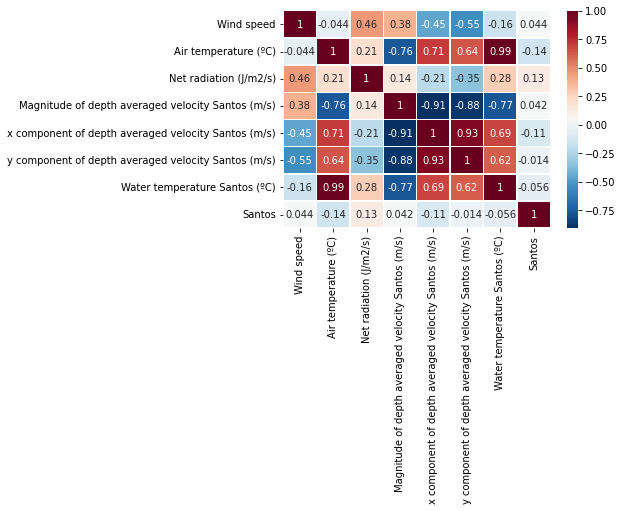

In [140]:
sb.heatmap(spearmancorr, 
            xticklabels=spearmancorr.columns,
            yticklabels=spearmancorr.columns,
            cmap='RdBu_r',
            annot=True,
            linewidth=0.5)

In [143]:
kendallcorr = CM_ct_santos.corr(method='kendall')
kendallcorr

,Wind speed,Air temperature (ºC),Net radiation (J/m2/s),Magnitude of depth averaged velocity Santos (m/s),x component of depth averaged velocity Santos (m/s),y component of depth averaged velocity Santos (m/s),Water temperature Santos (ºC),Santos
Wind speed,1.000000,0.051282,0.435897,0.303030,-0.363636,-0.545455,0.000000,0.051282
Air temperature (ºC),0.051282,1.000000,0.205128,-0.575758,0.515152,0.333333,0.939394,-0.128205
Net radiation (J/m2/s),0.435897,0.205128,1.000000,0.121212,-0.181818,-0.363636,0.242424,0.051282
Magnitude of depth averaged velocity Santos (m/s),0.303030,-0.575758,0.121212,1.000000,-0.818182,-0.757576,-0.575758,0.090909
x component of depth averaged velocity Santos (m/s),-0.363636,0.515152,-0.181818,-0.818182,1.000000,0.818182,0.515152,-0.090909
y component of depth averaged velocity Santos (m/s),-0.545455,0.333333,-0.363636,-0.757576,0.818182,1.000000,0.333333,-0.030303
Water temperature Santos (ºC),0.000000,0.939394,0.242424,-0.575758,0.515152,0.333333,1.000000,-0.030303
Santos,0.051282,-0.128205,0.051282,0.090909,-0.090909,-0.030303,-0.030303,1.000000


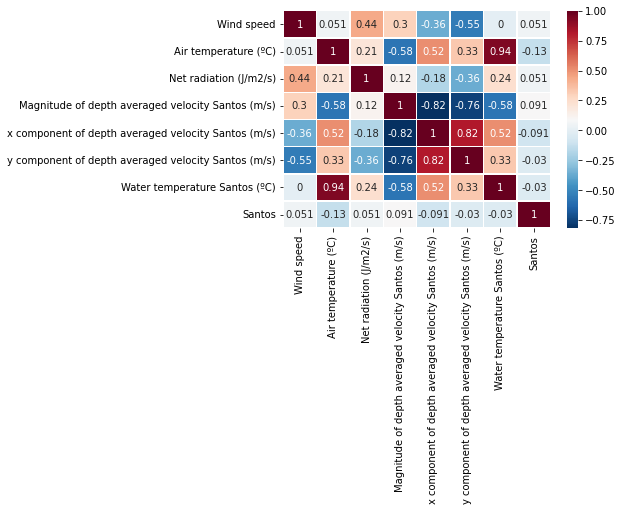

In [144]:
sb.heatmap(kendallcorr, 
            xticklabels=kendallcorr.columns,
            yticklabels=kendallcorr.columns,
            cmap='RdBu_r',
            annot=True,
            linewidth=0.5)

### Decision tree

The basic idea behind any decision tree algorithm is as follows:

Select the best attribute using Attribute Selection Measures(ASM) to split the records.

Make that attribute a decision node and breaks the dataset into smaller subsets.

Starts tree building by repeating this process recursively for each child until one of the condition will match:
- All the tuples belong to the same attribute value.
- There are no more remaining attributes.
- There are no more instances.


In [74]:
DT_ct = 

# E. Coli

### Linear Regression (Santos)

In [75]:
# Regression analysis - Unified for all years (E. coli)

datestring2 = pd.DatetimeIndex(datestring[2:]) # Converting to DatetimeIndex to manipulate accordingly
months = datestring2.month[0:12] # Simulate one year 
year = []

for i in range (len(datestring2)):
  year.append(i) # Represent the amount of months analyzed over N years

def regressao_unif_ec():
  a = np.zeros(1)
  b = np.zeros(1)

  a, b = np.polyfit(year, ct_ecoli_interpolate.xs('E_Coli',level = 'Parâmetro', axis = 1)['Santos'], 1)
  ec_santos_linear_unif = np.poly1d((a,b))

  return ec_santos_linear_unif

regressao_unif_ec()

poly1d([  31666.20945899, 9133439.70385675])

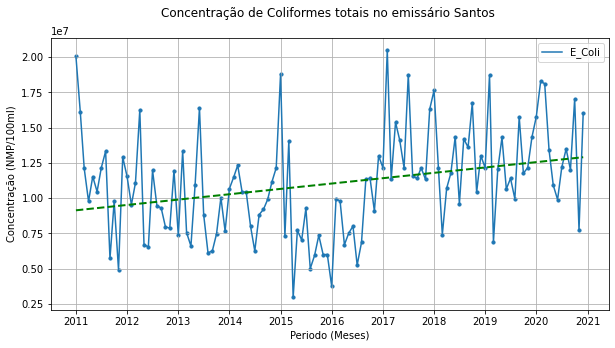

In [76]:
plt.figure(figsize = (10,5))
plt.plot(ct_ecoli_interpolate.index, ct_ecoli_interpolate.xs('E_Coli',level = 'Parâmetro', axis = 1)['Santos'], label = 'E_Coli')
plt.scatter(ct_ecoli_interpolate.index, ct_ecoli_interpolate.xs('E_Coli',level = 'Parâmetro', axis = 1)['Santos'], s = 10 )
plt.plot( ct_ecoli_interpolate.index, regressao_unif_ec()(year), 'green', linestyle = '--', linewidth = 2) #, label = 'Regressão linear - 2011 ~ 2020')
plt.xlabel('Periodo (Meses)')
plt.ylabel('Concentração (NMP/100ml)')
plt.title('Concentração de Coliformes totais no emissário Santos \n')
plt.legend(loc='best')
plt.grid()

In [77]:
def regressao_frac_ec ():

    a = np.zeros(10)
    b = np.zeros(10)
  
    
    a[0], b[0] = np.polyfit(months,ct_ecoli_interpolate.xs('E_Coli',level = 'Parâmetro', axis = 1).iloc[0:12]['Santos'], 1) # polyfit(x,y,grau da regressÃƒÂ£o - nesse caso linear (1))
    ec_santos_linear1 = np.poly1d((a[0], b[0]))

    a[1], b[1] = np.polyfit(months,ct_ecoli_interpolate.xs('E_Coli',level = 'Parâmetro', axis = 1).iloc[12:24]['Santos'], 1) # polyfit(x,y,grau da regressÃƒÂ£o - nesse caso linear (1))
    ec_santos_linear2 = np.poly1d((a[1], b[1]))

    a[2], b[2] = np.polyfit(months,ct_ecoli_interpolate.xs('E_Coli',level = 'Parâmetro', axis = 1).iloc[24:36]['Santos'], 1) # polyfit(x,y,grau da regressÃƒÂ£o - nesse caso linear (1))
    ec_santos_linear3 = np.poly1d((a[2], b[2]))
    
    a[3], b[3] = np.polyfit(months,ct_ecoli_interpolate.xs('E_Coli',level = 'Parâmetro', axis = 1).iloc[36:48]['Santos'], 1) # polyfit(x,y,grau da regressÃƒÂ£o - nesse caso linear (1))
    ec_santos_linear4 = np.poly1d((a[3], b[3]))

    a[4], b[4] = np.polyfit(months,ct_ecoli_interpolate.xs('E_Coli',level = 'Parâmetro', axis = 1).iloc[48:60]['Santos'], 1) # polyfit(x,y,grau da regressÃƒÂ£o - nesse caso linear (1))
    ec_santos_linear5 = np.poly1d((a[4], b[4]))

    a[5], b[5] = np.polyfit(months,ct_ecoli_interpolate.xs('E_Coli',level = 'Parâmetro', axis = 1).iloc[60:72]['Santos'], 1) # polyfit(x,y,grau da regressÃƒÂ£o - nesse caso linear (1))
    ec_santos_linear6 = np.poly1d((a[5], b[5]))

    a[6], b[6] = np.polyfit(months,ct_ecoli_interpolate.xs('E_Coli',level = 'Parâmetro', axis = 1).iloc[72:84]['Santos'], 1) # polyfit(x,y,grau da regressÃƒÂ£o - nesse caso linear (1))
    ec_santos_linear7 = np.poly1d((a[6], b[6]))

    a[7], b[7] = np.polyfit(months,ct_ecoli_interpolate.xs('E_Coli',level = 'Parâmetro', axis = 1).iloc[84:96]['Santos'], 1) # polyfit(x,y,grau da regressÃƒÂ£o - nesse caso linear (1))
    ec_santos_linear8 = np.poly1d((a[7], b[7]))

    a[8], b[8] = np.polyfit(months,ct_ecoli_interpolate.xs('E_Coli',level = 'Parâmetro', axis = 1).iloc[96:108]['Santos'], 1) # polyfit(x,y,grau da regressÃƒÂ£o - nesse caso linear (1))
    ec_santos_linear9 = np.poly1d((a[8], b[8]))

    a[9], b[9] = np.polyfit(months,ct_ecoli_interpolate.xs('E_Coli',level = 'Parâmetro', axis = 1).iloc[108:120]['Santos'], 1) # polyfit(x,y,grau da regressÃƒÂ£o - nesse caso linear (1))
    ec_santos_linear10 = (np.poly1d((a[9], b[9])))

    return ec_santos_linear1, ec_santos_linear2, ec_santos_linear3, ec_santos_linear4, ec_santos_linear5, ec_santos_linear6, ec_santos_linear7, ec_santos_linear8, ec_santos_linear9, ec_santos_linear10

regressao_frac_ec()

(poly1d([ -731125.        , 16321333.33333333]),
 poly1d([ -186136.36363636, 11221969.6969697 ]),
 poly1d([ -177010.48951049, 10198484.84848485]),
 poly1d([  -57873.25174825, 10447905.3030303 ]),
 poly1d([ -665559.44055944, 12441969.6969697 ]),
 poly1d([ 433828.67132867, 5729696.96969697]),
 poly1d([ -181216.78321678, 15104284.09090909]),
 poly1d([   55684.44055944, 12269571.96969697]),
 poly1d([   18563.81118881, 12387522.72727273]),
 poly1d([ -337403.84615385, 15936666.66666666]))

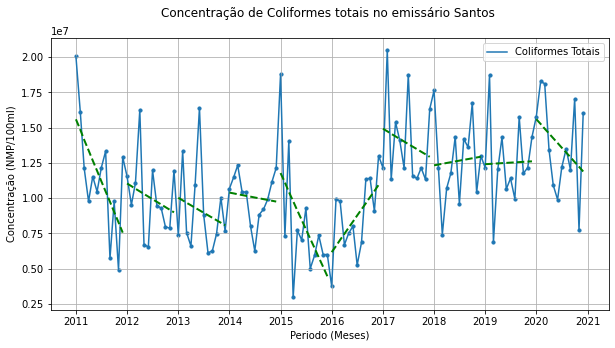

In [78]:
# Plot with linear regression for each year (E.coli)

plt.figure(figsize = (10,5))
plt.plot(ct_ecoli_interpolate.index, ct_ecoli_interpolate.xs('E_Coli',level = 'Parâmetro', axis = 1)['Santos'], label = 'Coliformes Totais')
plt.scatter(ct_ecoli_interpolate.index, ct_ecoli_interpolate.xs('E_Coli',level = 'Parâmetro', axis = 1)['Santos'], s = 10 )
plt.plot( ct_ecoli_interpolate.iloc[0:12].index, regressao_frac_ec()[0](months), 'green', linestyle = '--', linewidth = 2) #, label = 'Regressão linear - 2011')
plt.plot( ct_ecoli_interpolate.iloc[12:24].index, regressao_frac_ec()[1](months), 'green', linestyle = '--', linewidth = 2)#, label = 'Regressão linear - 2012')
plt.plot( ct_ecoli_interpolate.iloc[24:36].index, regressao_frac_ec()[2](months), 'green', linestyle = '--', linewidth = 2)#, label = 'Regressão linear - 2013')
plt.plot( ct_ecoli_interpolate.iloc[36:48].index, regressao_frac_ec()[3](months), 'green', linestyle = '--', linewidth = 2)#, label = 'Regressão linear - 2014')
plt.plot( ct_ecoli_interpolate.iloc[48:60].index, regressao_frac_ec()[4](months), 'green', linestyle = '--', linewidth = 2)#, label = 'Regressão linear - 2015')
plt.plot( ct_ecoli_interpolate.iloc[60:72].index, regressao_frac_ec()[5](months), 'green', linestyle = '--', linewidth = 2)#, label = 'Regressão linear - 2016')
plt.plot( ct_ecoli_interpolate.iloc[72:84].index, regressao_frac_ec()[6](months), 'green', linestyle = '--', linewidth = 2)#, label = 'Regressão linear - 2017')
plt.plot( ct_ecoli_interpolate.iloc[84:96].index, regressao_frac_ec()[7](months), 'green', linestyle = '--', linewidth = 2)#, label = 'Regressão linear - 2018')
plt.plot( ct_ecoli_interpolate.iloc[96:108].index, regressao_frac_ec()[8](months), 'green', linestyle = '--', linewidth = 2)#, label = 'Regressão linear - 2019')
plt.plot( ct_ecoli_interpolate.iloc[108:120].index, regressao_frac_ec()[9](months), 'green', linestyle = '--', linewidth = 2)#, label = 'Regressão linear - 2020')
plt.xlabel('Periodo (Meses)')
plt.ylabel('Concentração (NMP/100ml)')
plt.title('Concentração de Coliformes totais no emissário Santos \n')
plt.legend(loc='best')
plt.grid()

### PG1

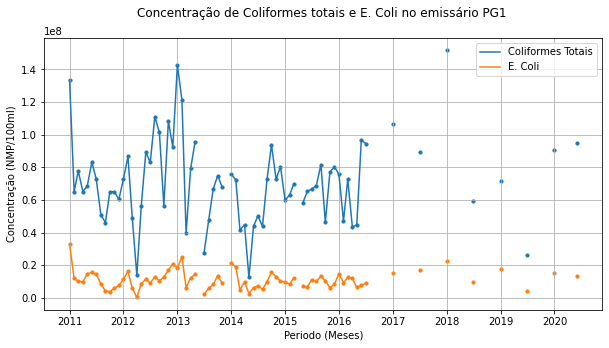

In [79]:
# Plot with no data interpolation

plt.figure(figsize = (10,5))
plt.plot(ct_ecoli.index, ct_ecoli.xs('Coliformes_Totais',level = 'Parâmetro', axis = 1)['PG1'], label = 'Coliformes Totais')
plt.plot(ct_ecoli.index, ct_ecoli.xs('E_Coli',level = 'Parâmetro', axis = 1)['PG1'], label = 'E. Coli')
plt.scatter(ct_ecoli.index, ct_ecoli.xs('Coliformes_Totais',level = 'Parâmetro', axis = 1)['PG1'],s = 10 )
plt.scatter(ct_ecoli.index, ct_ecoli.xs('E_Coli',level = 'Parâmetro', axis = 1)['PG1'],s = 10 )
plt.xlabel('Periodo (Meses)')
plt.ylabel('Concentração (NMP/100ml)')
plt.title('Concentração de Coliformes totais e E. Coli no emissário PG1 \n')
plt.legend(loc='best')
plt.grid()
 
 

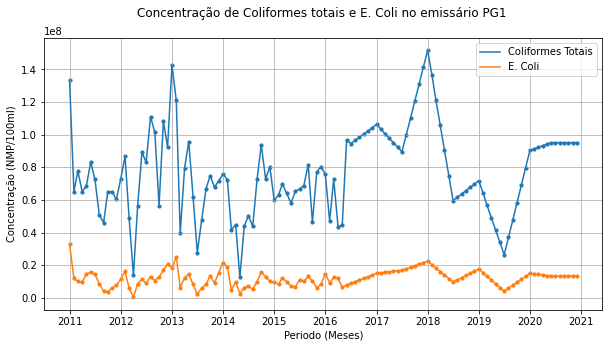

In [80]:
# Plot with data interpolation (linear)

plt.figure(figsize = (10,5))
plt.plot(ct_ecoli_interpolate.index, ct_ecoli_interpolate.xs('Coliformes_Totais',level = 'Parâmetro', axis = 1)['PG1'], label = 'Coliformes Totais')
plt.plot(ct_ecoli_interpolate.index, ct_ecoli_interpolate.xs('E_Coli',level = 'Parâmetro', axis = 1)['PG1'], label = 'E. Coli')
plt.scatter(ct_ecoli_interpolate.index, ct_ecoli_interpolate.xs('Coliformes_Totais',level = 'Parâmetro', axis = 1)['PG1'],s = 10 )
plt.scatter(ct_ecoli_interpolate.index, ct_ecoli_interpolate.xs('E_Coli',level = 'Parâmetro', axis = 1)['PG1'],s = 10 )
plt.xlabel('Periodo (Meses)')
plt.ylabel('Concentração (NMP/100ml)')
plt.title('Concentração de Coliformes totais e E. Coli no emissário PG1 \n')
plt.legend(loc='best')
plt.grid()

### PG2

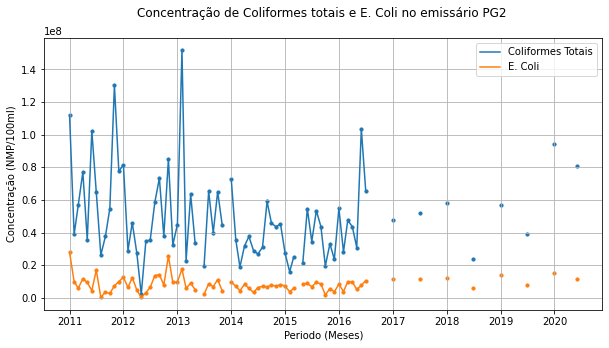

In [81]:
# Plot with no data interpolation

plt.figure(figsize = (10,5))
plt.plot(ct_ecoli.index, ct_ecoli.xs('Coliformes_Totais',level = 'Parâmetro', axis = 1)['PG2'], label = 'Coliformes Totais')
plt.plot(ct_ecoli.index, ct_ecoli.xs('E_Coli',level = 'Parâmetro', axis = 1)['PG2'], label = 'E. Coli')
plt.scatter(ct_ecoli.index, ct_ecoli.xs('Coliformes_Totais',level = 'Parâmetro', axis = 1)['PG2'],s = 10 )
plt.scatter(ct_ecoli.index, ct_ecoli.xs('E_Coli',level = 'Parâmetro', axis = 1)['PG2'],s = 10 )
plt.xlabel('Periodo (Meses)')
plt.ylabel('Concentração (NMP/100ml)')
plt.title('Concentração de Coliformes totais e E. Coli no emissário PG2 \n')
plt.legend(loc='best')
plt.grid()

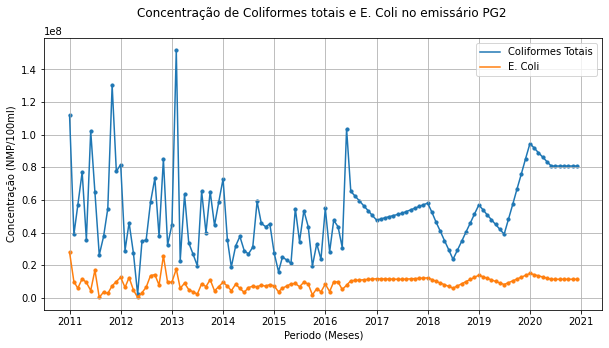

In [82]:
# Plot with data interpolation (linear)

plt.figure(figsize = (10,5))
plt.plot(ct_ecoli_interpolate.index, ct_ecoli_interpolate.xs('Coliformes_Totais',level = 'Parâmetro', axis = 1)['PG2'], label = 'Coliformes Totais')
plt.plot(ct_ecoli_interpolate.index, ct_ecoli_interpolate.xs('E_Coli',level = 'Parâmetro', axis = 1)['PG2'], label = 'E. Coli')
plt.scatter(ct_ecoli_interpolate.index, ct_ecoli_interpolate.xs('Coliformes_Totais',level = 'Parâmetro', axis = 1)['PG2'],s = 10 )
plt.scatter(ct_ecoli_interpolate.index, ct_ecoli_interpolate.xs('E_Coli',level = 'Parâmetro', axis = 1)['PG2'],s = 10 )
plt.xlabel('Periodo (Meses)')
plt.ylabel('Concentração (NMP/100ml)')
plt.title('Concentração de Coliformes totais e E. Coli no emissário PG2 \n')
plt.legend(loc='best')
plt.grid()

### PG3

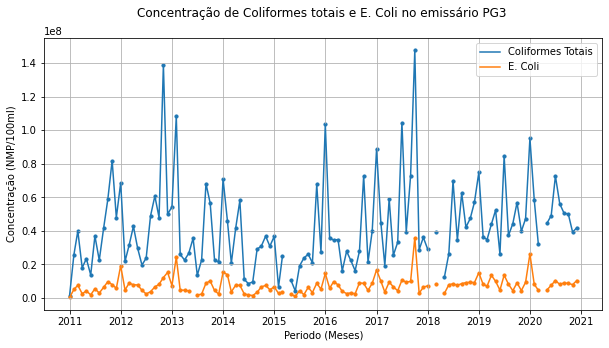

In [83]:
# Plot with no data interpolation

plt.figure(figsize = (10,5))
plt.plot(ct_ecoli.index, ct_ecoli.xs('Coliformes_Totais',level = 'Parâmetro', axis = 1)['PG3'], label = 'Coliformes Totais')
plt.plot(ct_ecoli.index, ct_ecoli.xs('E_Coli',level = 'Parâmetro', axis = 1)['PG3'], label = 'E. Coli')
plt.scatter(ct_ecoli.index, ct_ecoli.xs('Coliformes_Totais',level = 'Parâmetro', axis = 1)['PG3'],s = 10 )
plt.scatter(ct_ecoli.index, ct_ecoli.xs('E_Coli',level = 'Parâmetro', axis = 1)['PG3'],s = 10 )
plt.xlabel('Periodo (Meses)')
plt.ylabel('Concentração (NMP/100ml)')
plt.title('Concentração de Coliformes totais e E. Coli no emissário PG3 \n')
plt.legend(loc='best')
plt.grid()

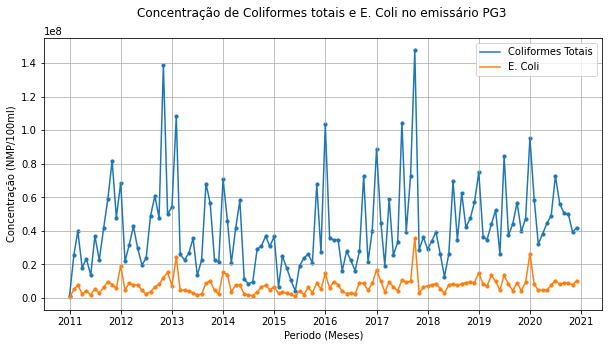

In [84]:
# Plot with data interpolation (linear)

plt.figure(figsize = (10,5))
plt.plot(ct_ecoli_interpolate.index, ct_ecoli_interpolate.xs('Coliformes_Totais',level = 'Parâmetro', axis = 1)['PG3'], label = 'Coliformes Totais')
plt.plot(ct_ecoli_interpolate.index, ct_ecoli_interpolate.xs('E_Coli',level = 'Parâmetro', axis = 1)['PG3'], label = 'E. Coli')
plt.scatter(ct_ecoli_interpolate.index, ct_ecoli_interpolate.xs('Coliformes_Totais',level = 'Parâmetro', axis = 1)['PG3'],s = 10 )
plt.scatter(ct_ecoli_interpolate.index, ct_ecoli_interpolate.xs('E_Coli',level = 'Parâmetro', axis = 1)['PG3'],s = 10 )
plt.xlabel('Periodo (Meses)')
plt.ylabel('Concentração (NMP/100ml)')
plt.title('Concentração de Coliformes totais e E. Coli no emissário PG3 \n')
plt.legend(loc='best')
plt.grid()

### Guarujá

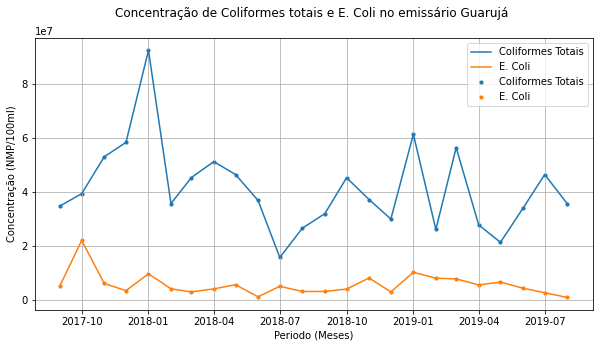

In [85]:
# Now you can use xs to slice the dateframe based on levels - df.xs('location1',level='loc',axis=1)
# pd.notnull(ct_ecoli).sum() # Check if the dataframe passed correctly

# Plot with no data interpolation

plt.figure(figsize = (10,5))
plt.plot(ct_ecoli.index, ct_ecoli.xs('Coliformes_Totais',level = 'Parâmetro', axis = 1)['Guarujá'], label = 'Coliformes Totais')
plt.plot(ct_ecoli.index, ct_ecoli.xs('E_Coli',level = 'Parâmetro', axis = 1)['Guarujá'], label = 'E. Coli')
plt.scatter(ct_ecoli.index, ct_ecoli.xs('Coliformes_Totais',level = 'Parâmetro', axis = 1)['Guarujá'], label = 'Coliformes Totais',s = 10 )
plt.scatter(ct_ecoli.index, ct_ecoli.xs('E_Coli',level = 'Parâmetro', axis = 1)['Guarujá'], label = 'E. Coli',s = 10 )
plt.xlabel('Periodo (Meses)')
plt.ylabel('Concentração (NMP/100ml)')
plt.title('Concentração de Coliformes totais e E. Coli no emissário Guarujá \n')
plt.legend(loc='best')
plt.grid()
 

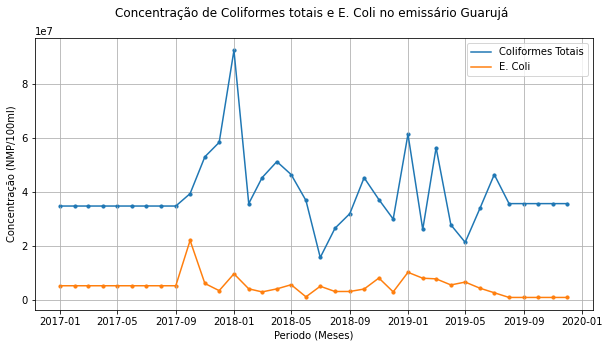

In [86]:
# Plot with data interpolation (linear)

plt.figure(figsize = (10,5))
plt.plot(ct_ecoli_interpolate.index, ct_ecoli_interpolate.xs('Coliformes_Totais',level = 'Parâmetro', axis = 1)['Guarujá'], label = 'Coliformes Totais')
plt.plot(ct_ecoli_interpolate.index, ct_ecoli_interpolate.xs('E_Coli',level = 'Parâmetro', axis = 1)['Guarujá'], label = 'E. Coli')
plt.scatter(ct_ecoli_interpolate.index, ct_ecoli_interpolate.xs('Coliformes_Totais',level = 'Parâmetro', axis = 1)['Guarujá'], s = 10 )
plt.scatter(ct_ecoli_interpolate.index, ct_ecoli_interpolate.xs('E_Coli',level = 'Parâmetro', axis = 1)['Guarujá'],s = 10 )
plt.xlabel('Periodo (Meses)')
plt.ylabel('Concentração (NMP/100ml)')
plt.title('Concentração de Coliformes totais e E. Coli no emissário Guarujá \n')
plt.legend(loc='best')
plt.grid()

### All five ocean outfalls' data